In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

#creating deepcopy of model instances
from copy import deepcopy

#Python standard libraries
import time
import warnings

## Описание данных

- **age** - Возраст заемщика
- **lastcredit** - Время в днях, которое прошло с момента открытия последнего кредитного продукта
- **time_to_lastcredit_closeddt** - Время в днях, которое прошло с момента закрытия последнего микрокредита (если есть активные кредиты, эта переменная будет равна 0)
- **close_loan_median** - Медиана, взятая по количеству дней между закрытием предыдущего и следующего микрокредита (считается по всем последовательно открытым микрозаймам), т.е. сколько в среднем проходит времени между закрытием предыдущего и следующего микрокредита
- **open_loan_median** - Медиана, взятая по количеству дней между открытием предыдущего и следующего микрокредита (считается по всем последовательно открытым микрозаймам), т.е. сколько в среднем проходит времени между открытием предыдущего и следующего микрокредита
- **is_active_100** - Количество активных кредитов, открытых за все время
- **isnt_active_100** - Доля не возвращенных кредитов относительно всех кредитов, взятых за все время
- **is_lost_100** - Невозвращенные кредиты, открытые за последний месяц (например, переданные по цессии)
- **micro_loans_active_100** - Активная сумма микрокредитов, открытых за всё время
- **is_active_12** - Количество всех активных кредитов, открытых за последние 12 месяцев
- **open_sum_12** - Активная сумма кредитов, взятых за последние 12 месяцев
- **isnt_active_12** - Количество закрытых кредитов, которые были открыты за последние 12 месяцев
- **is_lost_12** - Невозвращенные кредиты, открытые за последние 12 месяцев
- **overdue_loans_12** - Количество просроченных кредитов, открытых за последние 12 месяцев
- **micro_loans_active_12** - Активная сумма микрокредитов, открытых за последние 12 месяцев
- **is_active_3** - Количество всех активных кредитов, открытых за последние 3 месяца
- **open_sum_3** - Активная сумма кредитов, взятых за последние 3 месяца
- **isnt_active_3** - Количество закрытых кредитов, которые были открыты за последние 3 месяца
- **is_lost_3** - Невозвращенные кредиты, открытые за последние 3 месяца
- **overdue_loans_3** - Количество просроченных кредитов, открытых за последние 3 месяца
- **micro_loans_active_3** - Активная сумма микрокредитов, открытых за последние 3 месяца
- **is_active_1** - Количество всех активных кредитов, открытых за последний месяц
- open_sum_1 - Активная сумма кредитов, взятых за последний месяц
- **isnt_active_1** - Количество закрытых кредитов, которые были открыты за последний месяц
- **is_lost_1** - Невозвращенные кредиты, открытые за последний месяц (например, переданные по цессии)
- **micro_loans_active_1** - Активная сумма микрокредитов, открытых за последний месяц
- **ratio_all_microloans_3_to_12** - Отношение количества микрокредитов, взятых за последние 3 месяца, к количеству микрокредитов, взятых за последние 12 месяцев
- **ratio_overdue_loans_3_to_12** - Отношение количества просроченных микрокредитов, взятых за последние 3 месяца, к количеству просроченных микрокредитов, взятых за последние 12 месяцев
- **ratio_history_100** - Доля не возвращенных кредитов относительно всех кредитов, взятых за все время
- **ratio_history_12** - Доля не возвращенных кредитов относительно всех кредитов, взятых за последние 12 месяцев
- **fraction_last_x_12** - Доля кредитов, взятых за последние 12 месяцев, относительно всех кредитов истории
- **ratio_history_3** - Доля не возвращенных кредитов относительно всех кредитов, взятых за последние 3 месяца
- **fraction_last_x_3** - Доля кредитов, взятых за последние 3 месяца, относительно всех кредитов истории
- **ratio_history_1** - Доля не возвращенных кредитов относительно всех кредитов, взятых за последний месяц
- **fraction_last_x_1** - Доля кредитов, взятых за последний месяц, относительно всех кредитов истории
- **mean_delay_100_with_lag** - Средняя просрочка за всё время (с лагом по времени в 2 месяца)
- **mean_delay_12_with_lag** - Средняя просрочка за последние 12 месяцев (с лагом по времени в 2 месяца)
- **mean_delay_3_with_lag** - Средняя просрочка за последние 3 месяца (с лагом по времени в 2 месяца)
- **mean_delay_1_with_lag** - Средняя просрочка за последний месяц (с лагом по времени в 2 месяца)
- **ratio_mean_delay_3_to_12** - Отношение средней просрочки за последние 3 месяца к средней просрочке за последние 12 месяцев (в днях, с лагом по времени в 2 месяца)
- **count_all_credits** - Количество всех кредитов в истории
- **ratio_pattern_len_to_pattern_1** - Отношение количества платежей в платежном паттерне к общему количеству запланированных платежей на данный момент
- **ratio_pattern_len_to_pattern_2** - Отношение количества просрочек в 0-5 дней в платежном паттерне к общему количеству запланированных платежей на данный момент
- **ratio_pattern_len_to_pattern_3** -
- **ratio_pattern_len_to_pattern_4** -
- **ratio_pattern_len_to_pattern_bad_len** - Отношение количества символов сильной просрочки (> 60 дней) в платежном паттерне к общему количеству символов в строке
- **last_microloan_openeddt** - Время в днях, которое прошло с момента открытия последнего микрокредита
- **is_type_credit_card_100** - Количество кредитов типа "кредитная карта", открытых за всё время
- **is_type_consumer_100** - Количество кредитов типа "потребительский кредит", открытых за всё время
- **is_type_micro_100** - Количество кредитов типа "микрокредит", открытых за всё время
- **is_active_type_credit_card_100** - Количество активных кредитов, открытых за всё время с типом займа "кредитная карта"
- **is_active_type_consumer_100** - Количество активных кредитов, открытых за всё время с типом займа "потребительский кредит"
- **is_active_type_micro_100** - Количество активных кредитов, открытых за все время с типом займа "микрокредит"
- **is_type_credit_card_12** - Количество кредитов типа "кредитная карта", открытых за последние 12 месяцев
- **is_type_consumer_12** - Количество кредитов типа "потребительский кредит", открытых за последние 12 месяцев
- **is_type_micro_12** - Количество кредитов типа "микрокредит", открытых за последние 12 месяцев
- **is_active_type_credit_card_12** - Количество активных кредитов, открытых за последние 12 месяцев с типом займа "кредитная карта"
- **is_active_type_consumer_12** - Количество активных кредитов, открытых за последние 12 месяцев с типом займа "потребительский кредит"
- **is_active_type_micro_12** - Количество активных кредитов, открытых за последние 12 месяцев с типом займа "микрокредит"
- **is_type_credit_card_3** - Количество кредитов типа "кредитная карта", открытых за последние 3 месяца
- **is_type_consumer_3** - Количество кредитов типа "потребительский кредит", открытых за последние 3 месяца
- **is_type_micro_3** - Количество кредитов типа "микрокредит", открытых за последние 3 месяца
- **is_active_type_credit_card_3** - Количество активных кредитов, открытых за последние 3 месяца с типом займа "кредитная карта"
- **is_active_type_consumer_3** - Количество активных кредитов, открытых за последние 3 месяца с типом займа "потребительский кредит"
- **is_active_type_micro_3** - Количество активных кредитов, открытых за последние 3 месяца с типом займа "микрокредит"
- **is_type_credit_card_1** - Количество кредитов типа "кредитная карта", открытых за последние 12 месяцев
- **is_type_consumer_1** - Количество кредитов типа "потребительский кредит", открытых за последний месяц
- **is_type_micro_1** - Количество кредитов типа "микрокредит", открытых за последний месяц
- is_active_type_credit_card_1 - Количество активных кредитов, открытых за последние 12 месяцев с типом займа "кредитная карта"
- **is_active_type_consumer_1** - Количество активных кредитов, открытых за последний 1 месяц с типом займа "потребительский кредит"
- **is_active_type_micro_1** - Количество активных кредитов, открытых за последний 1 месяц с типом займа "микрокредит"
- overall_worst_overdue_state_12 -
- **ratio_sum_outstanding_to_open_sum** - Отношение суммы просрочки по всем кредитам к сумме взятых кредитов за всю историю

## Задачи

1. выполнить анализ и охарактеризовать клиентский портфель организации
2. построить базовую модель прогнозирования банкротства, одобряющую не менее 35% клиентов при банкротстве среди одобренных не выше 15%.
3. подготовить рекомендации и предложения по изменению признакового пространства, использованию внешних данных и иному развитию базовой модели.

## Интерпретация задач

2. Если переводить формулировку с языка бизнеса на язык ml, то нужно решить задачу бинарной классификации.
При этом нужно прогнозировать вероятность принадлежности каждого клиента к классу 1 (займ одобрен) и далее давать метку 1 35% клиентам и более.
Формулировку 'При банкротстве среди одобренных не выше 15%' можно понять так: Нужно минимизировать количество False Positive значений модели, поэтому в качестве метрики возьмем Precision (точность) которая минимизирует FP. При этом значение метрики должно быть не ниже 0.85. Попробую сначала точно определить клиентов, которым кредит одобрят, а затем добрать потенциальных банкротов по вероятностям принадлежности к классу 1, которые чуть меньше порога классификации.

## Обзор данных

In [2]:
data_positive = pd.read_csv('new_training_data_31_08_2022.csv')
data_negative = pd.read_csv('all_reject_data.csv')


In [4]:
data_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42529 entries, 0 to 42528
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            42529 non-null  int64  
 1   age                                   42529 non-null  float64
 2   lastcredit                            42529 non-null  float64
 3   time_to_lastcredit_closeddt           42529 non-null  float64
 4   close_loan_median                     42520 non-null  float64
 5   open_loan_median                      42520 non-null  float64
 6   is_active_100                         42529 non-null  float64
 7   isnt_active_100                       42529 non-null  float64
 8   is_lost_100                           42529 non-null  float64
 9   micro_loans_active_100                42529 non-null  float64
 10  is_active_12                          42529 non-null  float64
 11  open_sum_12    

In [5]:
#в таблице с клиентами, которым не выдали кредит на один признак больше, выясним, что это за признак
pos_colums = list(data_positive.columns)
neg_colums = list(data_negative.columns)
[col for col in pos_colums if col not in neg_colums]

['target']

In [6]:
data_positive.target.value_counts()

0.0    30729
1.0    11800
Name: target, dtype: int64

In [7]:
data_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106511 entries, 0 to 106510
Data columns (total 74 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            106511 non-null  int64  
 1   age                                   106511 non-null  float64
 2   lastcredit                            106511 non-null  float64
 3   time_to_lastcredit_closeddt           106511 non-null  float64
 4   close_loan_median                     106373 non-null  float64
 5   open_loan_median                      106373 non-null  float64
 6   is_active_100                         106511 non-null  float64
 7   isnt_active_100                       106511 non-null  float64
 8   is_lost_100                           106511 non-null  float64
 9   micro_loans_active_100                106511 non-null  float64
 10  is_active_12                          106511 non-null  float64
 11  

In [8]:
""""
# Попробую объединить данные, увеличив выбору клиентов, не получивших займа
# добавим в данные об отказах в займах столбец target, заполненный нулями
data_negative['target'] = 0
data_negative['target'] = data_negative['target'].astype('float64')
# удалим столбец Unnamed в обоих таблицах ??
data_negative = data_negative.drop(['Unnamed: 0'], axis=1)
data_positive = data_positive.drop(['Unnamed: 0'], axis=1)
data = pd.concat([data_positive,data_negative],axis=0, ignore_index=True)
"""

'"\n# Попробую объединить данные, увеличив выбору клиентов, не получивших займа\n# добавим в данные об отказах в займах столбец target, заполненный нулями\ndata_negative[\'target\'] = 0\ndata_negative[\'target\'] = data_negative[\'target\'].astype(\'float64\')\n# удалим столбец Unnamed в обоих таблицах ??\ndata_negative = data_negative.drop([\'Unnamed: 0\'], axis=1)\ndata_positive = data_positive.drop([\'Unnamed: 0\'], axis=1)\ndata = pd.concat([data_positive,data_negative],axis=0, ignore_index=True)\n'

In [9]:
data_positive = data_positive.drop(['Unnamed: 0'], axis=1)
data = data_positive



In [10]:
def find_duplicates_by_columns(df):  # функция для поиска дубликатов по столбцам
    duplicates = []
    column = []
    for i in df.columns:
        duplicates.append(df[i].duplicated().sum())
        column.append(i)
    duplicates = pd.Series(duplicates)
    column = pd.Series(column)
    return pd.concat([column, duplicates], axis = 1,
                     keys = ['column', 'duplicates']).sort_values(by = 'duplicates',ascending = False).head(75)

In [11]:
def missing_data(data):  # функция для поиска пропусков
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent']).head(75)

In [12]:
# для большого датасета
duplicated_info = find_duplicates_by_columns(data)
duplicated_info

column  duplicates
13              overdue_loans_12       42528
19               overdue_loans_3       42528
73                        target       42527
27   ratio_overdue_loans_3_to_12       42527
68  is_active_type_credit_card_1       42522
..                           ...         ...
20          micro_loans_active_3        9909
16                    open_sum_3        9247
14         micro_loans_active_12        8435
8         micro_loans_active_100        7909
10                   open_sum_12        6175

[74 rows x 2 columns]

In [13]:
# для мальенького датасета
duplicated_info = find_duplicates_by_columns(data)
duplicated_info

column  duplicates
13              overdue_loans_12       42528
19               overdue_loans_3       42528
73                        target       42527
27   ratio_overdue_loans_3_to_12       42527
68  is_active_type_credit_card_1       42522
..                           ...         ...
20          micro_loans_active_3        9909
16                    open_sum_3        9247
14         micro_loans_active_12        8435
8         micro_loans_active_100        7909
10                   open_sum_12        6175

[74 rows x 2 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42529 entries, 0 to 42528
Data columns (total 74 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   42529 non-null  float64
 1   lastcredit                            42529 non-null  float64
 2   time_to_lastcredit_closeddt           42529 non-null  float64
 3   close_loan_median                     42520 non-null  float64
 4   open_loan_median                      42520 non-null  float64
 5   is_active_100                         42529 non-null  float64
 6   isnt_active_100                       42529 non-null  float64
 7   is_lost_100                           42529 non-null  float64
 8   micro_loans_active_100                42529 non-null  float64
 9   is_active_12                          42529 non-null  float64
 10  open_sum_12                           42529 non-null  float64
 11  isnt_active_12 

In [15]:
# рассмотрим распределение признаков
for i in duplicated_info['column'][0:10]:
    print(i)
    print(data[i].unique())
    print()

overdue_loans_12
[0.]

overdue_loans_3
[0.]

target
[0. 1.]

ratio_overdue_loans_3_to_12
[nan  0.]

is_active_type_credit_card_1
[0. 1. 3. 2. 4. 6. 8.]

overall_worst_overdue_state_12
[120.   7.  59.  29.   0.  89. 119.]

is_type_credit_card_1
[ 0.  1.  3.  2.  4.  6. 12.  9.  8.]

is_active_type_credit_card_3
[1. 0. 5. 2. 3. 4. 6. 9. 8.]

is_active_type_consumer_1
[ 0.  1.  2.  5.  3.  4.  6.  8. 12.]

is_type_credit_card_3
[ 1.  0.  5.  2.  3.  4.  6. 15.  9.  8.]



C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3302747307.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i in duplicated_info['column'][0:10]:


In [16]:
missing_data_info = missing_data(data)
missing_data_info[missing_data_info['Percent'] > 0]

Total    Percent
ratio_overdue_loans_3_to_12            6844  16.092549
ratio_sum_outstanding_to_open_sum      2800   6.583743
ratio_mean_delay_3_to_12               2561   6.021773
ratio_history_1                         393   0.924075
ratio_history_3                         218   0.512591
ratio_all_microloans_3_to_12             32   0.075243
ratio_history_12                         23   0.054081
ratio_pattern_len_to_pattern_1            9   0.021162
ratio_pattern_len_to_pattern_2            9   0.021162
ratio_pattern_len_to_pattern_bad_len      9   0.021162
ratio_pattern_len_to_pattern_4            9   0.021162
ratio_pattern_len_to_pattern_3            9   0.021162
open_loan_median                          9   0.021162
close_loan_median                         9   0.021162

In [17]:
# для маленького
missing_data_info = missing_data(data)
missing_data_info[missing_data_info['Percent'] > 0]

Total    Percent
ratio_overdue_loans_3_to_12            6844  16.092549
ratio_sum_outstanding_to_open_sum      2800   6.583743
ratio_mean_delay_3_to_12               2561   6.021773
ratio_history_1                         393   0.924075
ratio_history_3                         218   0.512591
ratio_all_microloans_3_to_12             32   0.075243
ratio_history_12                         23   0.054081
ratio_pattern_len_to_pattern_1            9   0.021162
ratio_pattern_len_to_pattern_2            9   0.021162
ratio_pattern_len_to_pattern_bad_len      9   0.021162
ratio_pattern_len_to_pattern_4            9   0.021162
ratio_pattern_len_to_pattern_3            9   0.021162
open_loan_median                          9   0.021162
close_loan_median                         9   0.021162

In [18]:
# поиск полных дубликатов
data.duplicated().sum()

197

In [20]:
data.close_loan_median.value_counts()

0.0      42159
1.0         73
0.5         31
3.0         28
2.0         27
         ...  
268.5        1
174.5        1
31.5         1
50.0         1
42.0         1
Name: close_loan_median, Length: 104, dtype: int64

### Выводы


Были получены размеченные данные о выдаче/не выдаче займов клиентам и дополнительные данные о клиентах, которые либо отказались от кредита либо им его не одобрили финансовые организации. Признаковое пространство обоих файлов одинаковое, поэтому было принято решение объединить размеченные данные для обучения с данными о невыданных займах. В дальнейшем выяснилось, что объединение данных ухудшило результаты всех моделей. В итоге для обучения, валидации и тестирования был использован только первый датасет

Общие выводы:
1. Во многих столбцах дублируются значения, но это допустимо из-за специфики данных
2. В 18 признаках были найдены пропуски. Больше всего их в столбцах 'ratio_overdue_loans_3_to_12', 'ratio_mean_delay_3_to_12', 'ratio_history_1', 'ratio_sum_outstanding_to_open_sum,
'ratio_history_3'.
3. Найдено 407 (197 для необогащенного) дубликатов по строкам, которые я удалять не буду т.к. такие совпадения в кредитном поведении хоть и немногочисленны, но вполне вероятны.
4. overdue_loans_12 и overdue_loans_3 могут быть удалены, так как заполнены одним значением
5. ratio_overdue_loans_3_to_12 содерыт лишь пропуски и значение 0, поэтому его тоже лучше удалить
6. природа пропусков датасета для обучения, взятого отдельно от датасета невыданных займов и соединенных вместе данных похожа
7. Я буду заменять пропуски средним значением, т.к. постраюсь избавиться от всех выбросов, заменив их медианным значением
8. Так как признаков много, я не буду удалять строки, где есть хотя бы один выброс. Вместо этого буду заменять выбросы медианным значением


## Предобработка данных

### Оптимизация данных

In [21]:
#Функция для уменьшения объема хранения в памяти:
def reduce_mem_usage(df, verbose=True, not_used_cols = []):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        if col not in not_used_cols:
            col_type = df[col].dtypes
            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Память хранения уменьшена с {:5.2f} Mb до {:5.2f} Mb, итого ({:.1f}% уменьшения)'.format(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Удаление бесполезных признаков

In [22]:
data.shape

(42529, 74)

In [23]:
data = data.drop(['overdue_loans_12', 'overdue_loans_3', 'ratio_overdue_loans_3_to_12'], axis =1)

In [24]:
data.shape

(42529, 71)

### Заполнение Nan-ов
Заполню пропуски средними значениями

In [25]:
missing_data_info = missing_data(data)
missing_data_info

Total   Percent
ratio_sum_outstanding_to_open_sum   2800  6.583743
ratio_mean_delay_3_to_12            2561  6.021773
ratio_history_1                      393  0.924075
ratio_history_3                      218  0.512591
ratio_all_microloans_3_to_12          32  0.075243
...                                  ...       ...
fraction_last_x_1                      0  0.000000
mean_delay_100_with_lag                0  0.000000
mean_delay_12_with_lag                 0  0.000000
mean_delay_3_with_lag                  0  0.000000
target                                 0  0.000000

[71 rows x 2 columns]

In [26]:
missing_data_info = missing_data_info.drop(['ratio_sum_outstanding_to_open_sum'], axis = 0)

In [27]:
#посмотрим распределение ratio_sum_outstanding_to_open_sum. Вместо того, чтобы заполнять столбец средним, заполним его самым часто встречающимся значением

In [28]:
data.ratio_sum_outstanding_to_open_sum.value_counts()

 0.000000    20605
 inf            39
 0.574407       36
-inf            15
 1.000000       14
             ...  
 0.037605        1
 0.022067        1
 0.062412        1
 0.008382        1
 0.279814        1
Name: ratio_sum_outstanding_to_open_sum, Length: 18595, dtype: int64

In [29]:
data.ratio_sum_outstanding_to_open_sum = data.ratio_sum_outstanding_to_open_sum.fillna(0)

In [30]:
for col in missing_data_info.index.values:
    data[col] = data[col].fillna(data[col].mean())


In [31]:
missing_data(data)

Total  Percent
age                           0      0.0
is_type_consumer_100          0      0.0
is_type_consumer_12           0      0.0
is_type_credit_card_12        0      0.0
is_active_type_micro_100      0      0.0
...                         ...      ...
micro_loans_active_1          0      0.0
is_lost_1                     0      0.0
isnt_active_1                 0      0.0
open_sum_1                    0      0.0
target                        0      0.0

[71 rows x 2 columns]

### Замена бесконечных значений

In [32]:
count = np.isinf(data).values.sum()
print("Содержит " + str(count) + " значений бесконечности")
# printing column name where infinity is present
print()
print("Столбцы, где есть инфинитивы: ")
col_name = data.columns.to_series()[np.isinf(data).any()]
print(col_name.values)

Содержит 54 значений бесконечности

Столбцы, где есть инфинитивы: 
['ratio_sum_outstanding_to_open_sum']


Столбец говорит об отношении суммы просрочки по всем кредитам к сумме взятых кредитов за всю историю. Рассмотрю распределение, чтобы понять, на что заменяить инфинитивы

In [33]:
data.ratio_sum_outstanding_to_open_sum.value_counts()

 0.000000    23405
 inf            39
 0.574407       36
-inf            15
 1.000000       14
             ...  
 0.074614        1
 0.037605        1
 0.022067        1
 0.062412        1
 0.279814        1
Name: ratio_sum_outstanding_to_open_sum, Length: 18595, dtype: int64

In [34]:
#попробую заменить на нули
data.ratio_sum_outstanding_to_open_sum = data.ratio_sum_outstanding_to_open_sum.replace([np.inf,-np.inf], 0)

### Разделение на train test и val
(сдлеать тестовую выборку сбалансированной)

In [35]:
data.target.value_counts()

0.0    30729
1.0    11800
Name: target, dtype: int64

In [36]:
data.shape

(42529, 71)

In [37]:

train, others = train_test_split(data, test_size = 0.3, random_state = 1234, stratify = data['target'])
valid, test = train_test_split(others, test_size = 0.5, random_state = 1234, stratify = others['target'])

In [38]:
#соотношение целевых меток на объединенных данных
valid.target.value_counts()[1] / valid.target.value_counts()[0]

0.3840312432197874

In [39]:
#соотношение целевых меток на необъединенных данных
valid.target.value_counts()[1] / valid.target.value_counts()[0]

0.3840312432197874

In [40]:
#соотношение целевых меток на объединенных данных
test.target.value_counts()[1] / test.target.value_counts()[0]

0.3839479392624729

In [41]:
#соотношение целевых меток на необъединенных данных
test.target.value_counts()[1] / test.target.value_counts()[0]

0.3839479392624729

In [42]:

#basic_data_frame - датафрейм, на который нужно опираться для расчета границ, отделяющих допустимые значения от выбросов
#basic_column - cтолбцы, в которых будут заменятся выбросы

# вариант функции, где выбросы будут не удаляться, а заменяться медианами
def outliners_control(data_frame, basic_data_frame, basic_columns):
    for column in basic_columns:
        info = basic_data_frame[column].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)
        q1 = info[4]
        q3 = info[6]
        iqr = q3 - q1   # считаем межквартильный размах
        border = iqr*1.5   # считаем расстояние от Q1 и Q3 до границы, за которой расположены выбросы
        median = data_frame[column].median()
        plt.title('Диаграмма размаха для столбца {}'.format(column))
        plt.ylim(-0.8*border, q3 + border + 0.8*border)
        basic_data_frame.boxplot(column = column)  # строим диаграмму размаха
        plt.show()
        print('')
        print('Количество выбросов: {}'.format(len(data_frame.loc[(data_frame[column] <= (q1 - border))
                                           | (data_frame[column] >= (q3 + border)), column])))
        print('Заменим строки, где есть выбросы на медиану {} в столбце  {} , значения \n которых больше Q3 + 1.5*IQR ({:.3f}) и меньше Q1 - 1.5*IQR ({:.3f}).'.format(median, column, q3 + border,q1 - border))


        data_frame.loc[(data_frame[column] <= (q1 - border))
                                        | (data_frame[column] >= (q3 + border)), column]= median

    return data_frame


In [44]:
train.shape

(29770, 71)

In [45]:

col_list = list(train.columns)
col_list.pop(-1)
#col_list = [col for col in col_list if col  not in strange_features]

'target'

In [46]:
strange_features

['time_to_lastcredit_closeddt',
 'close_loan_median',
 'is_lost_100',
 'is_lost_12',
 'is_lost_3',
 'is_lost_1',
 'ratio_history_100',
 'ratio_history_12',
 'ratio_history_3',
 'ratio_history_1',
 'mean_delay_12_with_lag',
 'mean_delay_3_with_lag',
 'mean_delay_1_with_lag',
 'ratio_pattern_len_to_pattern_1',
 'ratio_pattern_len_to_pattern_2',
 'ratio_pattern_len_to_pattern_3',
 'ratio_pattern_len_to_pattern_4',
 'ratio_pattern_len_to_pattern_bad_len',
 'is_type_consumer_100',
 'is_active_type_consumer_100',
 'is_type_consumer_12',
 'is_active_type_consumer_12',
 'is_type_credit_card_3',
 'is_type_consumer_3',
 'is_active_type_credit_card_3',
 'is_active_type_consumer_3',
 'is_type_credit_card_1',
 'is_type_consumer_1',
 'is_active_type_credit_card_1',
 'is_active_type_consumer_1',
 'ratio_sum_outstanding_to_open_sum']

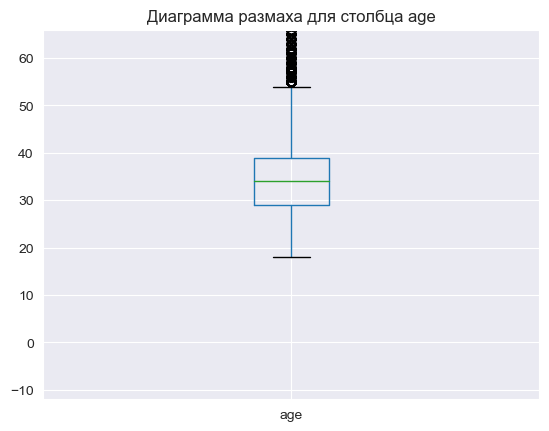


Количество выбросов: 1177
Заменим строки, где есть выбросы на медиану 34.0 в столбце  age , значения 
 которых больше Q3 + 1.5*IQR (54.000) и меньше Q1 - 1.5*IQR (14.000).


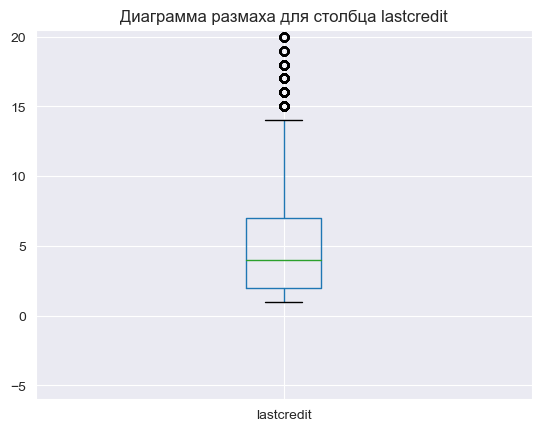


Количество выбросов: 2234
Заменим строки, где есть выбросы на медиану 4.0 в столбце  lastcredit , значения 
 которых больше Q3 + 1.5*IQR (14.500) и меньше Q1 - 1.5*IQR (-5.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


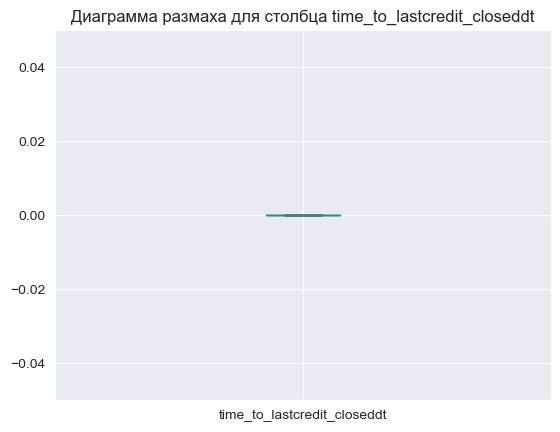


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  time_to_lastcredit_closeddt , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


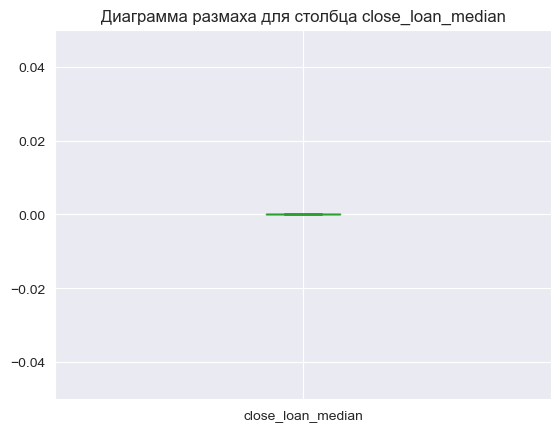


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  close_loan_median , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


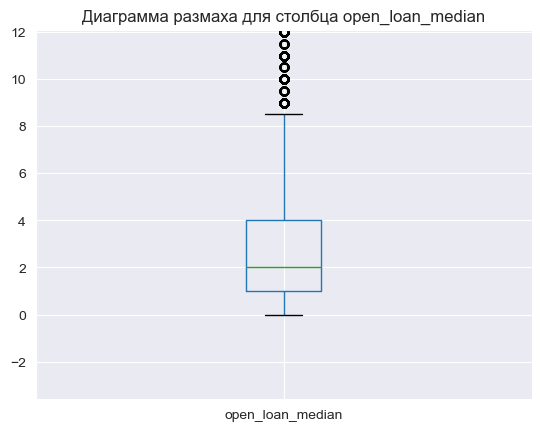


Количество выбросов: 3736
Заменим строки, где есть выбросы на медиану 2.0 в столбце  open_loan_median , значения 
 которых больше Q3 + 1.5*IQR (8.500) и меньше Q1 - 1.5*IQR (-3.500).


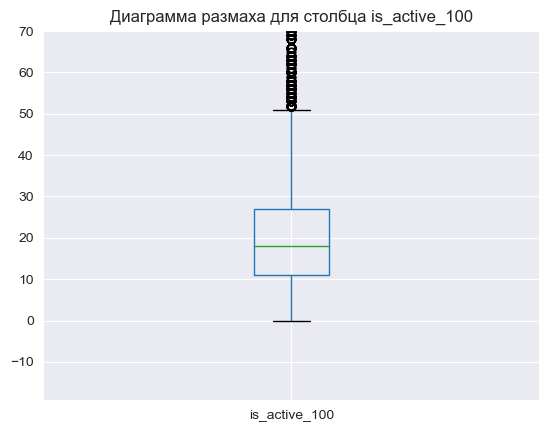


Количество выбросов: 1057
Заменим строки, где есть выбросы на медиану 18.0 в столбце  is_active_100 , значения 
 которых больше Q3 + 1.5*IQR (51.000) и меньше Q1 - 1.5*IQR (-13.000).


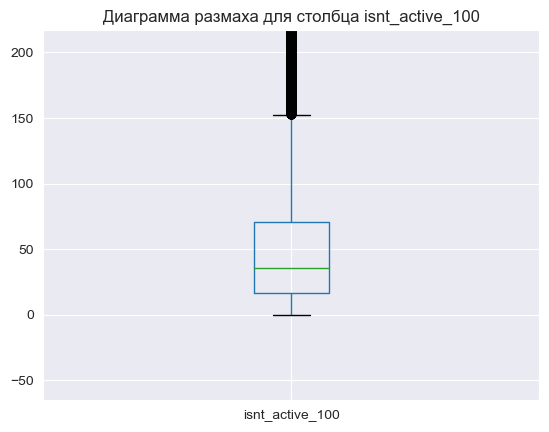


Количество выбросов: 2020
Заменим строки, где есть выбросы на медиану 36.0 в столбце  isnt_active_100 , значения 
 которых больше Q3 + 1.5*IQR (152.000) и меньше Q1 - 1.5*IQR (-64.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


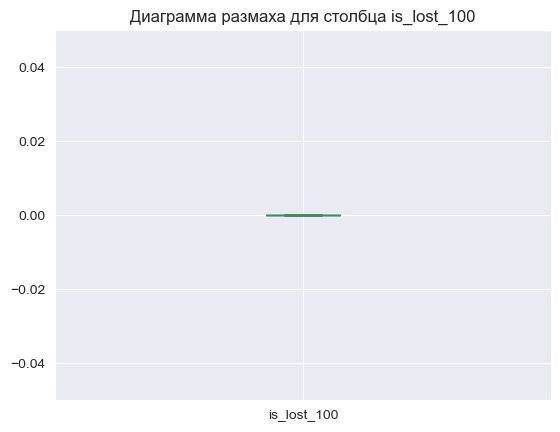


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_100 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


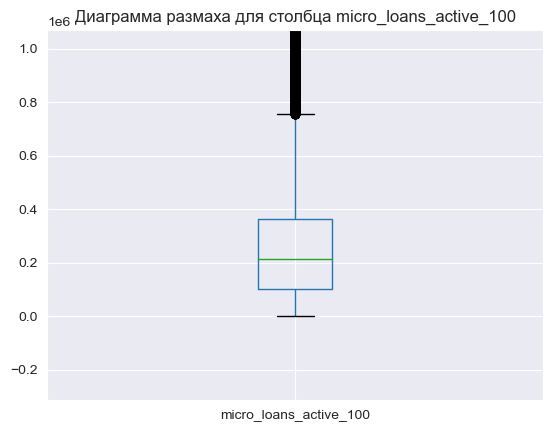


Количество выбросов: 1303
Заменим строки, где есть выбросы на медиану 213140.0 в столбце  micro_loans_active_100 , значения 
 которых больше Q3 + 1.5*IQR (755067.500) и меньше Q1 - 1.5*IQR (-290560.500).


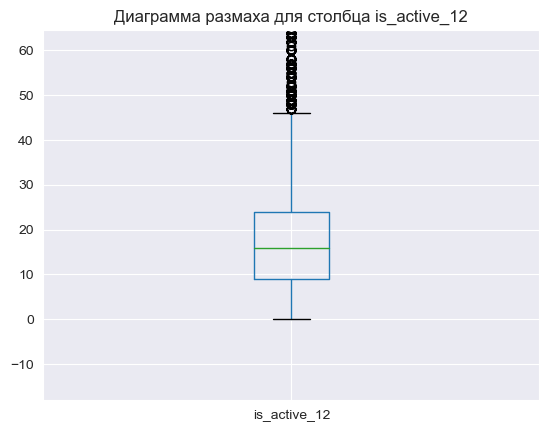


Количество выбросов: 974
Заменим строки, где есть выбросы на медиану 16.0 в столбце  is_active_12 , значения 
 которых больше Q3 + 1.5*IQR (46.500) и меньше Q1 - 1.5*IQR (-13.500).


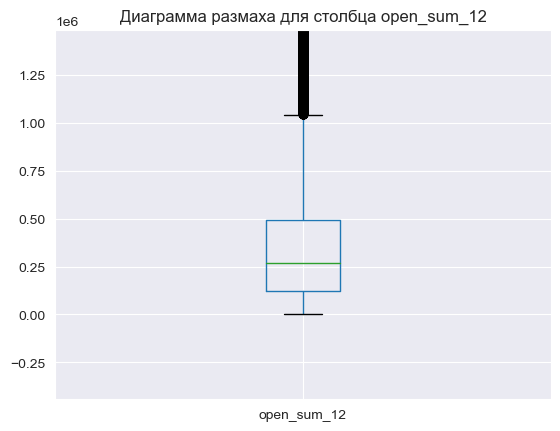


Количество выбросов: 2202
Заменим строки, где есть выбросы на медиану 267732.0 в столбце  open_sum_12 , значения 
 которых больше Q3 + 1.5*IQR (1043645.250) и меньше Q1 - 1.5*IQR (-431660.750).


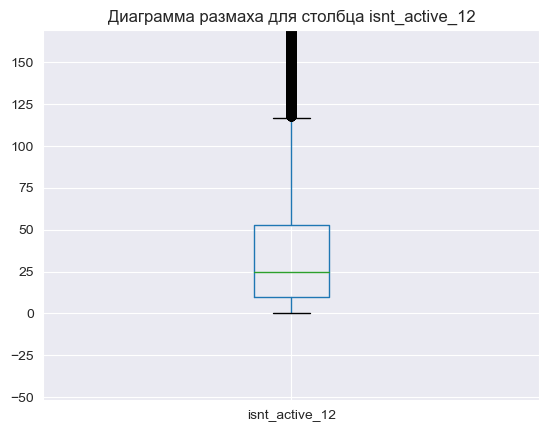


Количество выбросов: 1872
Заменим строки, где есть выбросы на медиану 25.0 в столбце  isnt_active_12 , значения 
 которых больше Q3 + 1.5*IQR (117.500) и меньше Q1 - 1.5*IQR (-54.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


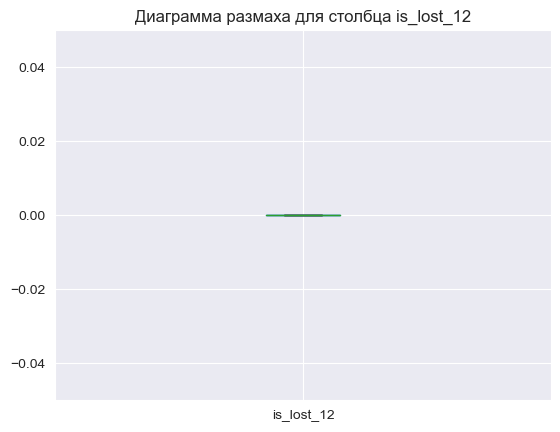


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_12 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


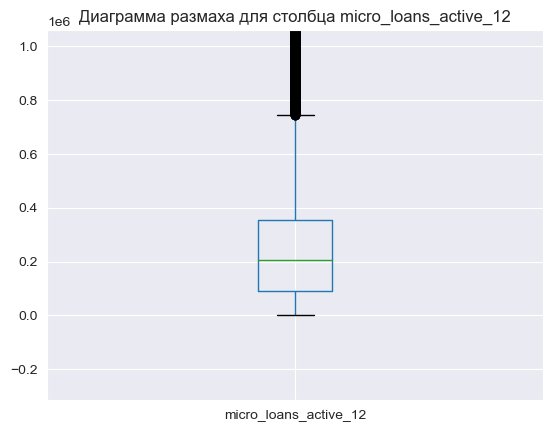


Количество выбросов: 1247
Заменим строки, где есть выбросы на медиану 204391.5 в столбце  micro_loans_active_12 , значения 
 которых больше Q3 + 1.5*IQR (745861.875) и меньше Q1 - 1.5*IQR (-299355.125).


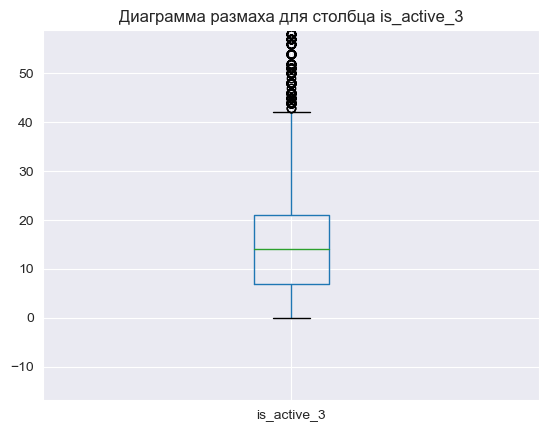


Количество выбросов: 926
Заменим строки, где есть выбросы на медиану 14.0 в столбце  is_active_3 , значения 
 которых больше Q3 + 1.5*IQR (42.000) и меньше Q1 - 1.5*IQR (-14.000).


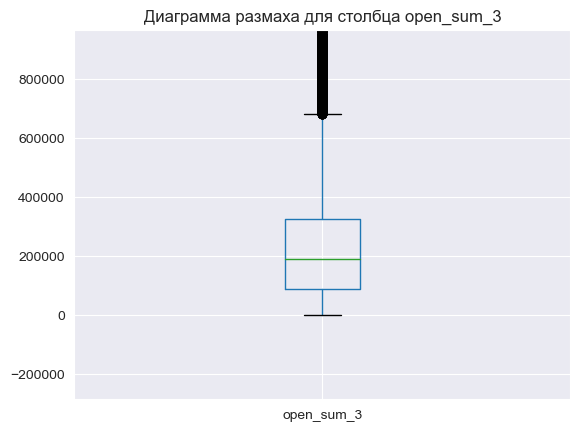


Количество выбросов: 1325
Заменим строки, где есть выбросы на медиану 191579.0 в столбце  open_sum_3 , значения 
 которых больше Q3 + 1.5*IQR (682226.125) и меньше Q1 - 1.5*IQR (-270456.875).


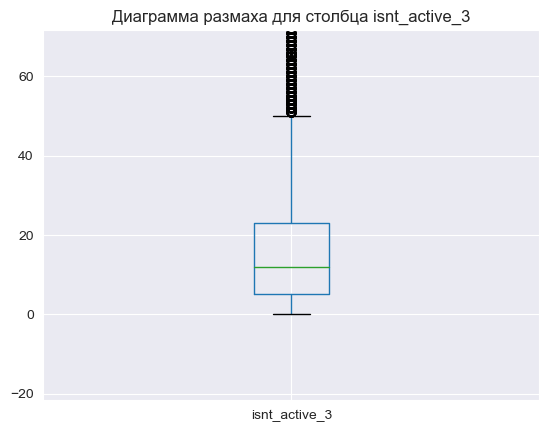


Количество выбросов: 1971
Заменим строки, где есть выбросы на медиану 12.0 в столбце  isnt_active_3 , значения 
 которых больше Q3 + 1.5*IQR (50.000) и меньше Q1 - 1.5*IQR (-22.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


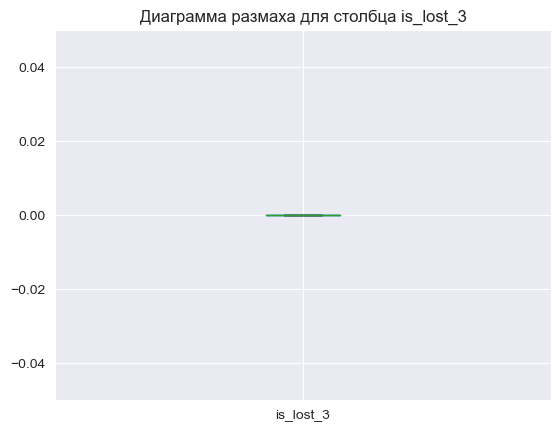


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


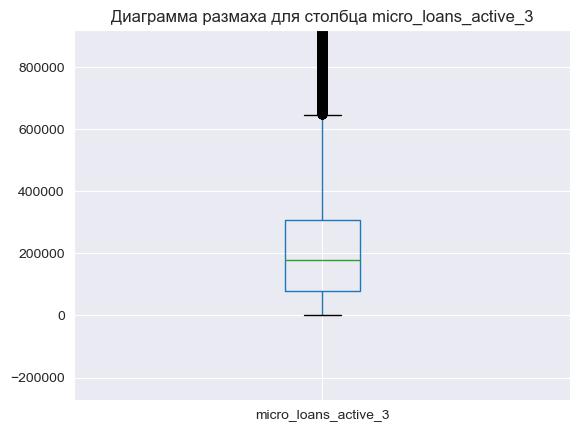


Количество выбросов: 1098
Заменим строки, где есть выбросы на медиану 180179.0 в столбце  micro_loans_active_3 , значения 
 которых больше Q3 + 1.5*IQR (647297.875) и меньше Q1 - 1.5*IQR (-260113.125).


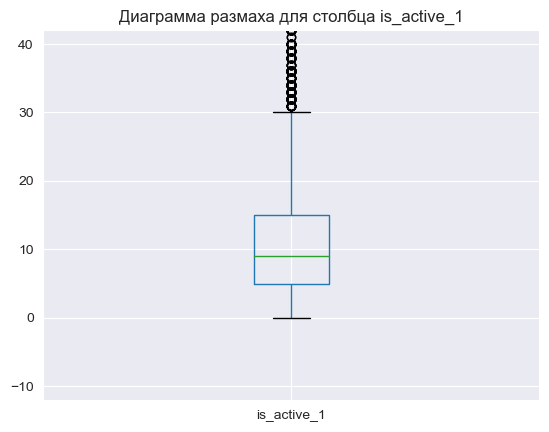


Количество выбросов: 1012
Заменим строки, где есть выбросы на медиану 9.0 в столбце  is_active_1 , значения 
 которых больше Q3 + 1.5*IQR (30.000) и меньше Q1 - 1.5*IQR (-10.000).


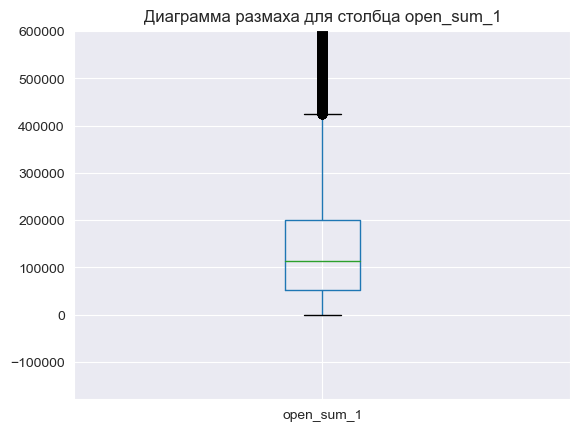


Количество выбросов: 1344
Заменим строки, где есть выбросы на медиану 114451.5 в столбце  open_sum_1 , значения 
 которых больше Q3 + 1.5*IQR (424363.750) и меньше Q1 - 1.5*IQR (-172218.250).


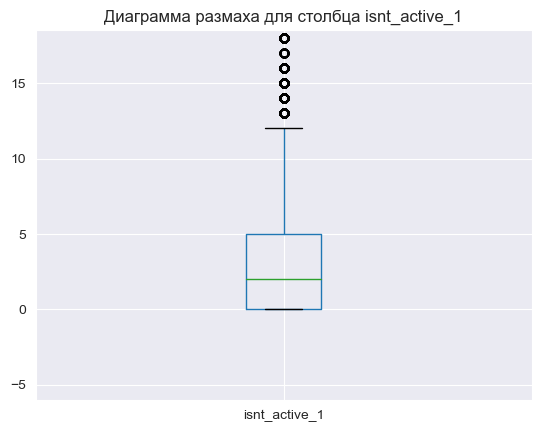


Количество выбросов: 1587
Заменим строки, где есть выбросы на медиану 2.0 в столбце  isnt_active_1 , значения 
 которых больше Q3 + 1.5*IQR (12.500) и меньше Q1 - 1.5*IQR (-7.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


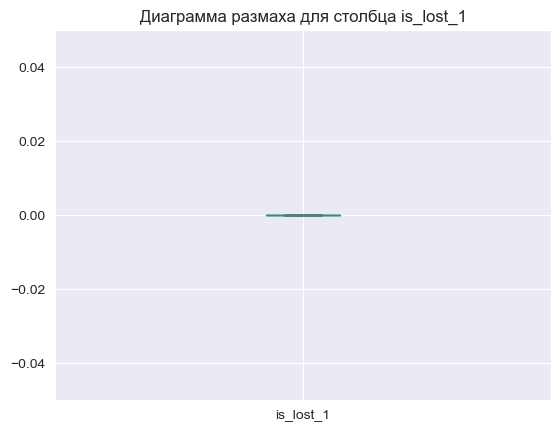


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


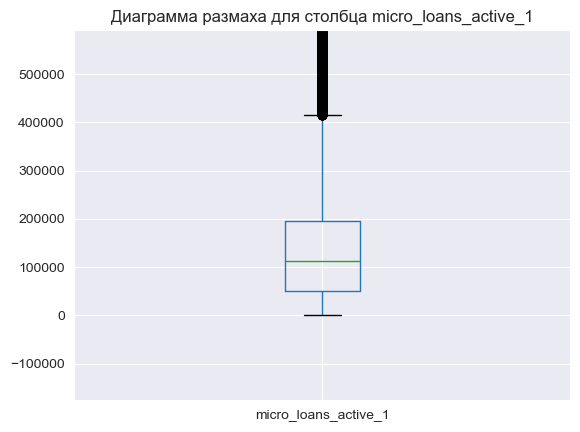


Количество выбросов: 1242
Заменим строки, где есть выбросы на медиану 112000.0 в столбце  micro_loans_active_1 , значения 
 которых больше Q3 + 1.5*IQR (415304.375) и меньше Q1 - 1.5*IQR (-169182.625).


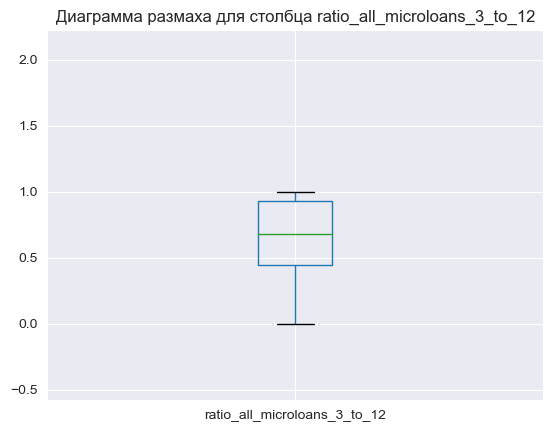


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.6842105263157895 в столбце  ratio_all_microloans_3_to_12 , значения 
 которых больше Q3 + 1.5*IQR (1.647) и меньше Q1 - 1.5*IQR (-0.274).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


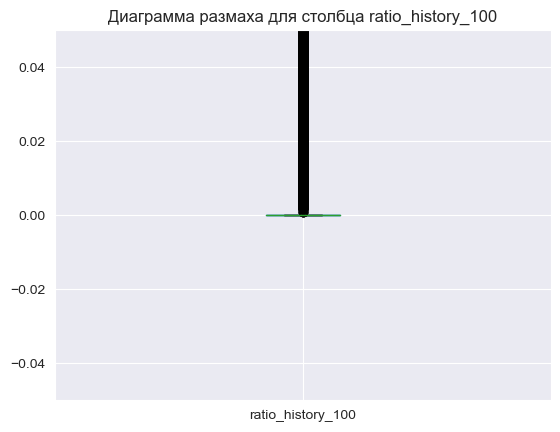


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_100 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


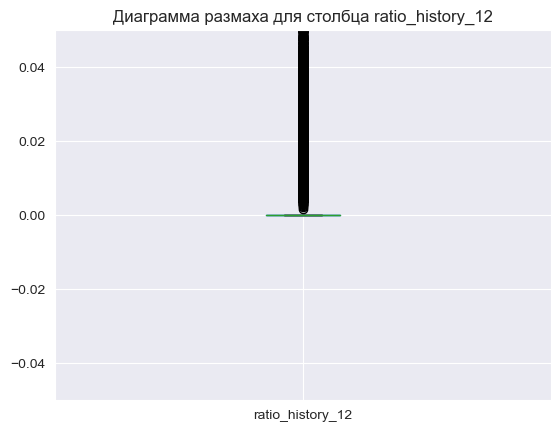


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_12 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


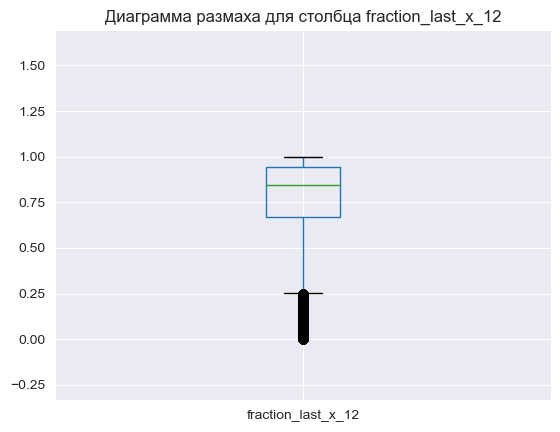


Количество выбросов: 1681
Заменим строки, где есть выбросы на медиану 0.8461538461538459 в столбце  fraction_last_x_12 , значения 
 которых больше Q3 + 1.5*IQR (1.359) и меньше Q1 - 1.5*IQR (0.251).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


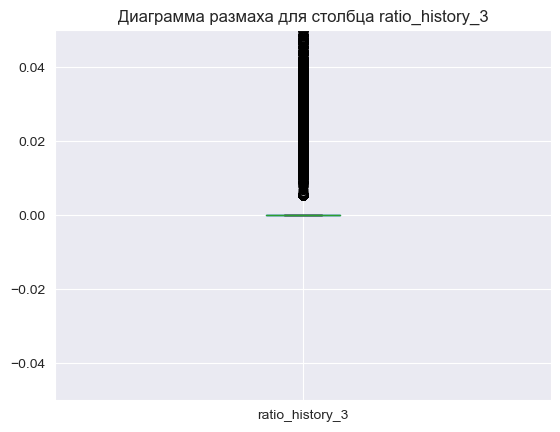


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


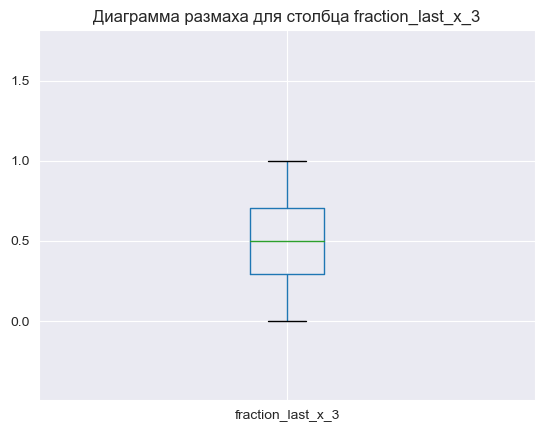


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.5 в столбце  fraction_last_x_3 , значения 
 которых больше Q3 + 1.5*IQR (1.321) и меньше Q1 - 1.5*IQR (-0.319).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


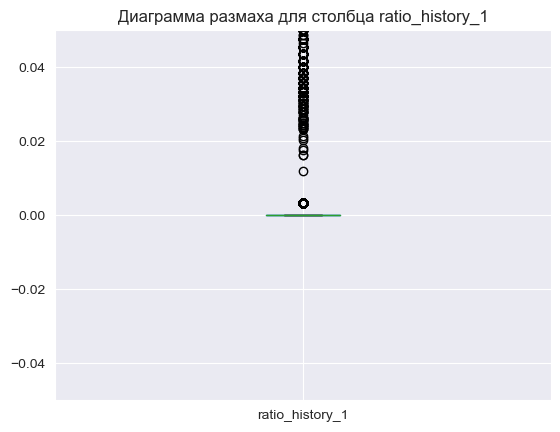


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


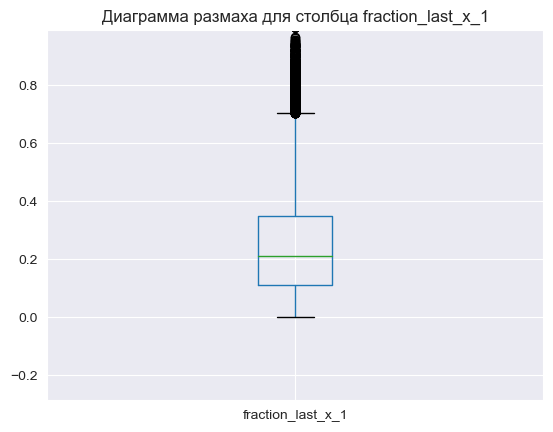


Количество выбросов: 771
Заменим строки, где есть выбросы на медиану 0.2131563618207539 в столбце  fraction_last_x_1 , значения 
 которых больше Q3 + 1.5*IQR (0.706) и меньше Q1 - 1.5*IQR (-0.243).


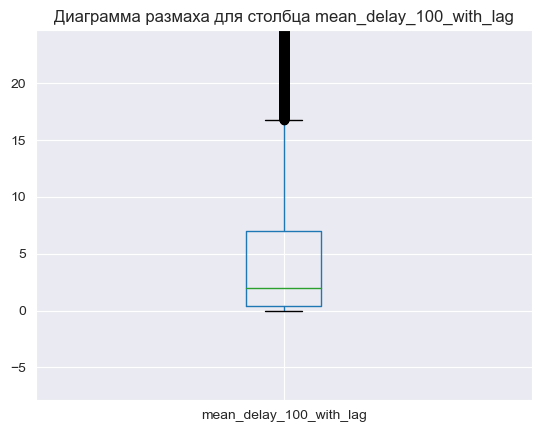


Количество выбросов: 3313
Заменим строки, где есть выбросы на медиану 2.023122159850307 в столбце  mean_delay_100_with_lag , значения 
 которых больше Q3 + 1.5*IQR (16.791) и меньше Q1 - 1.5*IQR (-9.405).


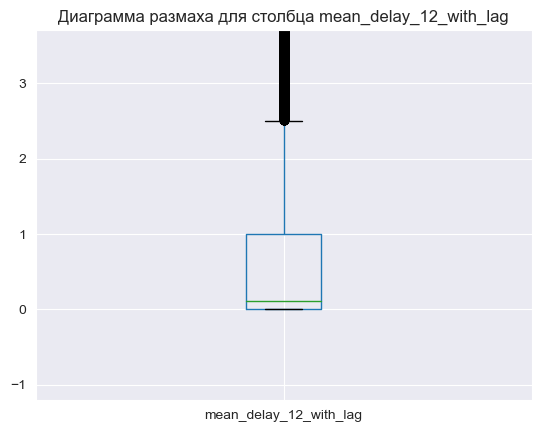


Количество выбросов: 3836
Заменим строки, где есть выбросы на медиану 0.106060606060606 в столбце  mean_delay_12_with_lag , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


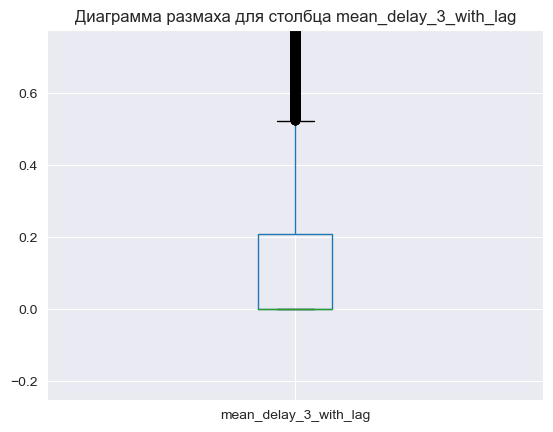


Количество выбросов: 4874
Заменим строки, где есть выбросы на медиану 0.0 в столбце  mean_delay_3_with_lag , значения 
 которых больше Q3 + 1.5*IQR (0.523) и меньше Q1 - 1.5*IQR (-0.314).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


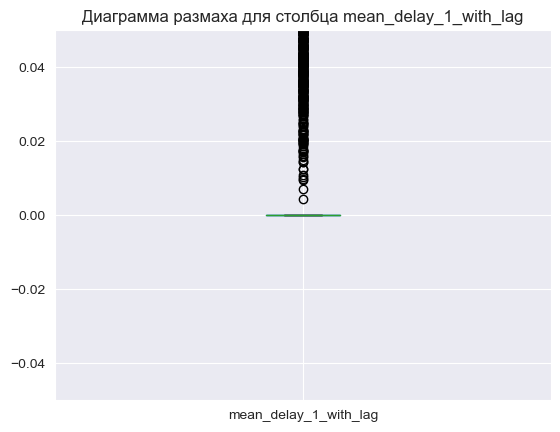


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  mean_delay_1_with_lag , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


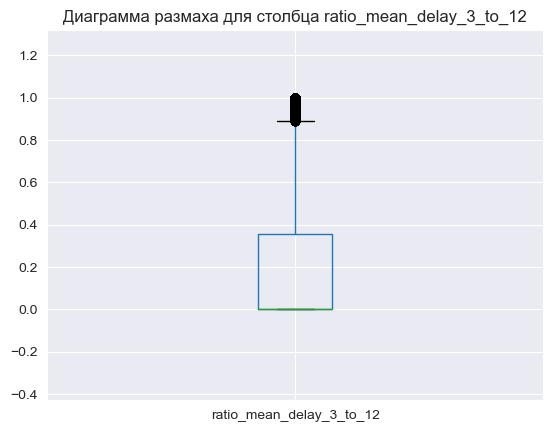


Количество выбросов: 4023
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_mean_delay_3_to_12 , значения 
 которых больше Q3 + 1.5*IQR (0.890) и меньше Q1 - 1.5*IQR (-0.534).


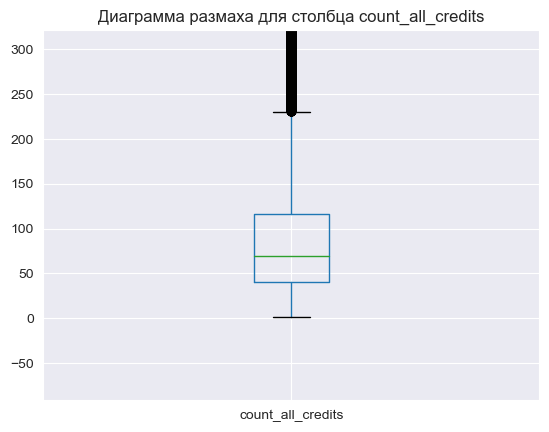


Количество выбросов: 1843
Заменим строки, где есть выбросы на медиану 69.0 в столбце  count_all_credits , значения 
 которых больше Q3 + 1.5*IQR (230.000) и меньше Q1 - 1.5*IQR (-74.000).


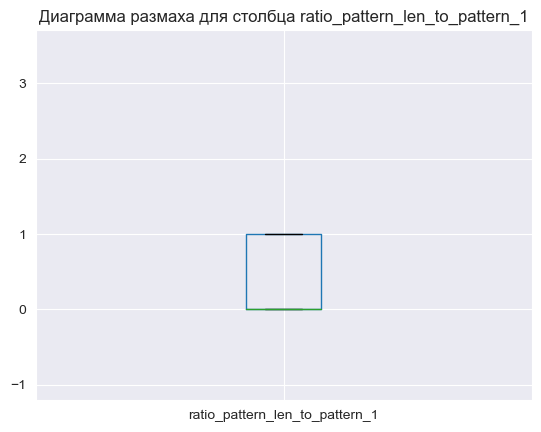


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_1 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


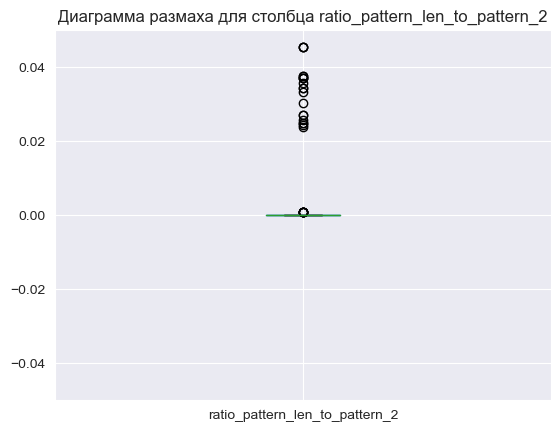


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_2 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


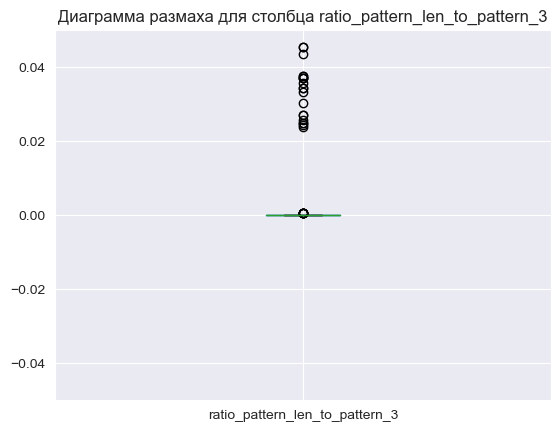


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


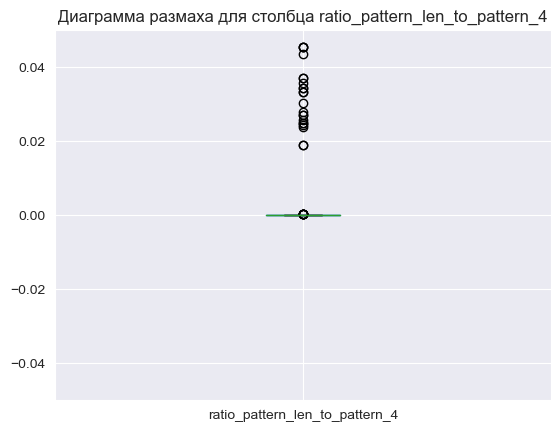


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_4 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


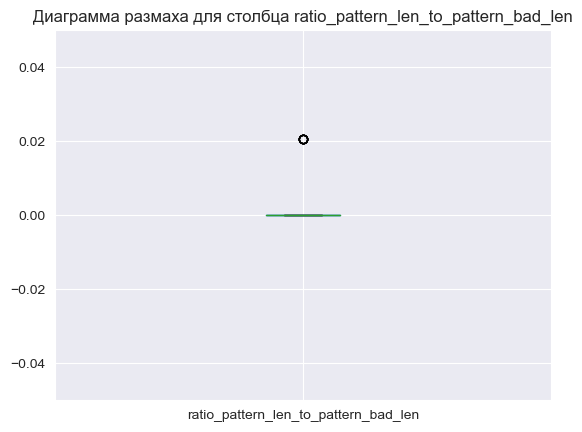


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_bad_len , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


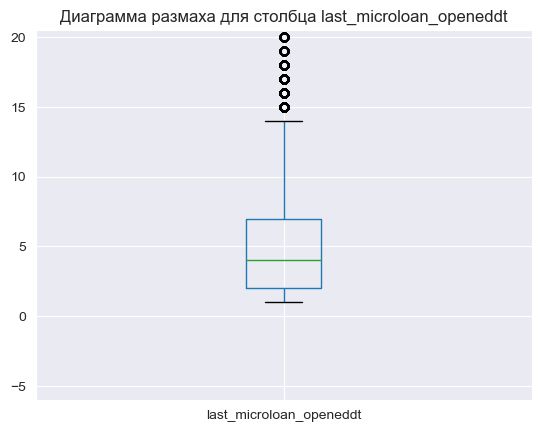


Количество выбросов: 2276
Заменим строки, где есть выбросы на медиану 4.0 в столбце  last_microloan_openeddt , значения 
 которых больше Q3 + 1.5*IQR (14.500) и меньше Q1 - 1.5*IQR (-5.500).


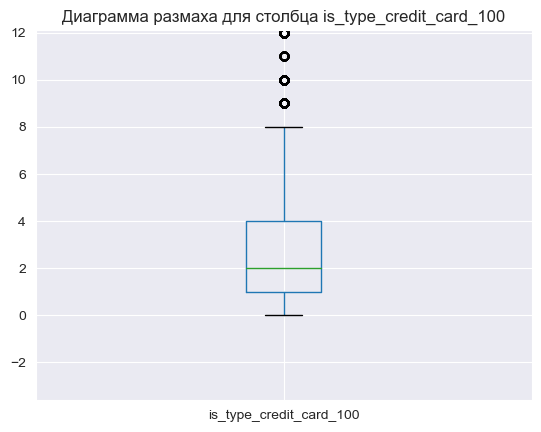


Количество выбросов: 1816
Заменим строки, где есть выбросы на медиану 2.0 в столбце  is_type_credit_card_100 , значения 
 которых больше Q3 + 1.5*IQR (8.500) и меньше Q1 - 1.5*IQR (-3.500).


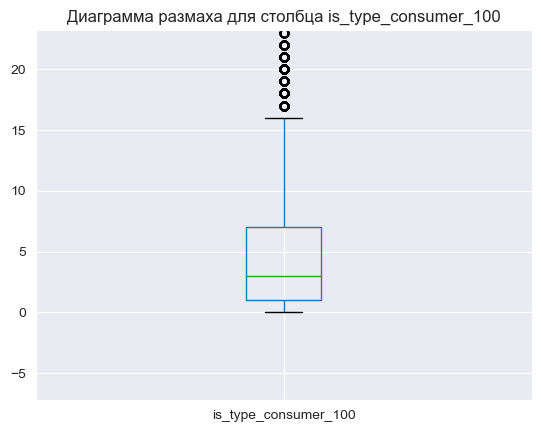


Количество выбросов: 1896
Заменим строки, где есть выбросы на медиану 3.0 в столбце  is_type_consumer_100 , значения 
 которых больше Q3 + 1.5*IQR (16.000) и меньше Q1 - 1.5*IQR (-8.000).


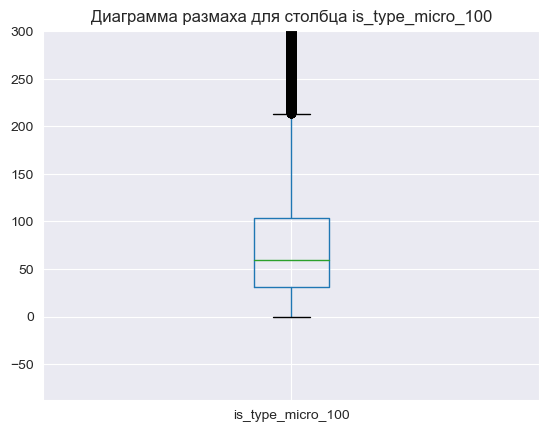


Количество выбросов: 1808
Заменим строки, где есть выбросы на медиану 59.0 в столбце  is_type_micro_100 , значения 
 которых больше Q3 + 1.5*IQR (213.500) и меньше Q1 - 1.5*IQR (-78.500).


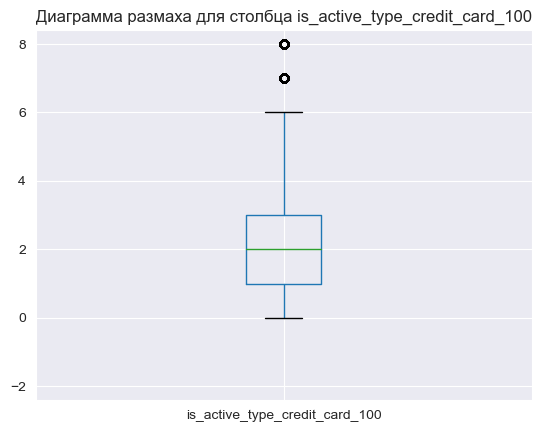


Количество выбросов: 2123
Заменим строки, где есть выбросы на медиану 2.0 в столбце  is_active_type_credit_card_100 , значения 
 которых больше Q3 + 1.5*IQR (6.000) и меньше Q1 - 1.5*IQR (-2.000).


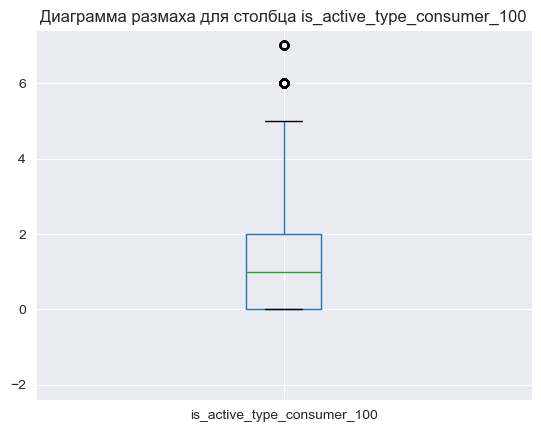


Количество выбросов: 1194
Заменим строки, где есть выбросы на медиану 1.0 в столбце  is_active_type_consumer_100 , значения 
 которых больше Q3 + 1.5*IQR (5.000) и меньше Q1 - 1.5*IQR (-3.000).


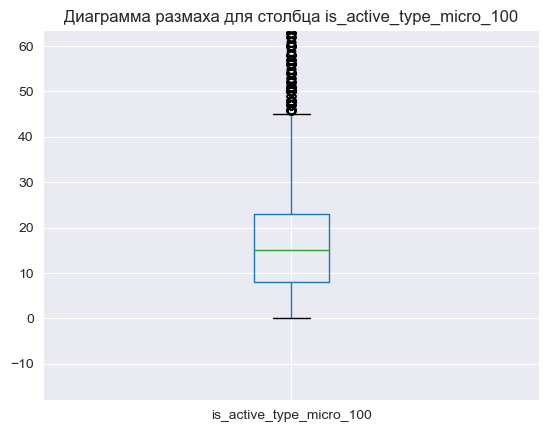


Количество выбросов: 884
Заменим строки, где есть выбросы на медиану 15.0 в столбце  is_active_type_micro_100 , значения 
 которых больше Q3 + 1.5*IQR (45.500) и меньше Q1 - 1.5*IQR (-14.500).


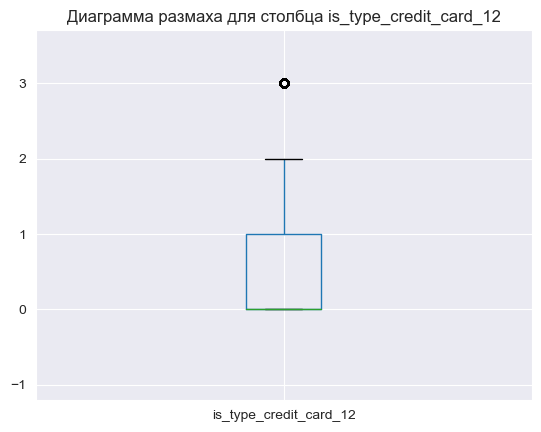


Количество выбросов: 2561
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


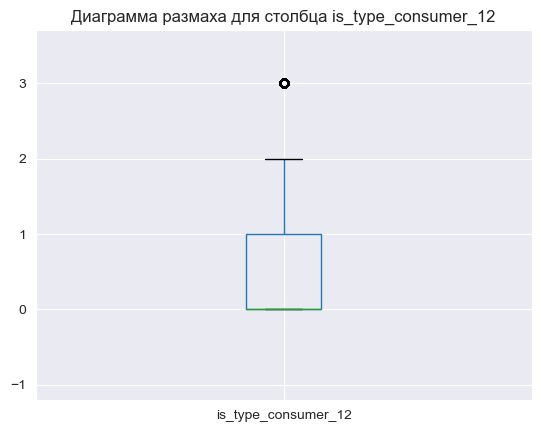


Количество выбросов: 4128
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


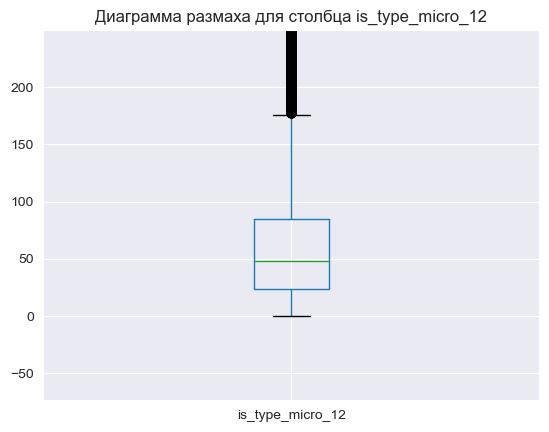


Количество выбросов: 1687
Заменим строки, где есть выбросы на медиану 48.0 в столбце  is_type_micro_12 , значения 
 которых больше Q3 + 1.5*IQR (176.500) и меньше Q1 - 1.5*IQR (-67.500).


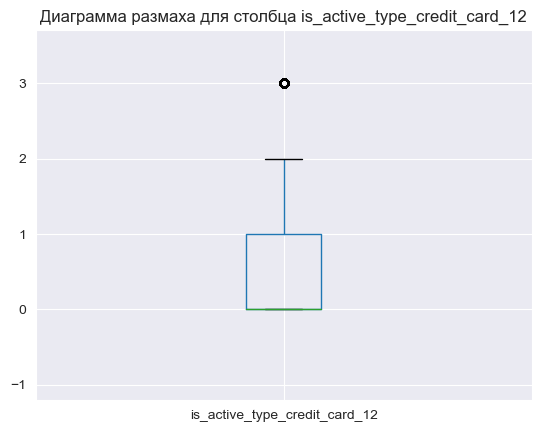


Количество выбросов: 2115
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


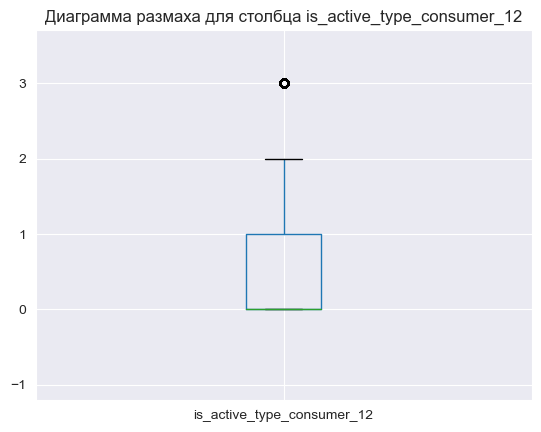


Количество выбросов: 1410
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


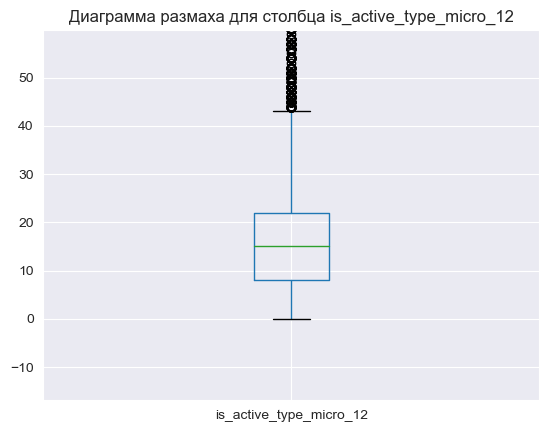


Количество выбросов: 1028
Заменим строки, где есть выбросы на медиану 15.0 в столбце  is_active_type_micro_12 , значения 
 которых больше Q3 + 1.5*IQR (43.000) и меньше Q1 - 1.5*IQR (-13.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


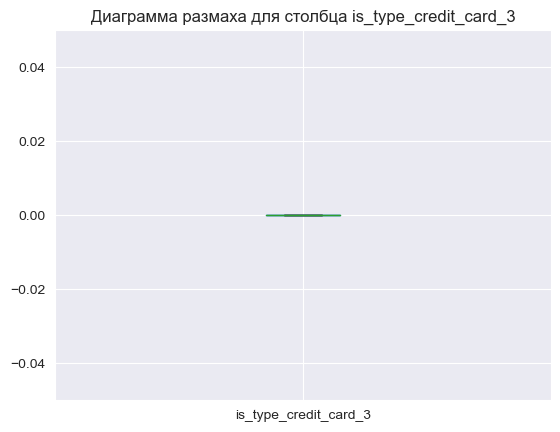


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


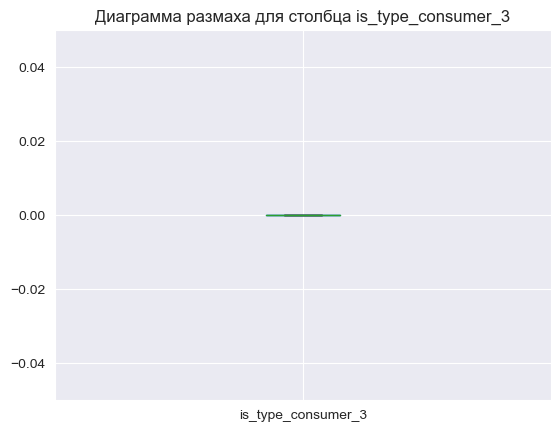


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


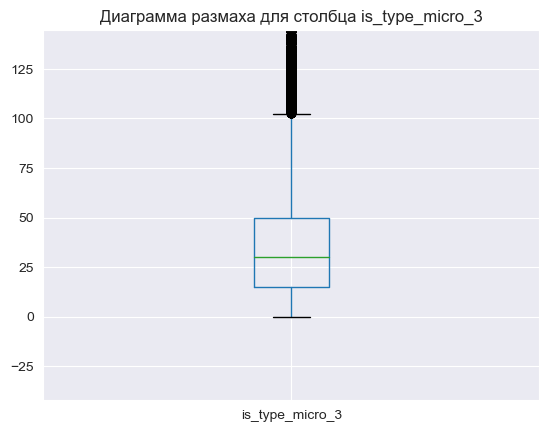


Количество выбросов: 1392
Заменим строки, где есть выбросы на медиану 30.0 в столбце  is_type_micro_3 , значения 
 которых больше Q3 + 1.5*IQR (102.500) и меньше Q1 - 1.5*IQR (-37.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


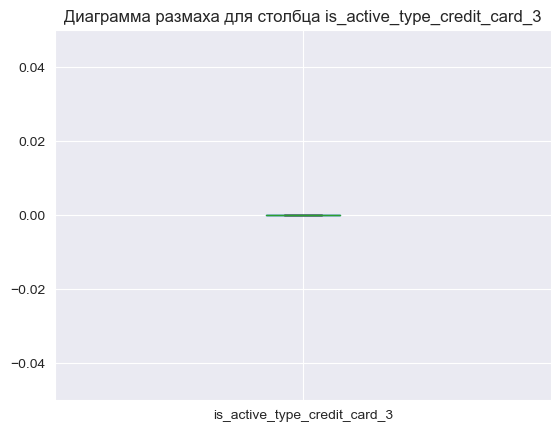


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


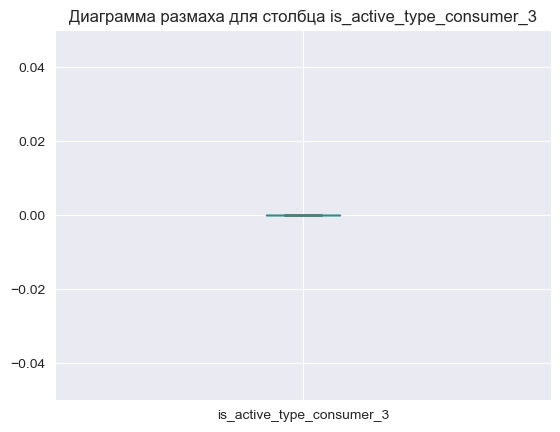


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


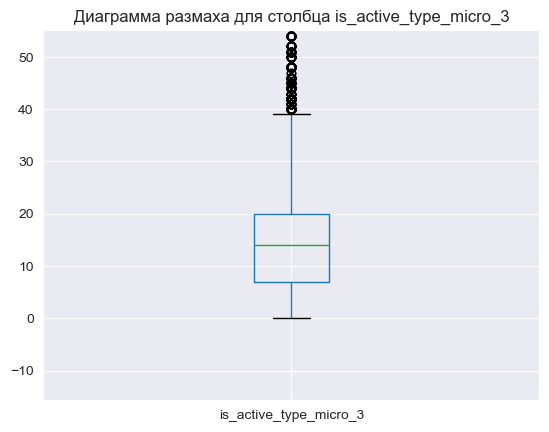


Количество выбросов: 977
Заменим строки, где есть выбросы на медиану 14.0 в столбце  is_active_type_micro_3 , значения 
 которых больше Q3 + 1.5*IQR (39.500) и меньше Q1 - 1.5*IQR (-12.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


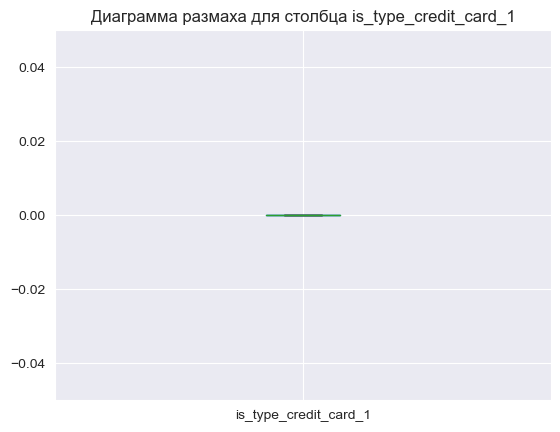


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


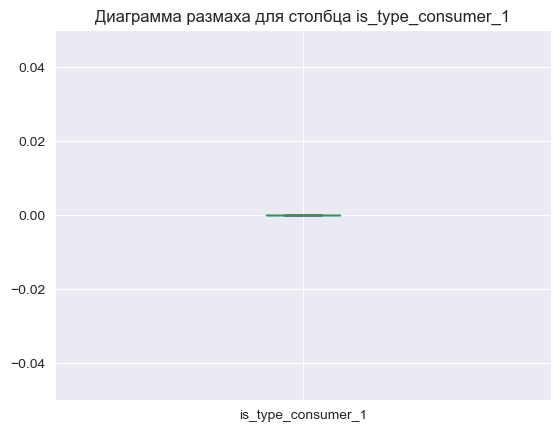


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


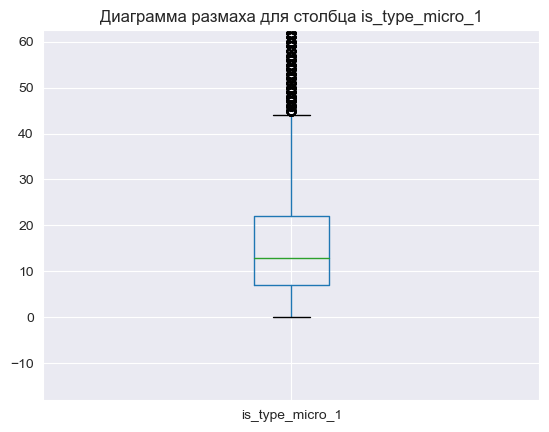


Количество выбросов: 1510
Заменим строки, где есть выбросы на медиану 13.0 в столбце  is_type_micro_1 , значения 
 которых больше Q3 + 1.5*IQR (44.500) и меньше Q1 - 1.5*IQR (-15.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


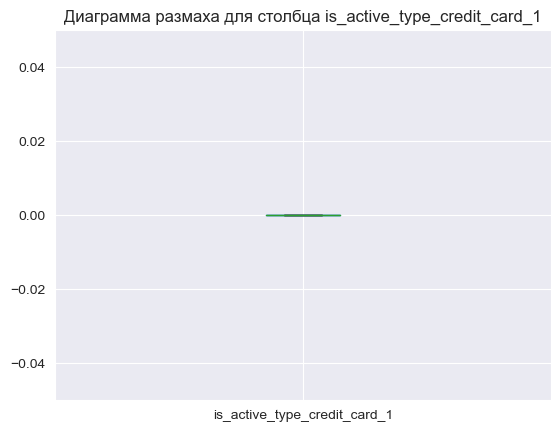


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


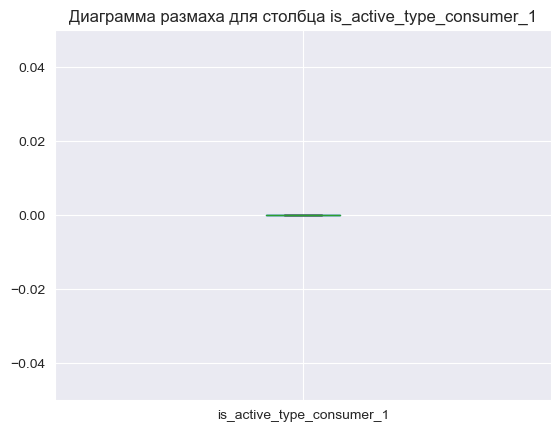


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


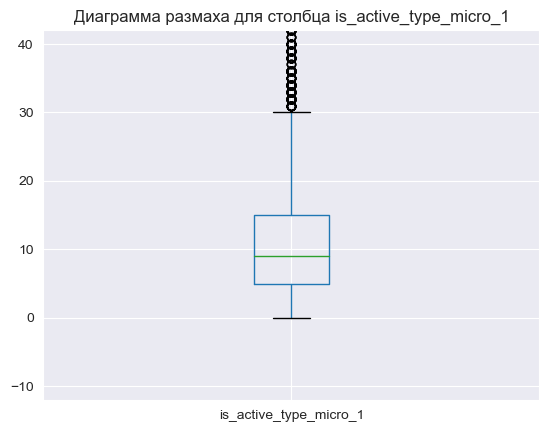


Количество выбросов: 978
Заменим строки, где есть выбросы на медиану 9.0 в столбце  is_active_type_micro_1 , значения 
 которых больше Q3 + 1.5*IQR (30.000) и меньше Q1 - 1.5*IQR (-10.000).


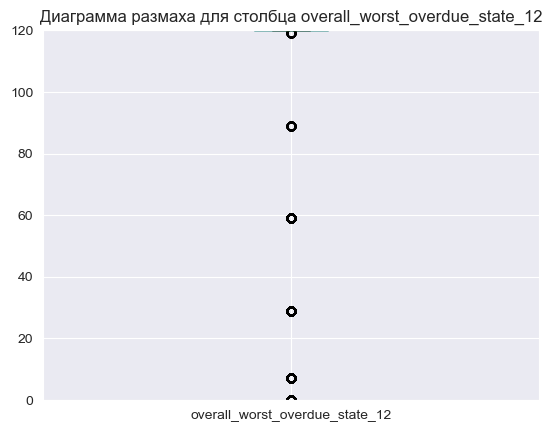


Количество выбросов: 29770
Заменим строки, где есть выбросы на медиану 120.0 в столбце  overall_worst_overdue_state_12 , значения 
 которых больше Q3 + 1.5*IQR (120.000) и меньше Q1 - 1.5*IQR (120.000).


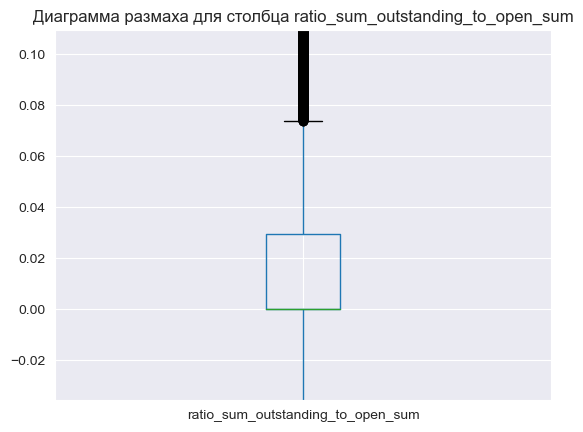


Количество выбросов: 7524
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_sum_outstanding_to_open_sum , значения 
 которых больше Q3 + 1.5*IQR (0.074) и меньше Q1 - 1.5*IQR (-0.044).


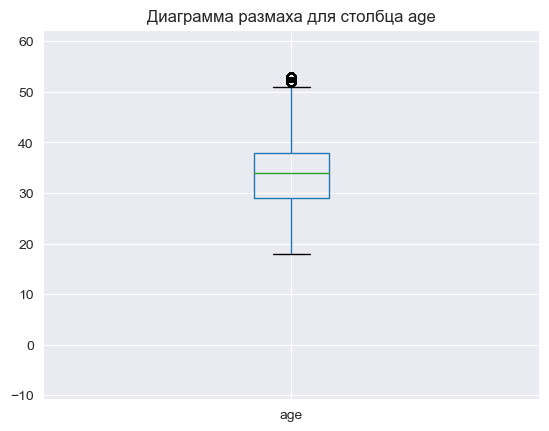


Количество выбросов: 332
Заменим строки, где есть выбросы на медиану 33.0 в столбце  age , значения 
 которых больше Q3 + 1.5*IQR (51.500) и меньше Q1 - 1.5*IQR (15.500).


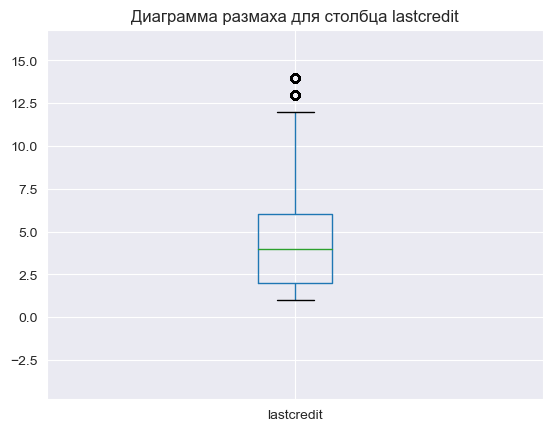


Количество выбросов: 691
Заменим строки, где есть выбросы на медиану 4.0 в столбце  lastcredit , значения 
 которых больше Q3 + 1.5*IQR (12.000) и меньше Q1 - 1.5*IQR (-4.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


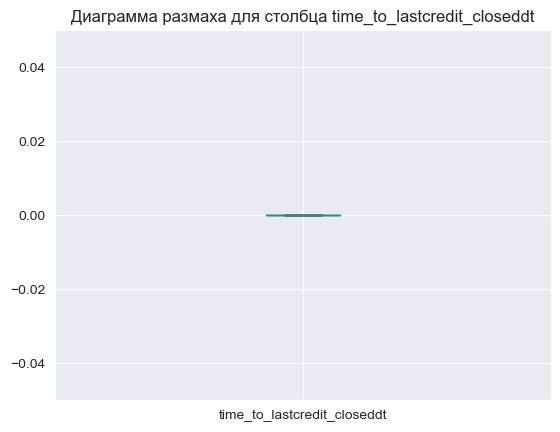


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  time_to_lastcredit_closeddt , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


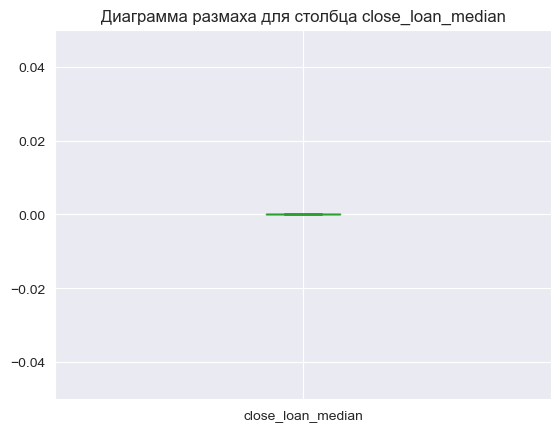


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  close_loan_median , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


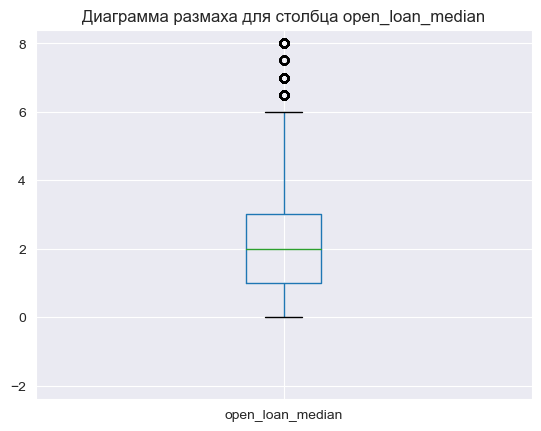


Количество выбросов: 1214
Заменим строки, где есть выбросы на медиану 2.0 в столбце  open_loan_median , значения 
 которых больше Q3 + 1.5*IQR (6.000) и меньше Q1 - 1.5*IQR (-2.000).


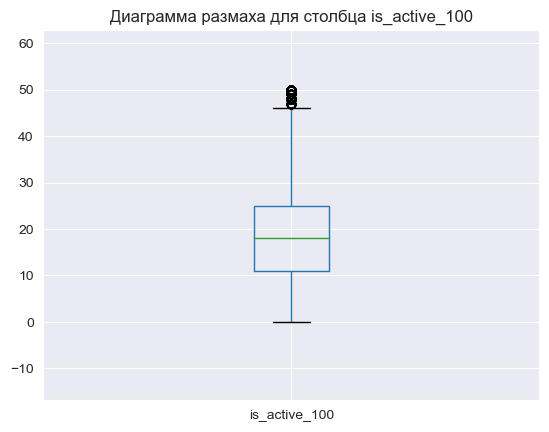


Количество выбросов: 358
Заменим строки, где есть выбросы на медиану 18.0 в столбце  is_active_100 , значения 
 которых больше Q3 + 1.5*IQR (46.000) и меньше Q1 - 1.5*IQR (-10.000).


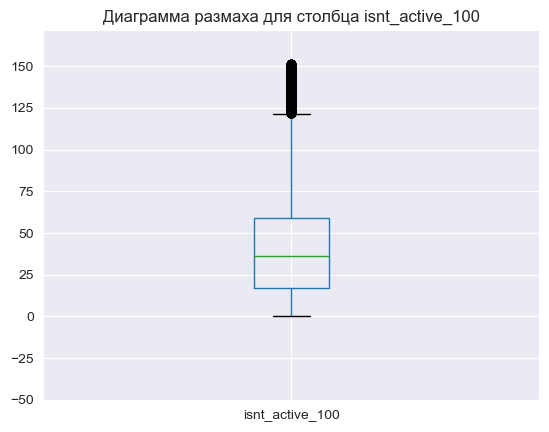


Количество выбросов: 697
Заменим строки, где есть выбросы на медиану 36.0 в столбце  isnt_active_100 , значения 
 которых больше Q3 + 1.5*IQR (121.375) и меньше Q1 - 1.5*IQR (-45.625).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


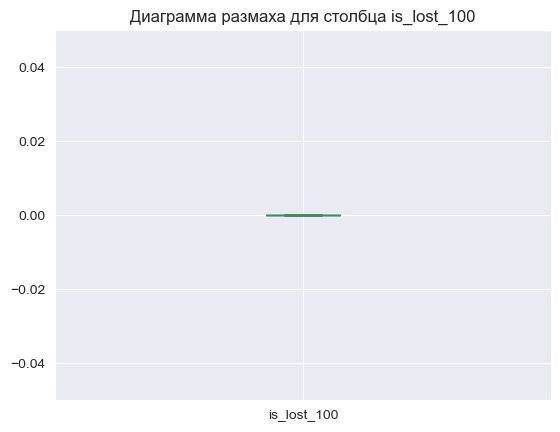


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_100 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


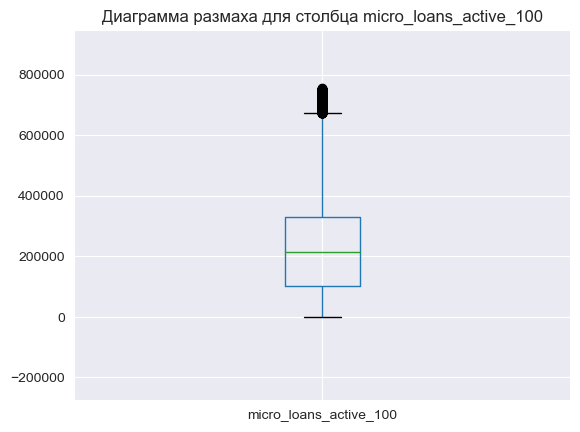


Количество выбросов: 428
Заменим строки, где есть выбросы на медиану 213337.0 в столбце  micro_loans_active_100 , значения 
 которых больше Q3 + 1.5*IQR (673004.375) и меньше Q1 - 1.5*IQR (-241322.625).


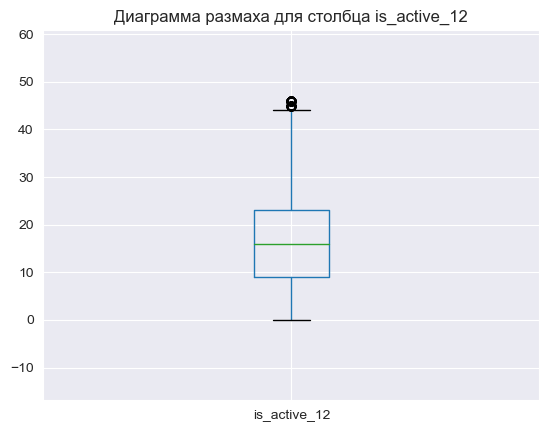


Количество выбросов: 285
Заменим строки, где есть выбросы на медиану 16.0 в столбце  is_active_12 , значения 
 которых больше Q3 + 1.5*IQR (44.000) и меньше Q1 - 1.5*IQR (-12.000).


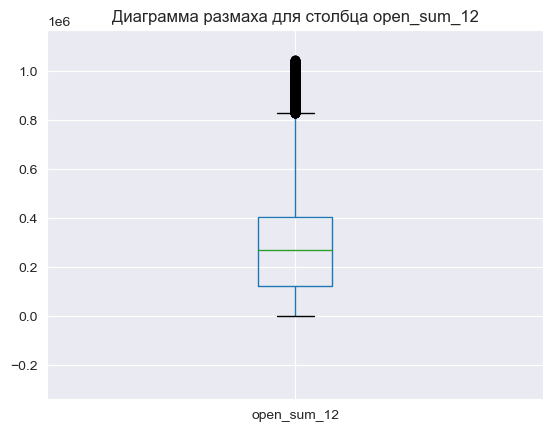


Количество выбросов: 691
Заменим строки, где есть выбросы на медиану 273953.0 в столбце  open_sum_12 , значения 
 которых больше Q3 + 1.5*IQR (829124.625) и меньше Q1 - 1.5*IQR (-302948.375).


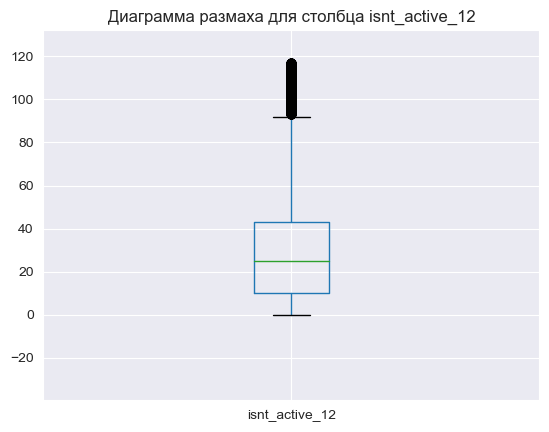


Количество выбросов: 683
Заменим строки, где есть выбросы на медиану 25.0 в столбце  isnt_active_12 , значения 
 которых больше Q3 + 1.5*IQR (92.500) и меньше Q1 - 1.5*IQR (-39.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


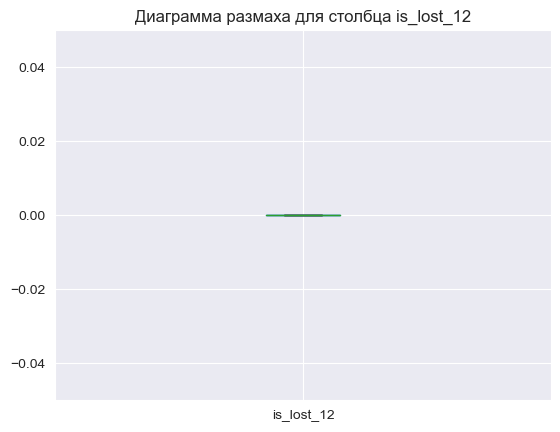


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_12 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


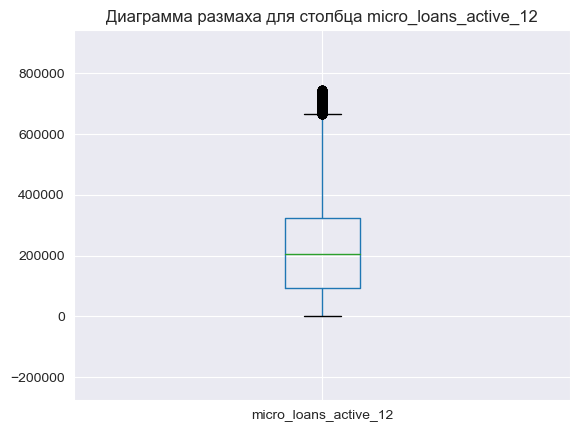


Количество выбросов: 400
Заменим строки, где есть выбросы на медиану 204530.0 в столбце  micro_loans_active_12 , значения 
 которых больше Q3 + 1.5*IQR (666711.875) и меньше Q1 - 1.5*IQR (-251865.125).


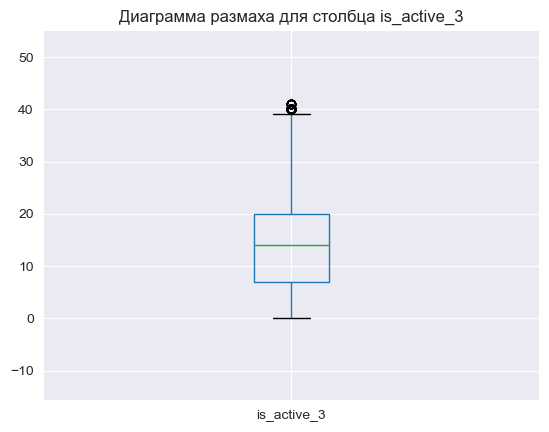


Количество выбросов: 250
Заменим строки, где есть выбросы на медиану 14.0 в столбце  is_active_3 , значения 
 которых больше Q3 + 1.5*IQR (39.500) и меньше Q1 - 1.5*IQR (-12.500).


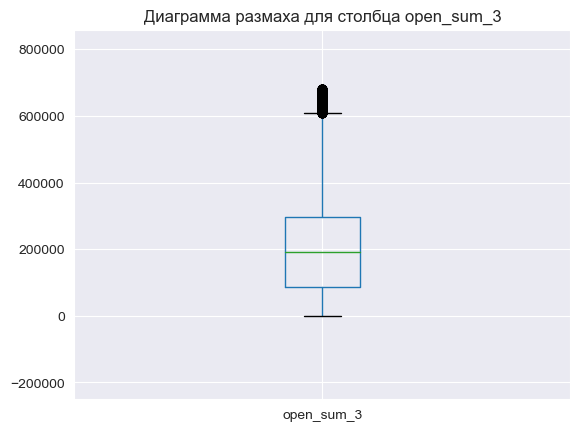


Количество выбросов: 398
Заменим строки, где есть выбросы на медиану 190739.0 в столбце  open_sum_3 , значения 
 которых больше Q3 + 1.5*IQR (608449.250) и меньше Q1 - 1.5*IQR (-226190.750).


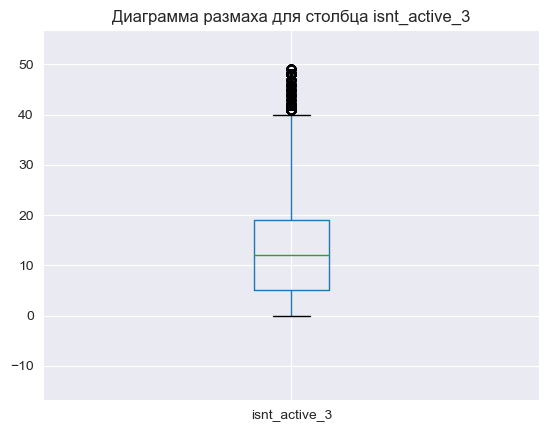


Количество выбросов: 694
Заменим строки, где есть выбросы на медиану 12.0 в столбце  isnt_active_3 , значения 
 которых больше Q3 + 1.5*IQR (40.000) и меньше Q1 - 1.5*IQR (-16.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


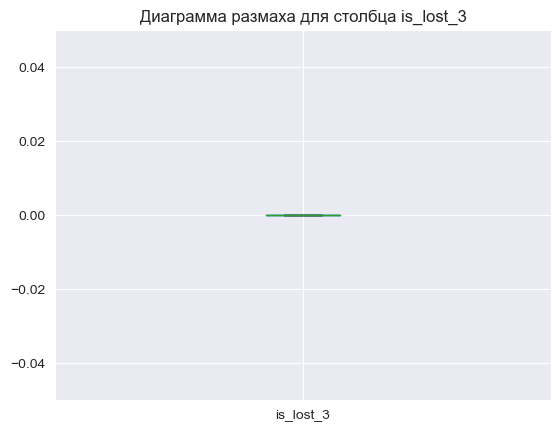


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


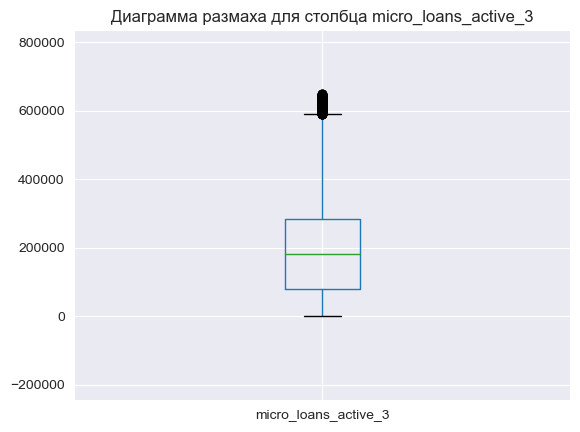


Количество выбросов: 332
Заменим строки, где есть выбросы на медиану 182285.0 в столбце  micro_loans_active_3 , значения 
 которых больше Q3 + 1.5*IQR (589636.625) и меньше Q1 - 1.5*IQR (-225516.375).


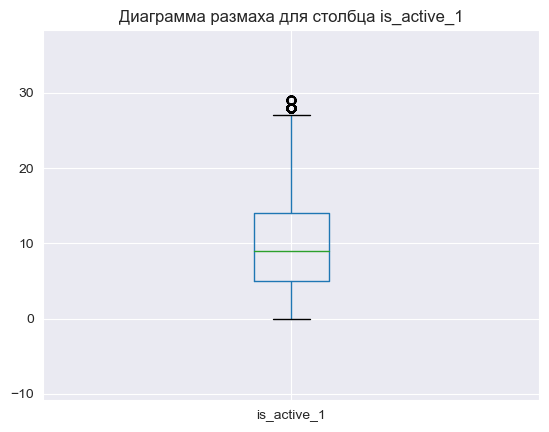


Количество выбросов: 287
Заменим строки, где есть выбросы на медиану 9.0 в столбце  is_active_1 , значения 
 которых больше Q3 + 1.5*IQR (27.500) и меньше Q1 - 1.5*IQR (-8.500).


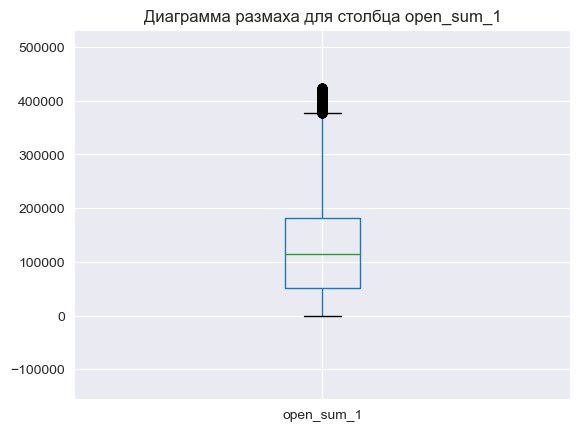


Количество выбросов: 401
Заменим строки, где есть выбросы на медиану 115390.0 в столбце  open_sum_1 , значения 
 которых больше Q3 + 1.5*IQR (376173.125) и меньше Q1 - 1.5*IQR (-143303.875).


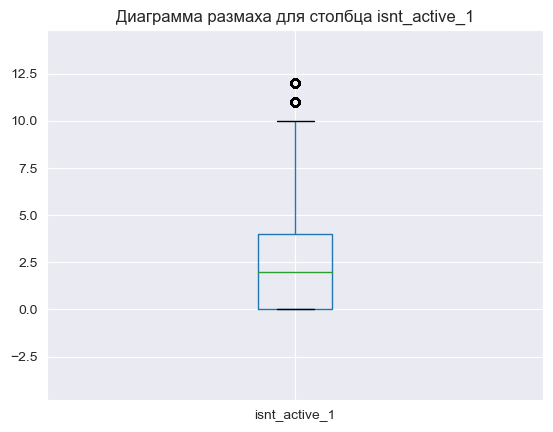


Количество выбросов: 592
Заменим строки, где есть выбросы на медиану 2.0 в столбце  isnt_active_1 , значения 
 которых больше Q3 + 1.5*IQR (10.000) и меньше Q1 - 1.5*IQR (-6.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


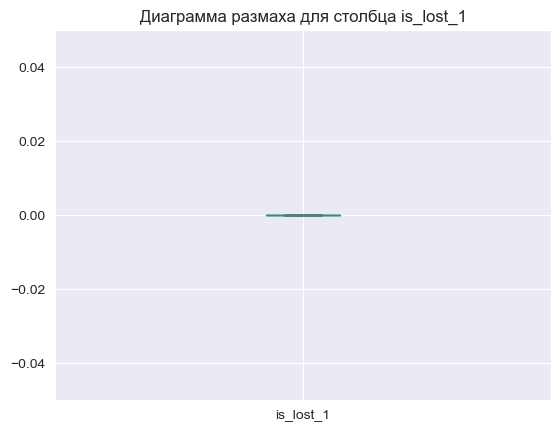


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


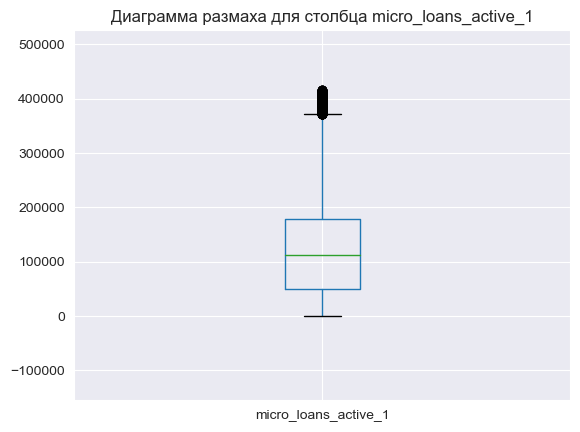


Количество выбросов: 367
Заменим строки, где есть выбросы на медиану 113177.0 в столбце  micro_loans_active_1 , значения 
 которых больше Q3 + 1.5*IQR (371375.000) и меньше Q1 - 1.5*IQR (-142825.000).


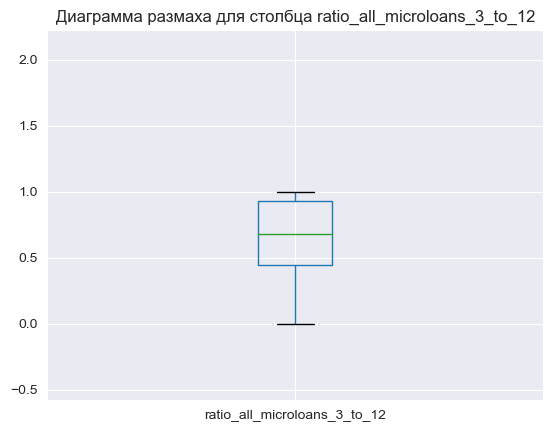


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.6829268292682927 в столбце  ratio_all_microloans_3_to_12 , значения 
 которых больше Q3 + 1.5*IQR (1.647) и меньше Q1 - 1.5*IQR (-0.274).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


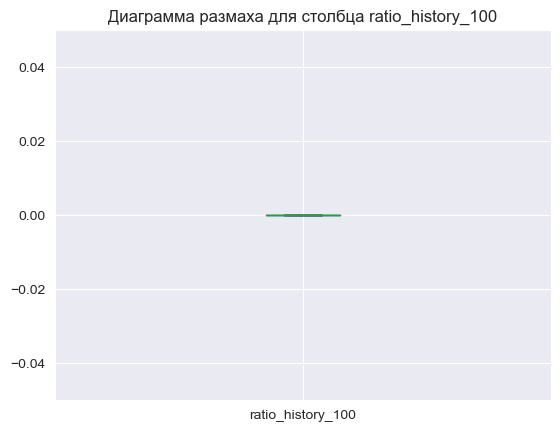


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_100 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


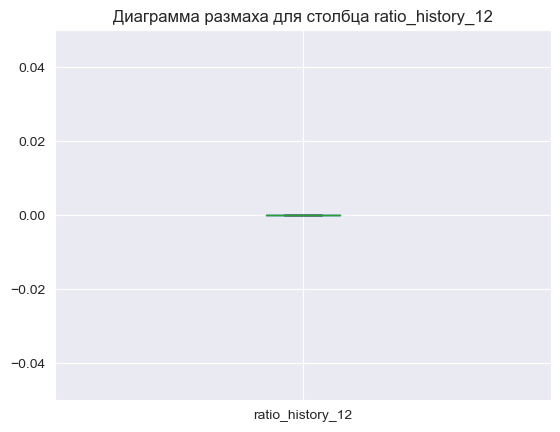


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_12 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


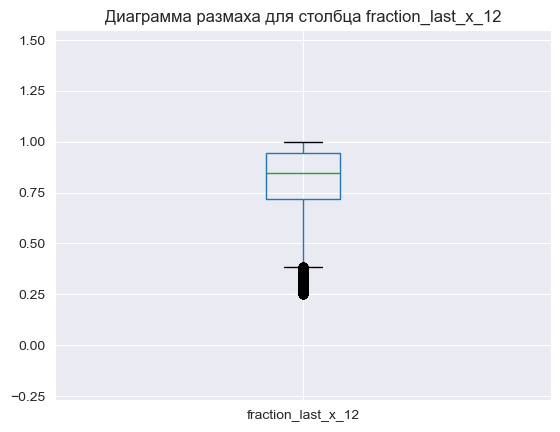


Количество выбросов: 593
Заменим строки, где есть выбросы на медиану 0.842105263157895 в столбце  fraction_last_x_12 , значения 
 которых больше Q3 + 1.5*IQR (1.279) и меньше Q1 - 1.5*IQR (0.385).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


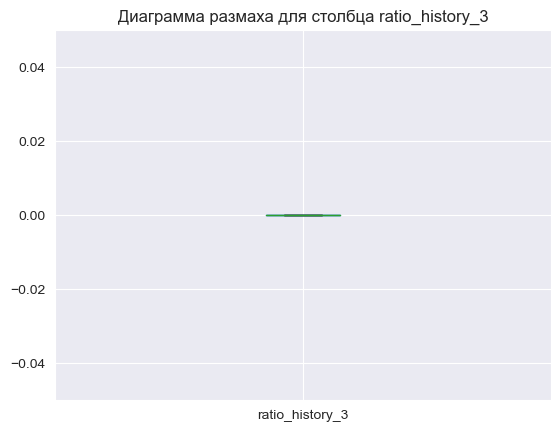


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


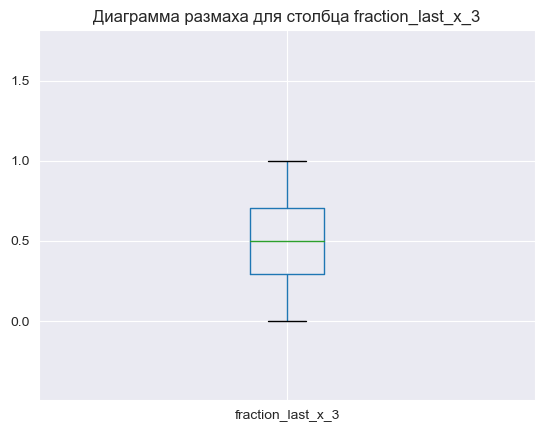


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.5 в столбце  fraction_last_x_3 , значения 
 которых больше Q3 + 1.5*IQR (1.321) и меньше Q1 - 1.5*IQR (-0.319).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


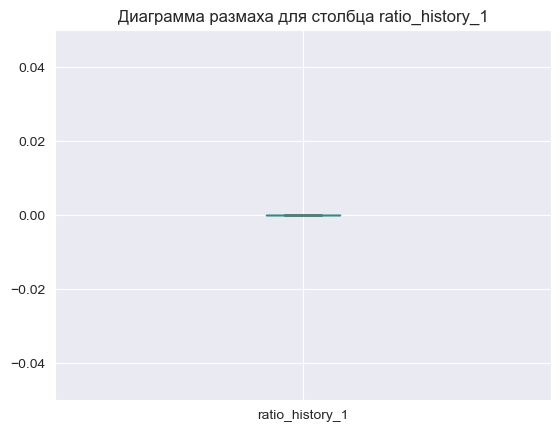


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


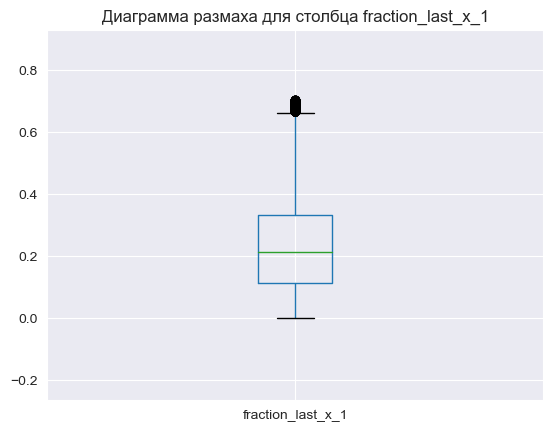


Количество выбросов: 237
Заменим строки, где есть выбросы на медиану 0.2105263157894736 в столбце  fraction_last_x_1 , значения 
 которых больше Q3 + 1.5*IQR (0.664) и меньше Q1 - 1.5*IQR (-0.218).


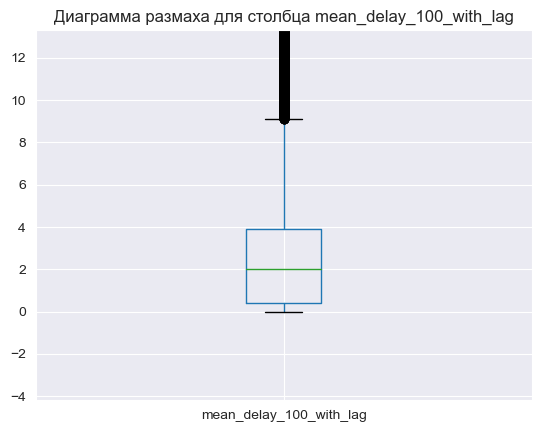


Количество выбросов: 1286
Заменим строки, где есть выбросы на медиану 2.03125 в столбце  mean_delay_100_with_lag , значения 
 которых больше Q3 + 1.5*IQR (9.123) и меньше Q1 - 1.5*IQR (-4.804).


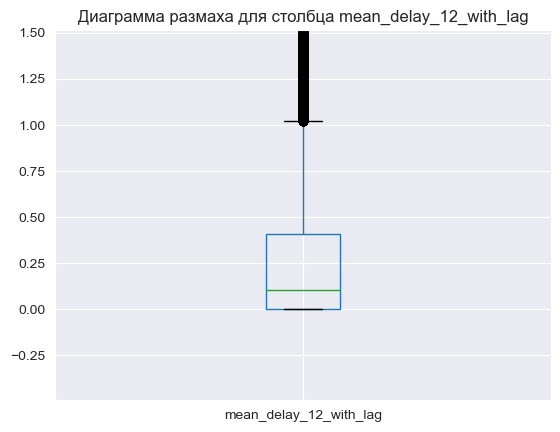


Количество выбросов: 1607
Заменим строки, где есть выбросы на медиану 0.1206896551724138 в столбце  mean_delay_12_with_lag , значения 
 которых больше Q3 + 1.5*IQR (1.023) и меньше Q1 - 1.5*IQR (-0.614).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


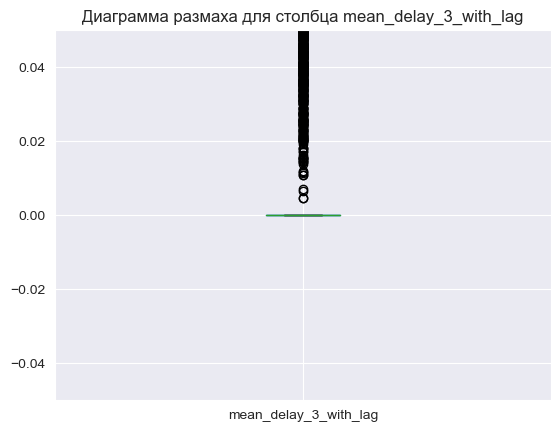


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  mean_delay_3_with_lag , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


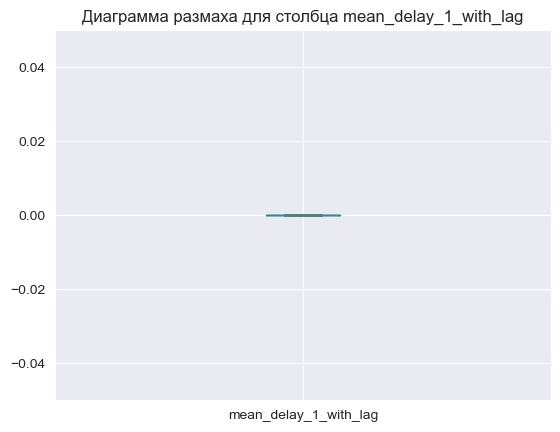


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  mean_delay_1_with_lag , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


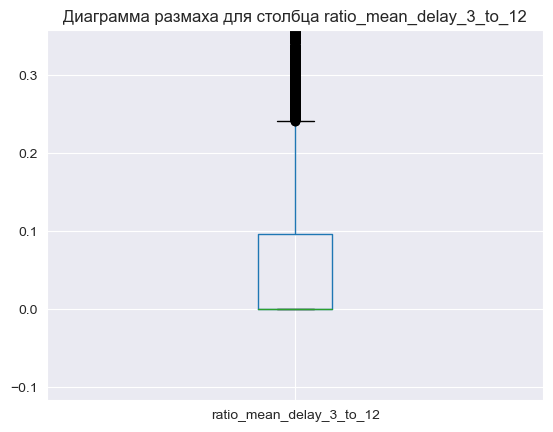


Количество выбросов: 1841
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_mean_delay_3_to_12 , значения 
 которых больше Q3 + 1.5*IQR (0.242) и меньше Q1 - 1.5*IQR (-0.145).


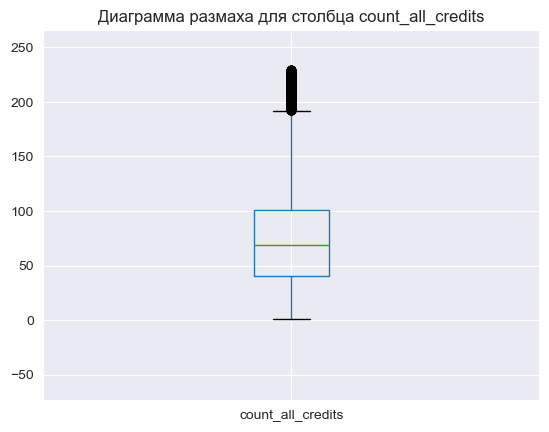


Количество выбросов: 597
Заменим строки, где есть выбросы на медиану 69.0 в столбце  count_all_credits , значения 
 которых больше Q3 + 1.5*IQR (192.500) и меньше Q1 - 1.5*IQR (-51.500).


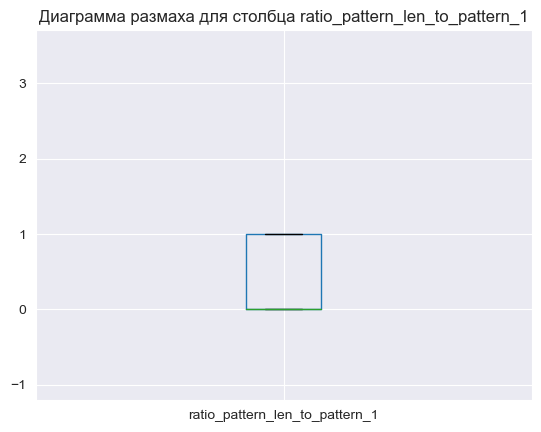


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_1 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


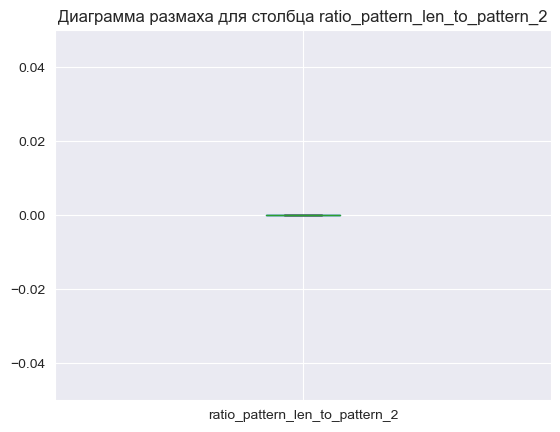


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_2 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


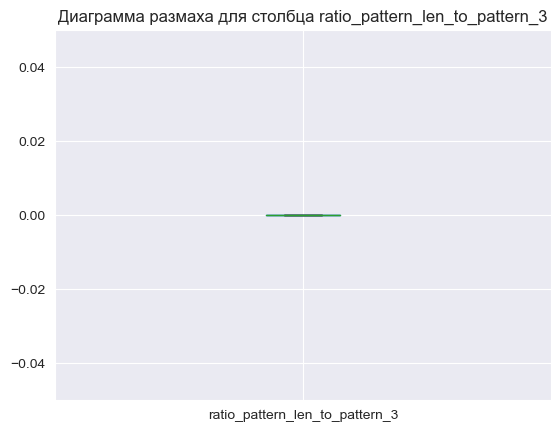


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


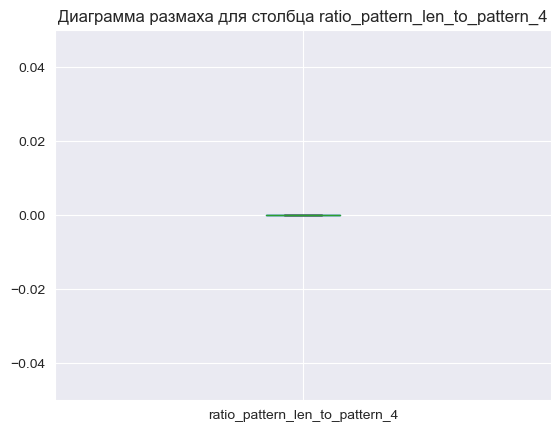


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_4 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


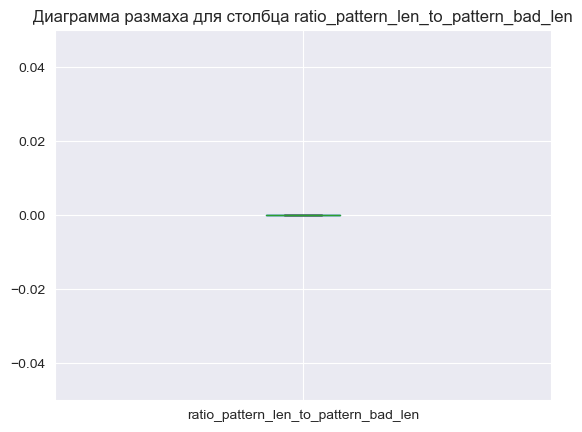


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_bad_len , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


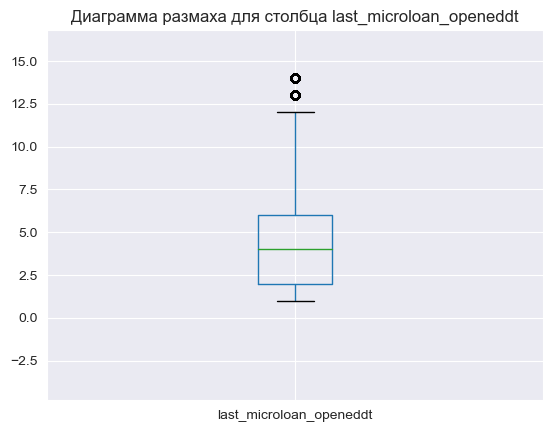


Количество выбросов: 703
Заменим строки, где есть выбросы на медиану 4.0 в столбце  last_microloan_openeddt , значения 
 которых больше Q3 + 1.5*IQR (12.000) и меньше Q1 - 1.5*IQR (-4.000).


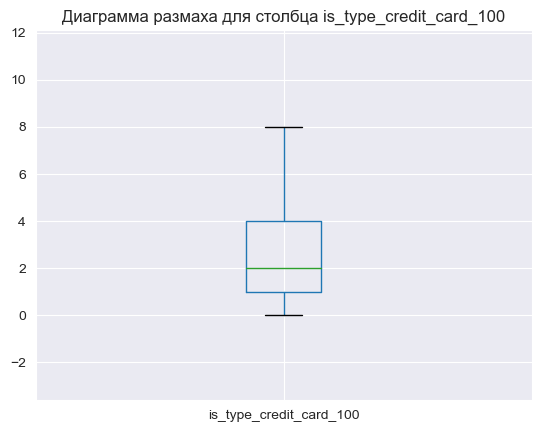


Количество выбросов: 410
Заменим строки, где есть выбросы на медиану 2.0 в столбце  is_type_credit_card_100 , значения 
 которых больше Q3 + 1.5*IQR (8.500) и меньше Q1 - 1.5*IQR (-3.500).


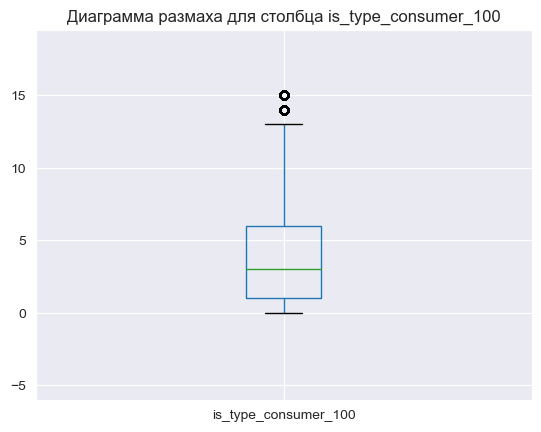


Количество выбросов: 582
Заменим строки, где есть выбросы на медиану 3.0 в столбце  is_type_consumer_100 , значения 
 которых больше Q3 + 1.5*IQR (13.500) и меньше Q1 - 1.5*IQR (-6.500).


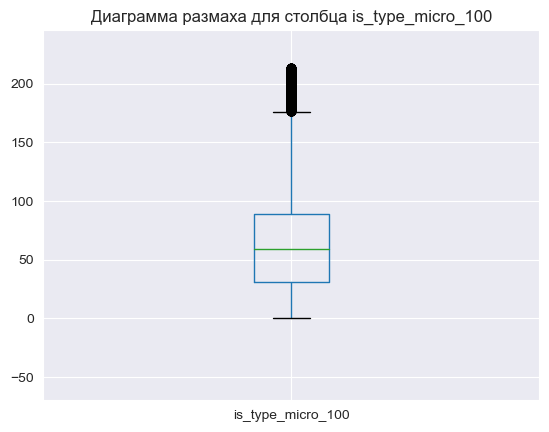


Количество выбросов: 610
Заменим строки, где есть выбросы на медиану 59.0 в столбце  is_type_micro_100 , значения 
 которых больше Q3 + 1.5*IQR (176.000) и меньше Q1 - 1.5*IQR (-56.000).


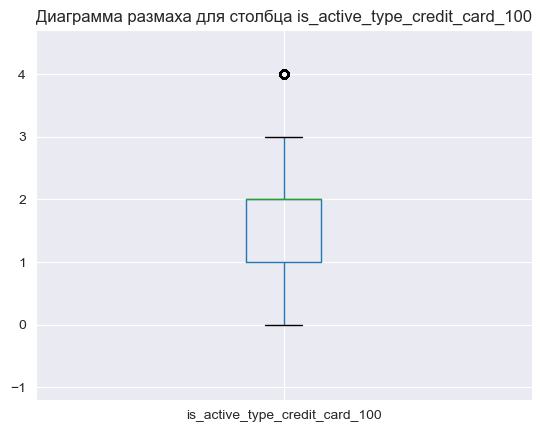


Количество выбросов: 1205
Заменим строки, где есть выбросы на медиану 2.0 в столбце  is_active_type_credit_card_100 , значения 
 которых больше Q3 + 1.5*IQR (3.500) и меньше Q1 - 1.5*IQR (-0.500).


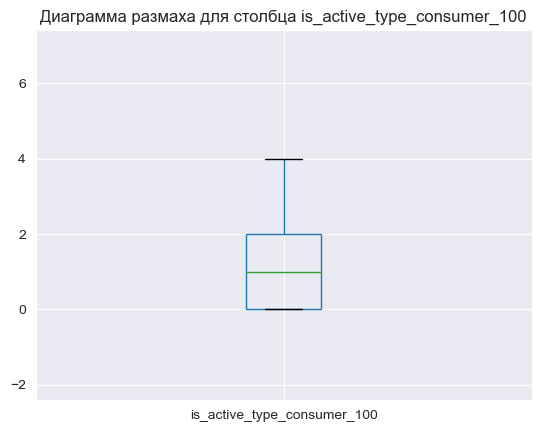


Количество выбросов: 268
Заменим строки, где есть выбросы на медиану 1.0 в столбце  is_active_type_consumer_100 , значения 
 которых больше Q3 + 1.5*IQR (5.000) и меньше Q1 - 1.5*IQR (-3.000).


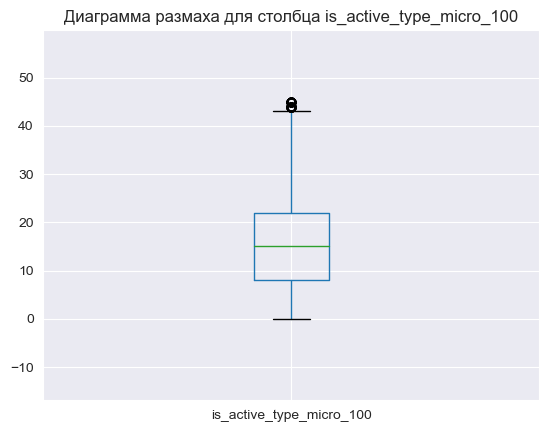


Количество выбросов: 253
Заменим строки, где есть выбросы на медиану 16.0 в столбце  is_active_type_micro_100 , значения 
 которых больше Q3 + 1.5*IQR (43.000) и меньше Q1 - 1.5*IQR (-13.000).


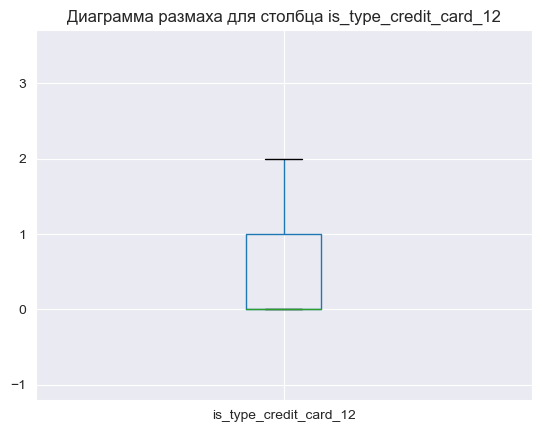


Количество выбросов: 545
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


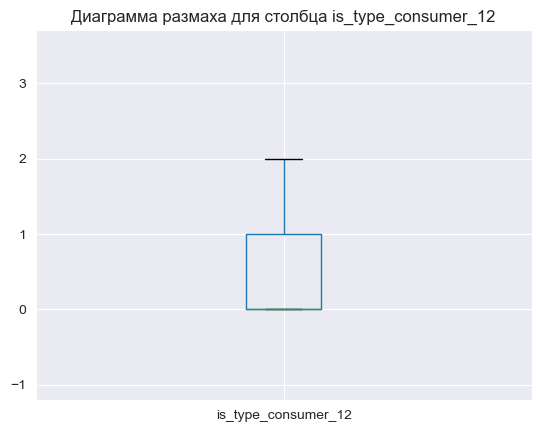


Количество выбросов: 926
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


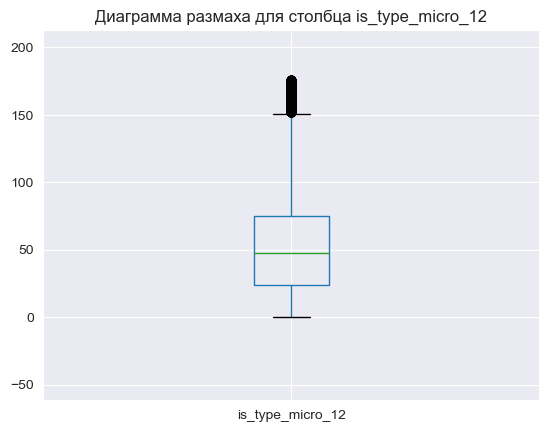


Количество выбросов: 550
Заменим строки, где есть выбросы на медиану 48.0 в столбце  is_type_micro_12 , значения 
 которых больше Q3 + 1.5*IQR (151.500) и меньше Q1 - 1.5*IQR (-52.500).


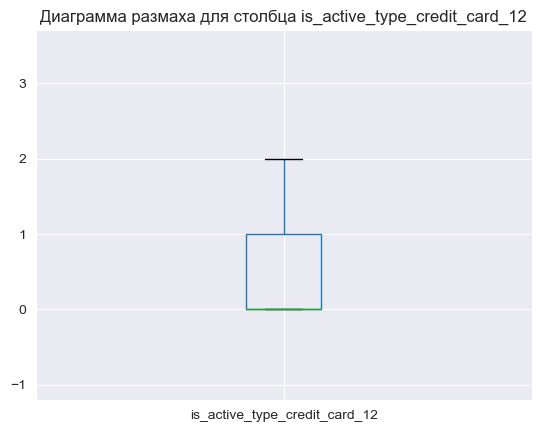


Количество выбросов: 464
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


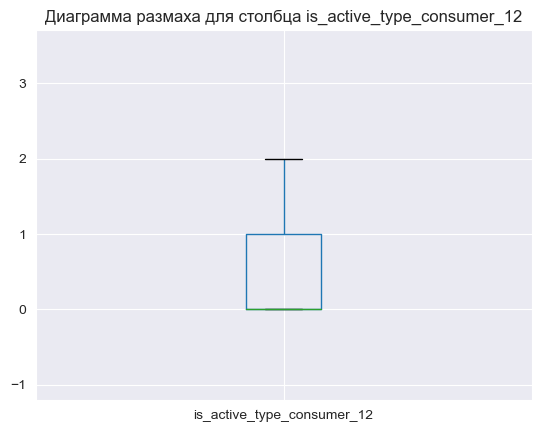


Количество выбросов: 297
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


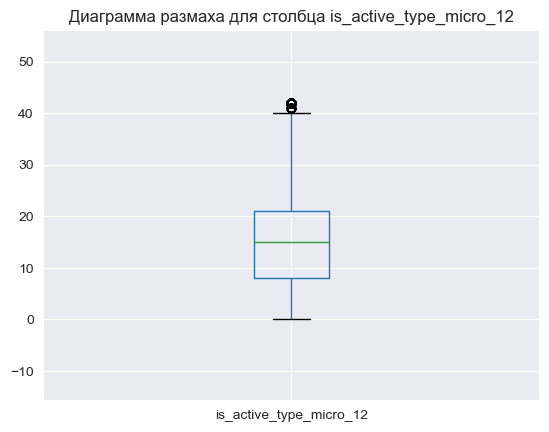


Количество выбросов: 275
Заменим строки, где есть выбросы на медиану 15.0 в столбце  is_active_type_micro_12 , значения 
 которых больше Q3 + 1.5*IQR (40.500) и меньше Q1 - 1.5*IQR (-11.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


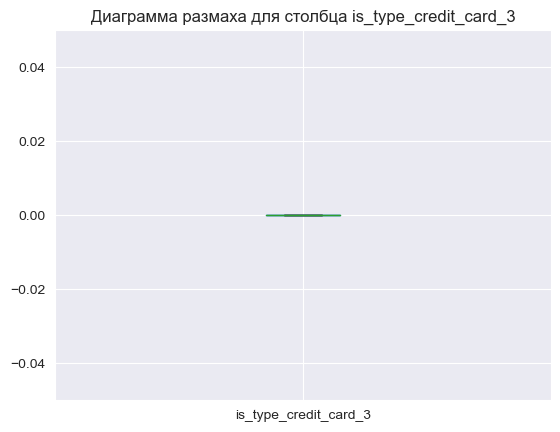


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


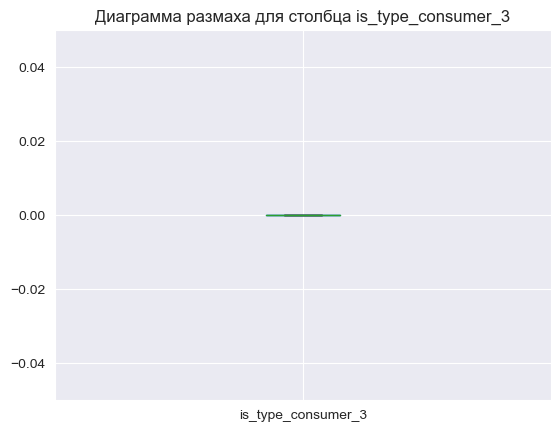


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


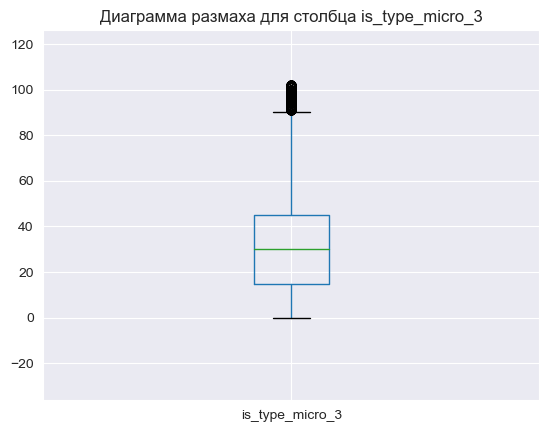


Количество выбросов: 425
Заменим строки, где есть выбросы на медиану 30.0 в столбце  is_type_micro_3 , значения 
 которых больше Q3 + 1.5*IQR (90.000) и меньше Q1 - 1.5*IQR (-30.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


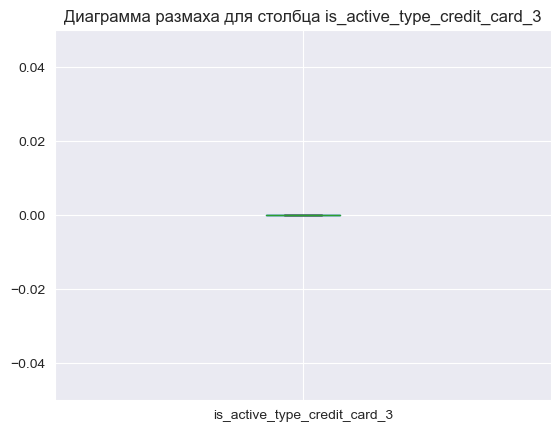


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


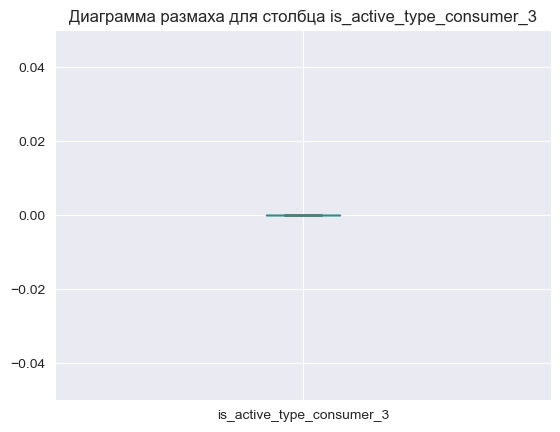


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


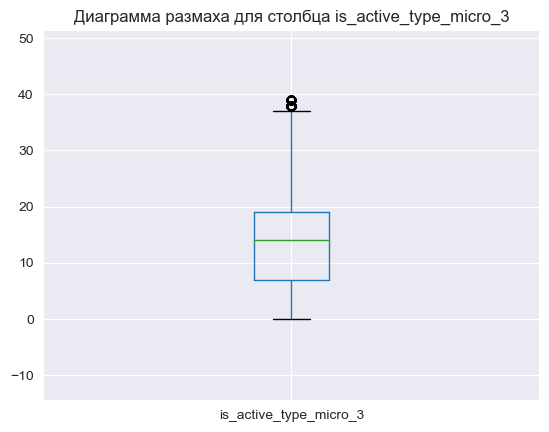


Количество выбросов: 278
Заменим строки, где есть выбросы на медиану 14.0 в столбце  is_active_type_micro_3 , значения 
 которых больше Q3 + 1.5*IQR (37.000) и меньше Q1 - 1.5*IQR (-11.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


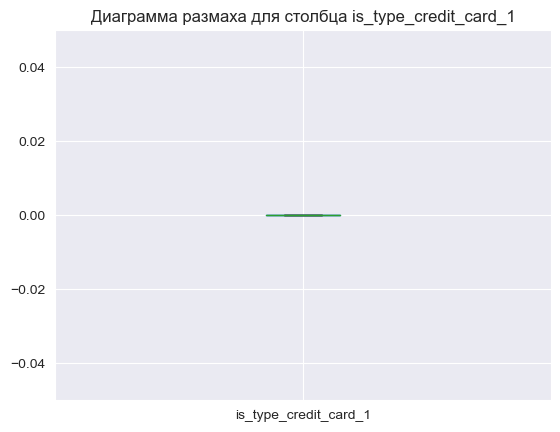


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


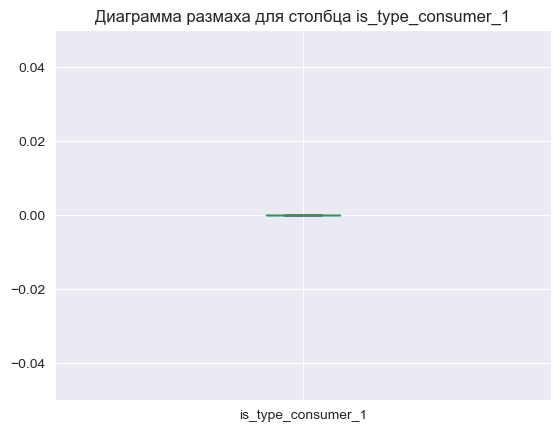


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


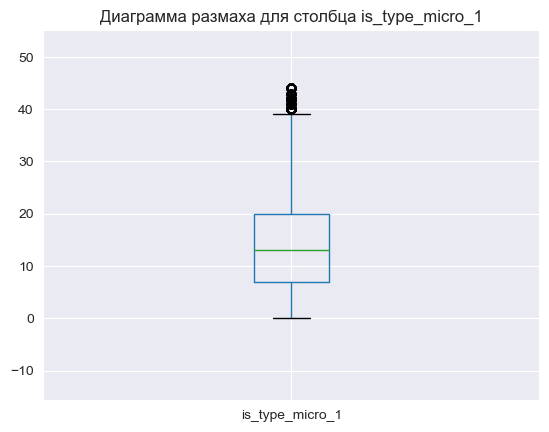


Количество выбросов: 467
Заменим строки, где есть выбросы на медиану 13.0 в столбце  is_type_micro_1 , значения 
 которых больше Q3 + 1.5*IQR (39.500) и меньше Q1 - 1.5*IQR (-12.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


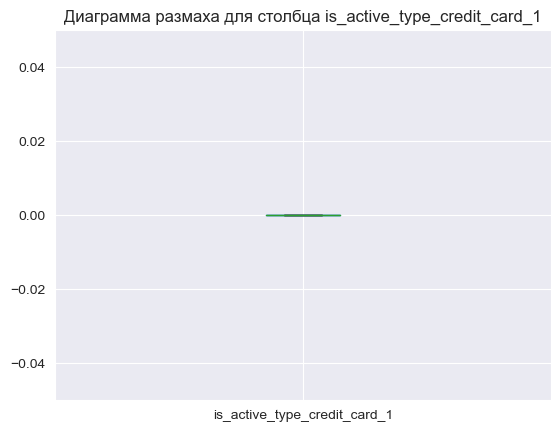


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


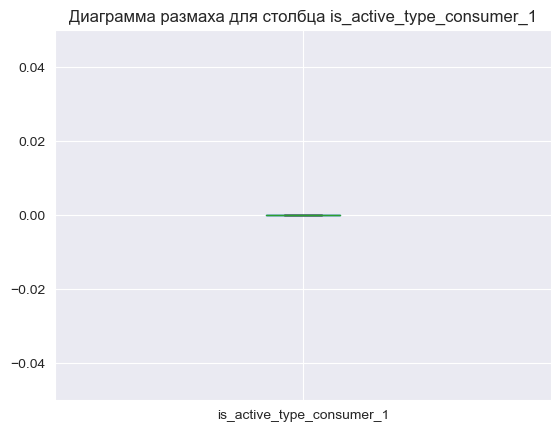


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


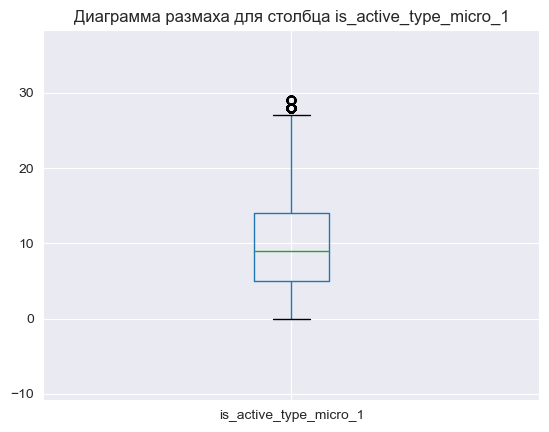


Количество выбросов: 275
Заменим строки, где есть выбросы на медиану 9.0 в столбце  is_active_type_micro_1 , значения 
 которых больше Q3 + 1.5*IQR (27.500) и меньше Q1 - 1.5*IQR (-8.500).


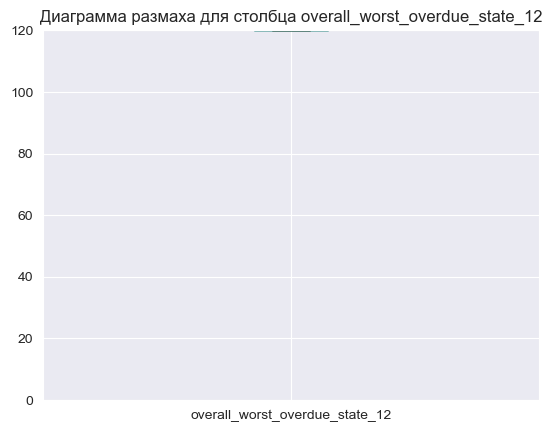


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 120.0 в столбце  overall_worst_overdue_state_12 , значения 
 которых больше Q3 + 1.5*IQR (120.000) и меньше Q1 - 1.5*IQR (120.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


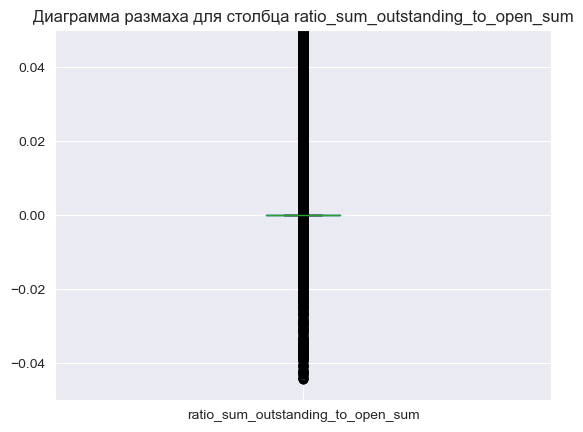


Количество выбросов: 6379
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_sum_outstanding_to_open_sum , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


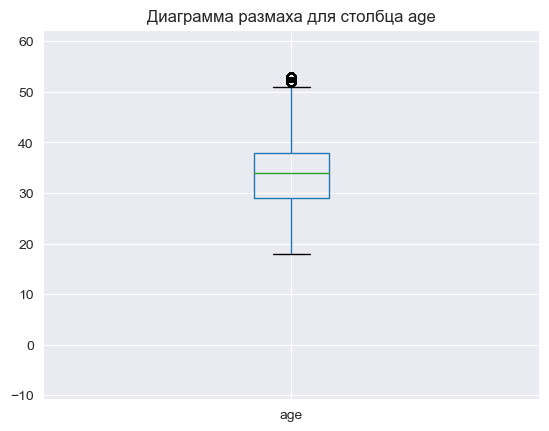


Количество выбросов: 326
Заменим строки, где есть выбросы на медиану 33.0 в столбце  age , значения 
 которых больше Q3 + 1.5*IQR (51.500) и меньше Q1 - 1.5*IQR (15.500).


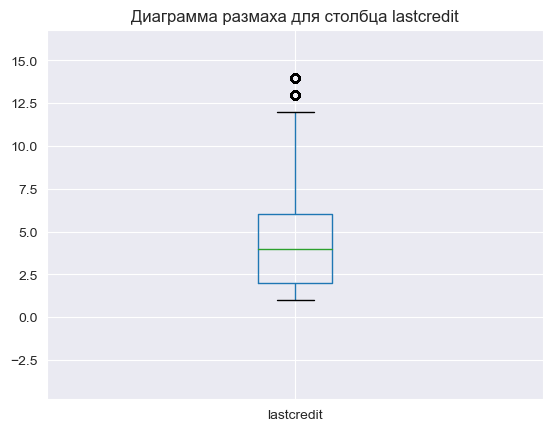


Количество выбросов: 706
Заменим строки, где есть выбросы на медиану 4.0 в столбце  lastcredit , значения 
 которых больше Q3 + 1.5*IQR (12.000) и меньше Q1 - 1.5*IQR (-4.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


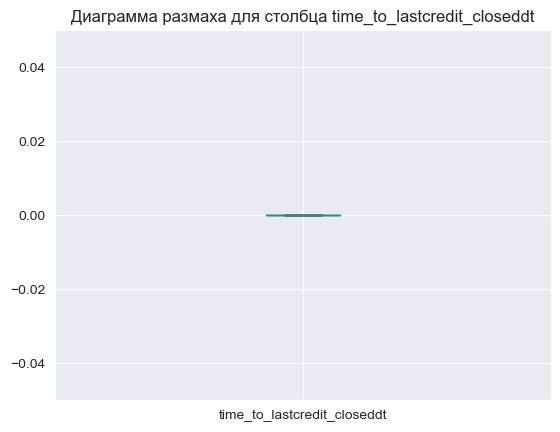


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  time_to_lastcredit_closeddt , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


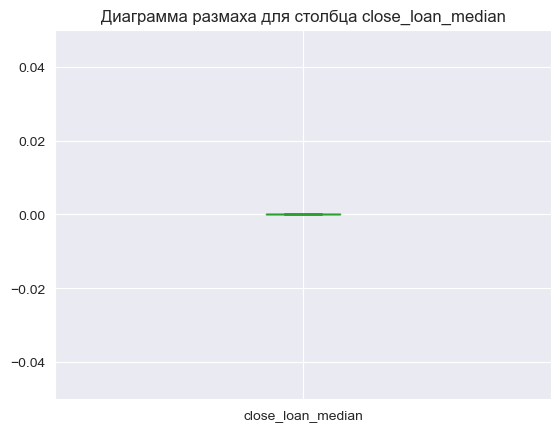


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  close_loan_median , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


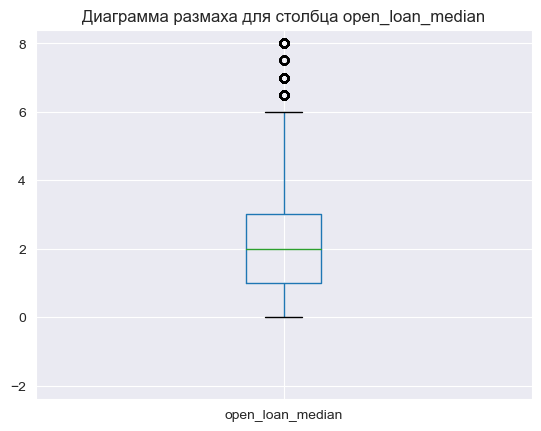


Количество выбросов: 1255
Заменим строки, где есть выбросы на медиану 2.0 в столбце  open_loan_median , значения 
 которых больше Q3 + 1.5*IQR (6.000) и меньше Q1 - 1.5*IQR (-2.000).


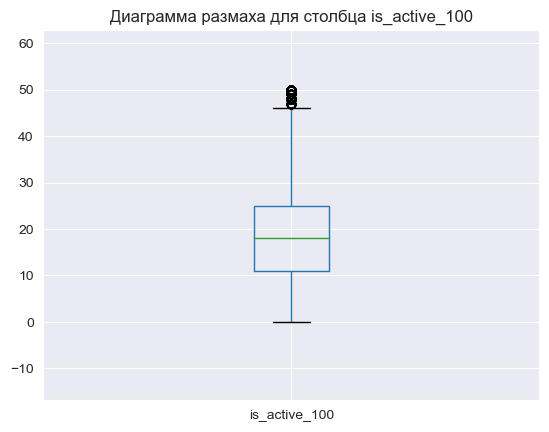


Количество выбросов: 319
Заменим строки, где есть выбросы на медиану 18.0 в столбце  is_active_100 , значения 
 которых больше Q3 + 1.5*IQR (46.000) и меньше Q1 - 1.5*IQR (-10.000).


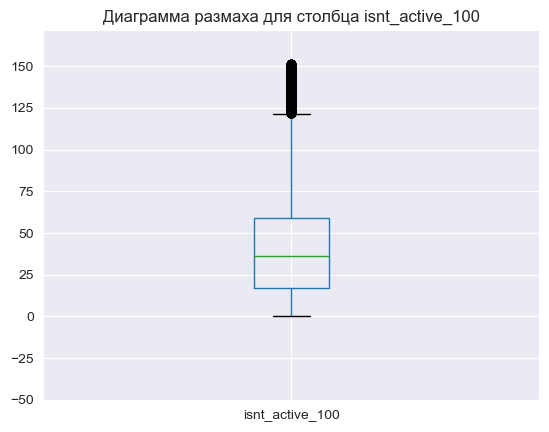


Количество выбросов: 670
Заменим строки, где есть выбросы на медиану 36.0 в столбце  isnt_active_100 , значения 
 которых больше Q3 + 1.5*IQR (121.375) и меньше Q1 - 1.5*IQR (-45.625).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


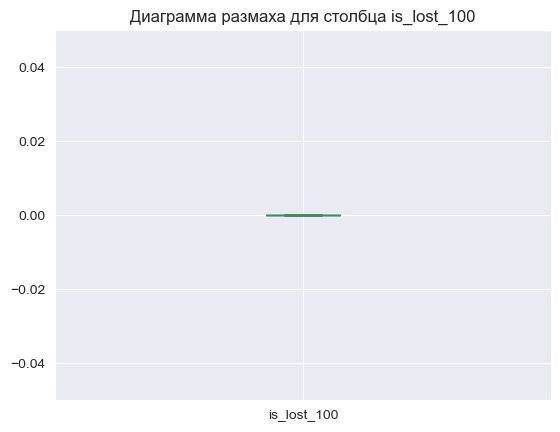


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_100 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


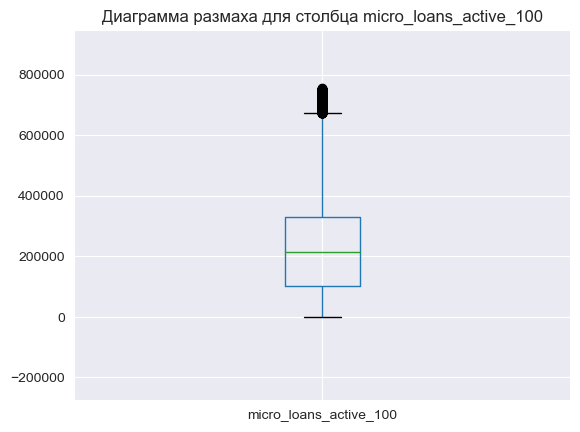


Количество выбросов: 412
Заменим строки, где есть выбросы на медиану 210760.0 в столбце  micro_loans_active_100 , значения 
 которых больше Q3 + 1.5*IQR (673004.375) и меньше Q1 - 1.5*IQR (-241322.625).


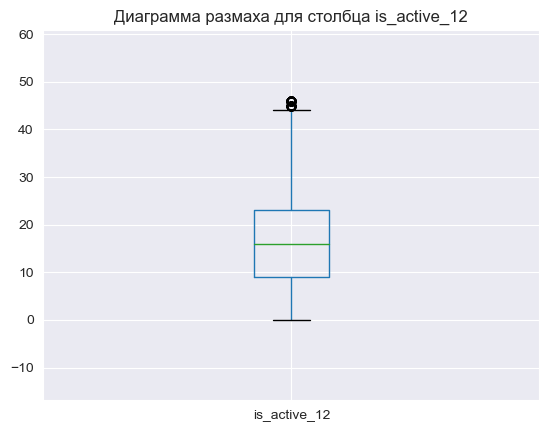


Количество выбросов: 259
Заменим строки, где есть выбросы на медиану 16.0 в столбце  is_active_12 , значения 
 которых больше Q3 + 1.5*IQR (44.000) и меньше Q1 - 1.5*IQR (-12.000).


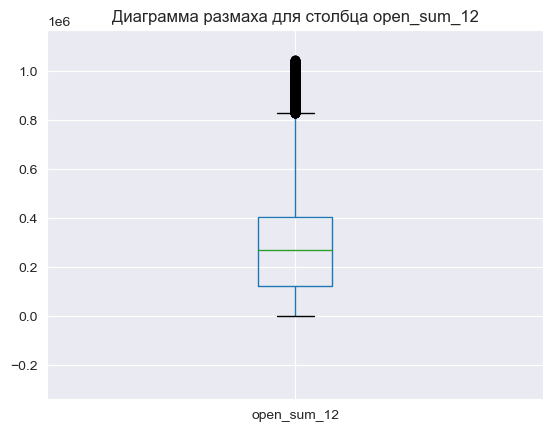


Количество выбросов: 703
Заменим строки, где есть выбросы на медиану 264607.5 в столбце  open_sum_12 , значения 
 которых больше Q3 + 1.5*IQR (829124.625) и меньше Q1 - 1.5*IQR (-302948.375).


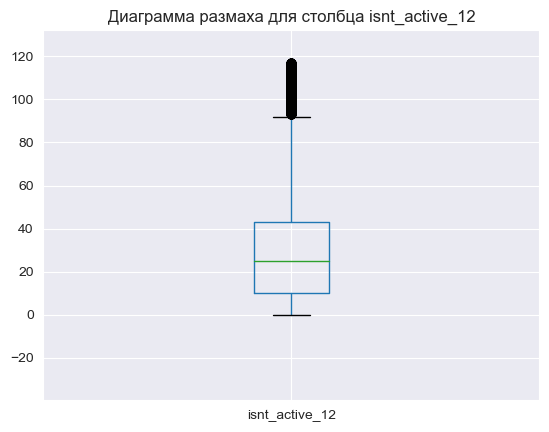


Количество выбросов: 649
Заменим строки, где есть выбросы на медиану 25.0 в столбце  isnt_active_12 , значения 
 которых больше Q3 + 1.5*IQR (92.500) и меньше Q1 - 1.5*IQR (-39.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


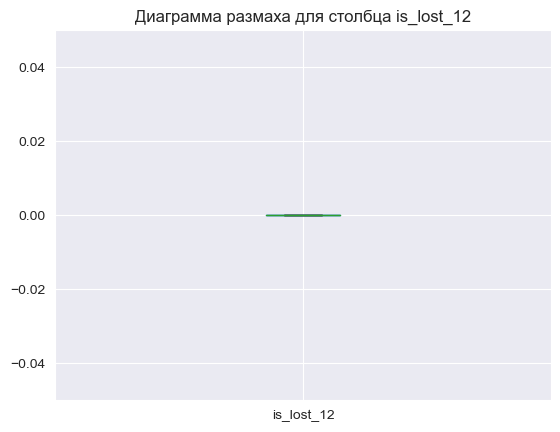


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_12 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


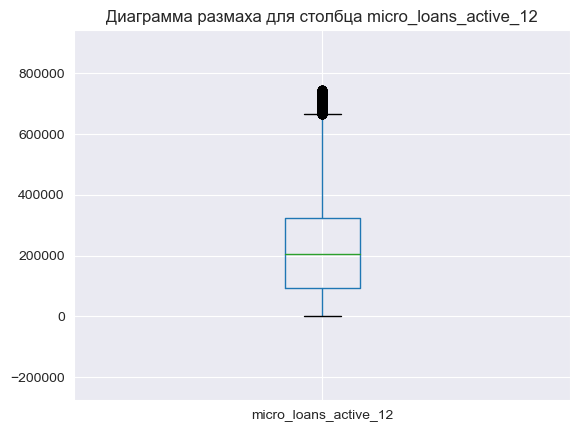


Количество выбросов: 398
Заменим строки, где есть выбросы на медиану 202700.0 в столбце  micro_loans_active_12 , значения 
 которых больше Q3 + 1.5*IQR (666711.875) и меньше Q1 - 1.5*IQR (-251865.125).


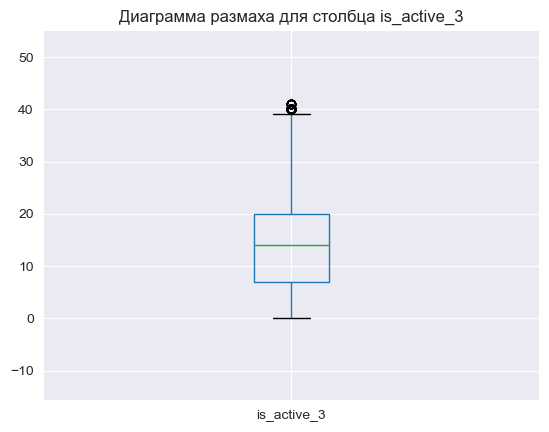


Количество выбросов: 228
Заменим строки, где есть выбросы на медиану 14.0 в столбце  is_active_3 , значения 
 которых больше Q3 + 1.5*IQR (39.500) и меньше Q1 - 1.5*IQR (-12.500).


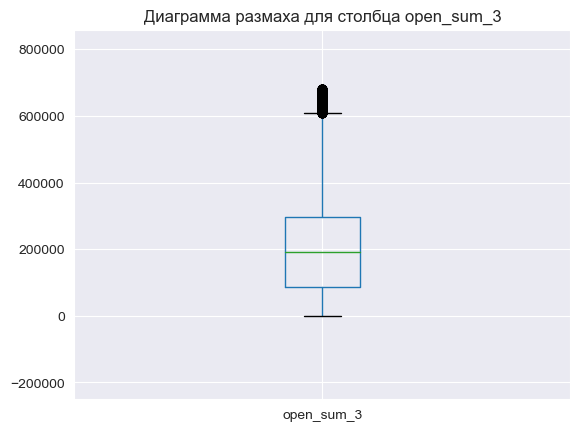


Количество выбросов: 390
Заменим строки, где есть выбросы на медиану 189730.0 в столбце  open_sum_3 , значения 
 которых больше Q3 + 1.5*IQR (608449.250) и меньше Q1 - 1.5*IQR (-226190.750).


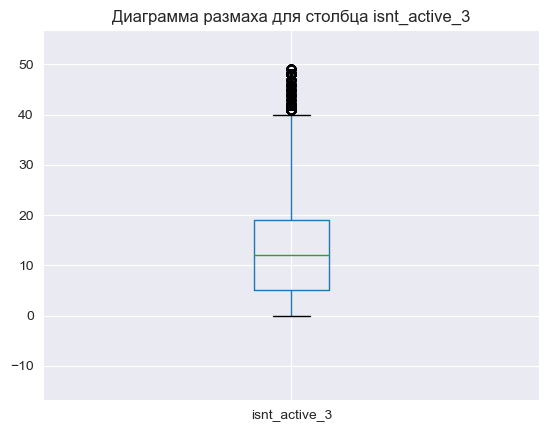


Количество выбросов: 674
Заменим строки, где есть выбросы на медиану 12.0 в столбце  isnt_active_3 , значения 
 которых больше Q3 + 1.5*IQR (40.000) и меньше Q1 - 1.5*IQR (-16.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


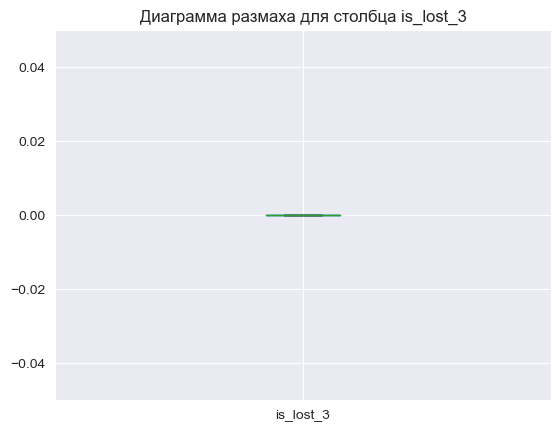


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


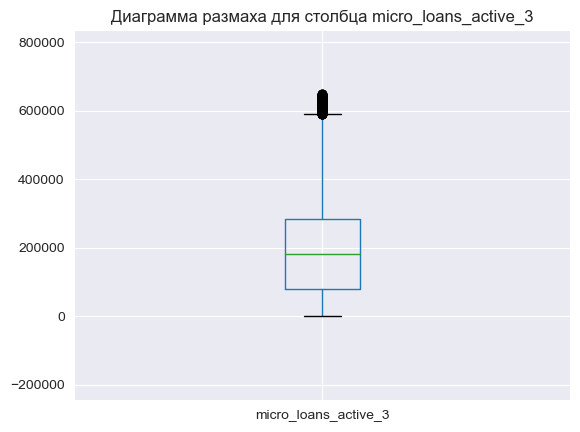


Количество выбросов: 332
Заменим строки, где есть выбросы на медиану 180028.0 в столбце  micro_loans_active_3 , значения 
 которых больше Q3 + 1.5*IQR (589636.625) и меньше Q1 - 1.5*IQR (-225516.375).


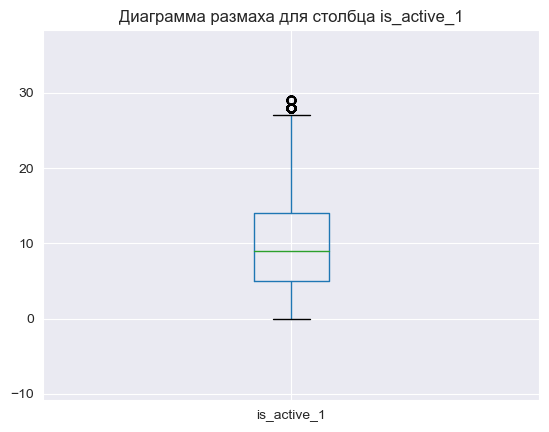


Количество выбросов: 277
Заменим строки, где есть выбросы на медиану 9.0 в столбце  is_active_1 , значения 
 которых больше Q3 + 1.5*IQR (27.500) и меньше Q1 - 1.5*IQR (-8.500).


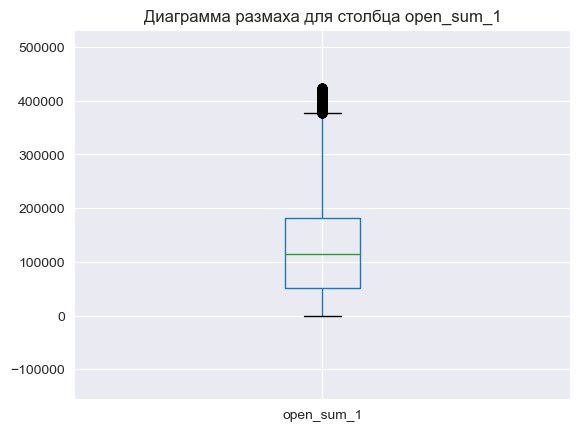


Количество выбросов: 384
Заменим строки, где есть выбросы на медиану 110702.5 в столбце  open_sum_1 , значения 
 которых больше Q3 + 1.5*IQR (376173.125) и меньше Q1 - 1.5*IQR (-143303.875).


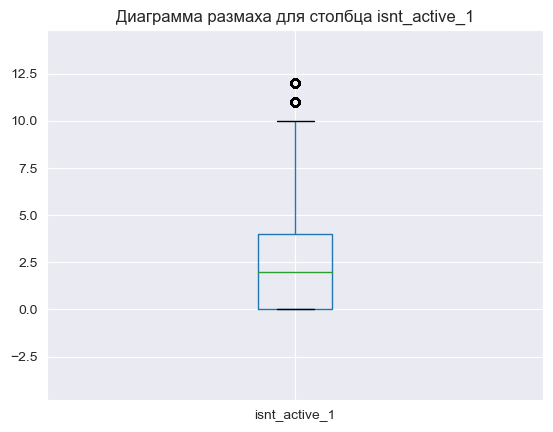


Количество выбросов: 553
Заменим строки, где есть выбросы на медиану 2.0 в столбце  isnt_active_1 , значения 
 которых больше Q3 + 1.5*IQR (10.000) и меньше Q1 - 1.5*IQR (-6.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


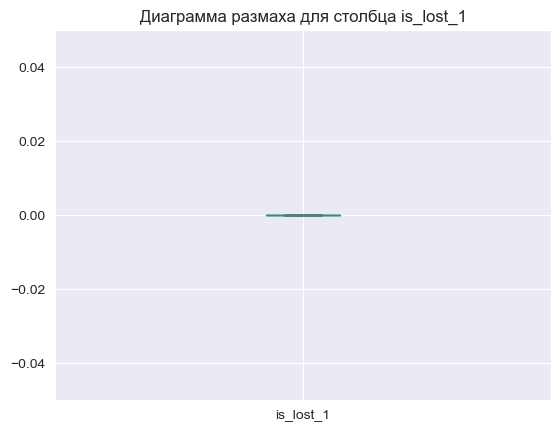


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_lost_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


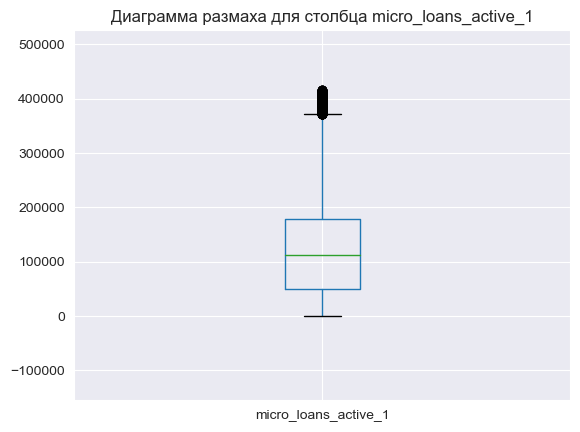


Количество выбросов: 371
Заменим строки, где есть выбросы на медиану 108350.0 в столбце  micro_loans_active_1 , значения 
 которых больше Q3 + 1.5*IQR (371375.000) и меньше Q1 - 1.5*IQR (-142825.000).


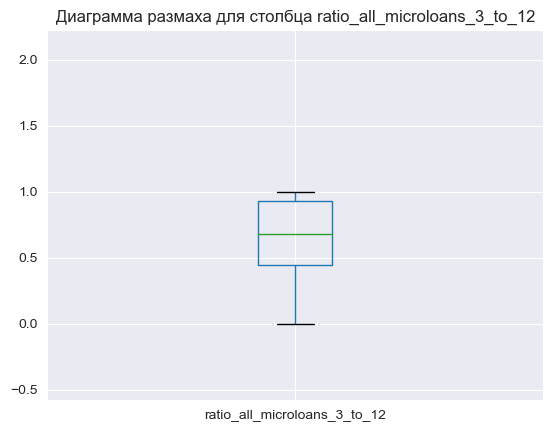


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.6842105263157895 в столбце  ratio_all_microloans_3_to_12 , значения 
 которых больше Q3 + 1.5*IQR (1.647) и меньше Q1 - 1.5*IQR (-0.274).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


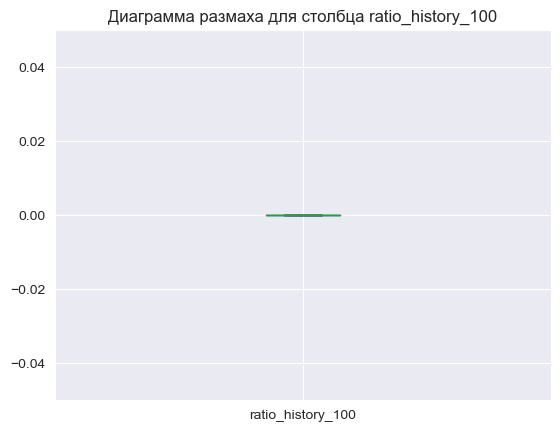


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_100 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


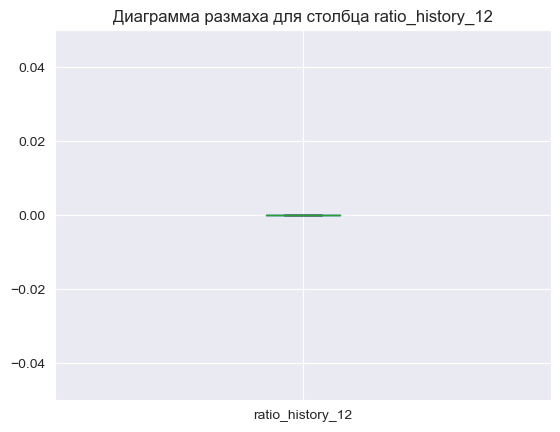


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_12 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


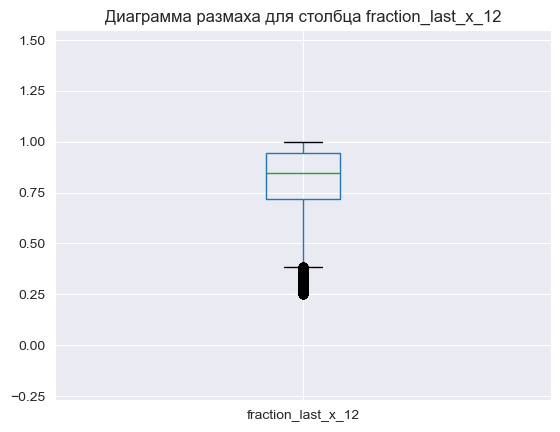


Количество выбросов: 607
Заменим строки, где есть выбросы на медиану 0.8470962907455977 в столбце  fraction_last_x_12 , значения 
 которых больше Q3 + 1.5*IQR (1.279) и меньше Q1 - 1.5*IQR (0.385).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


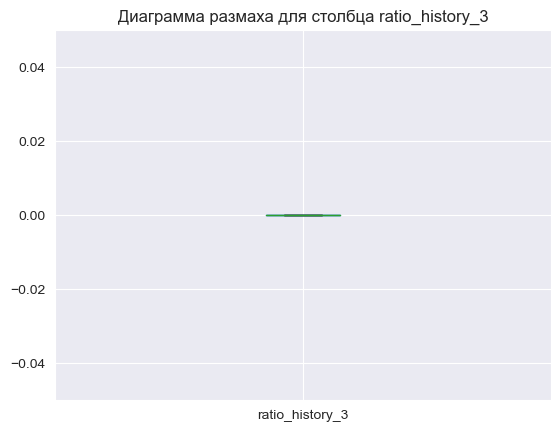


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


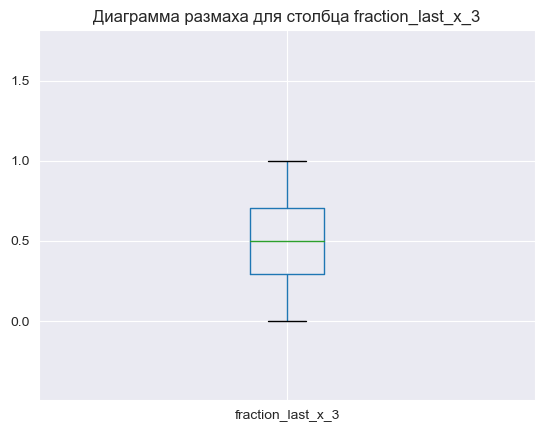


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.5 в столбце  fraction_last_x_3 , значения 
 которых больше Q3 + 1.5*IQR (1.321) и меньше Q1 - 1.5*IQR (-0.319).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


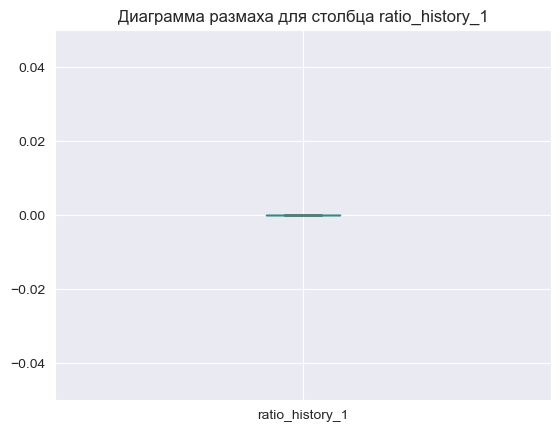


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_history_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


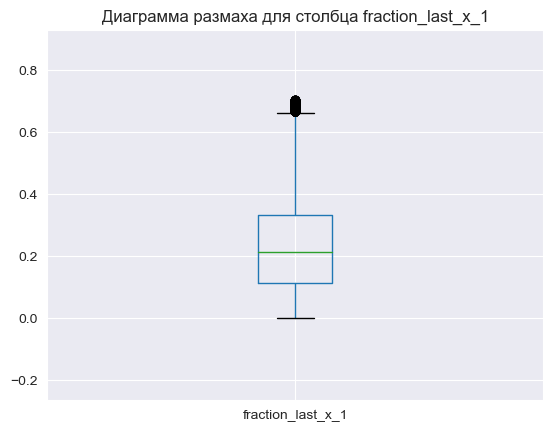


Количество выбросов: 226
Заменим строки, где есть выбросы на медиану 0.2153846153846154 в столбце  fraction_last_x_1 , значения 
 которых больше Q3 + 1.5*IQR (0.664) и меньше Q1 - 1.5*IQR (-0.218).


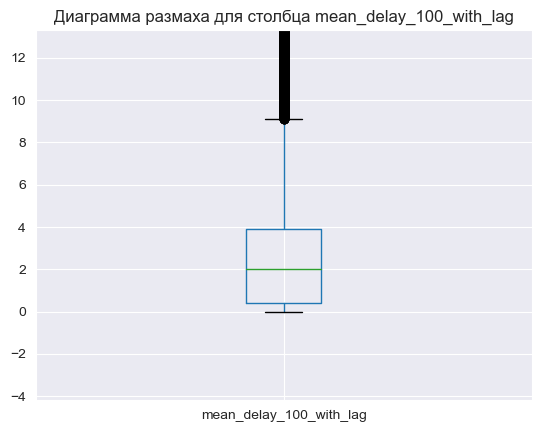


Количество выбросов: 1268
Заменим строки, где есть выбросы на медиану 2.133893419572554 в столбце  mean_delay_100_with_lag , значения 
 которых больше Q3 + 1.5*IQR (9.123) и меньше Q1 - 1.5*IQR (-4.804).


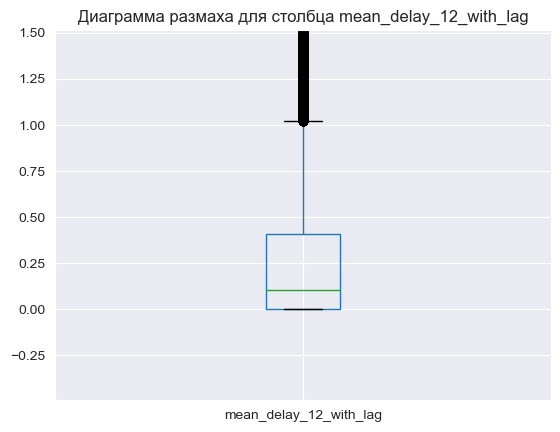


Количество выбросов: 1616
Заменим строки, где есть выбросы на медиану 0.106060606060606 в столбце  mean_delay_12_with_lag , значения 
 которых больше Q3 + 1.5*IQR (1.023) и меньше Q1 - 1.5*IQR (-0.614).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


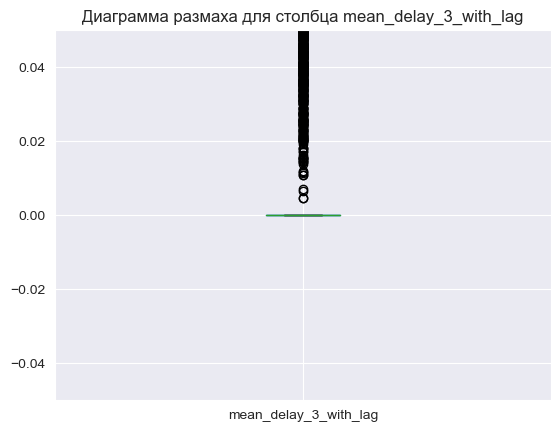


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  mean_delay_3_with_lag , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


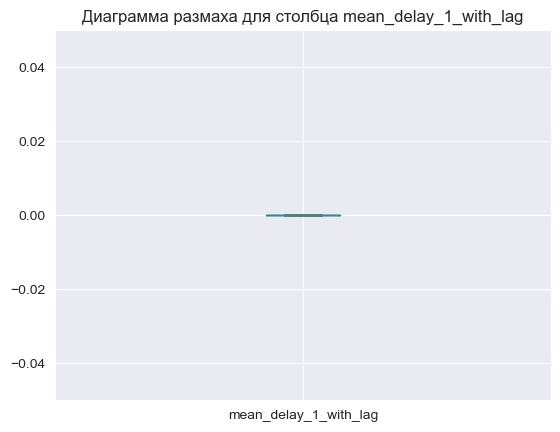


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  mean_delay_1_with_lag , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


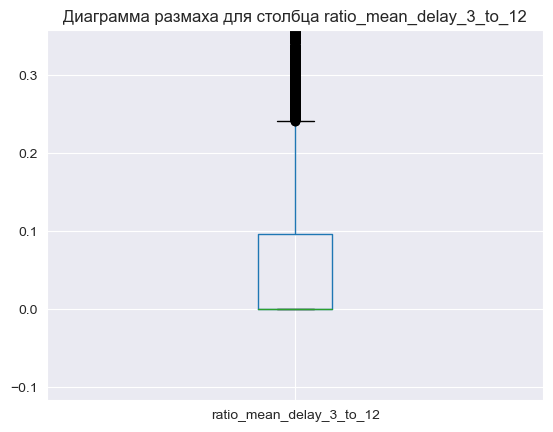


Количество выбросов: 1734
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_mean_delay_3_to_12 , значения 
 которых больше Q3 + 1.5*IQR (0.242) и меньше Q1 - 1.5*IQR (-0.145).


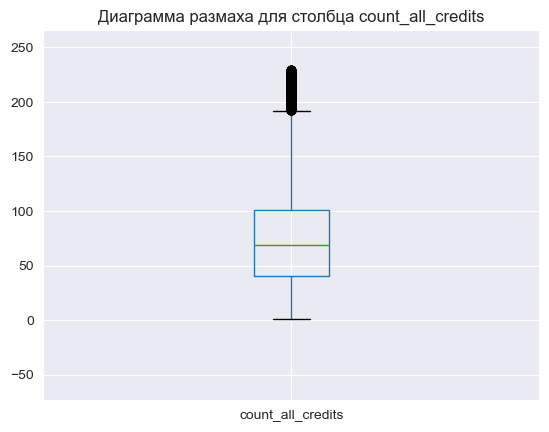


Количество выбросов: 575
Заменим строки, где есть выбросы на медиану 69.0 в столбце  count_all_credits , значения 
 которых больше Q3 + 1.5*IQR (192.500) и меньше Q1 - 1.5*IQR (-51.500).


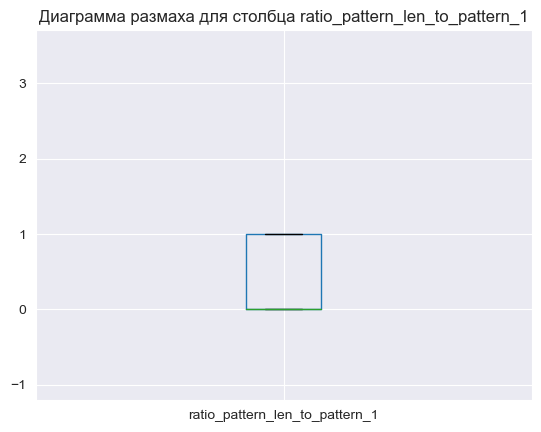


Количество выбросов: 0
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_1 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


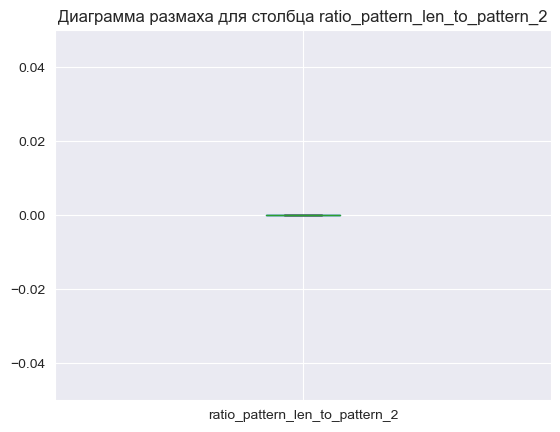


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_2 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


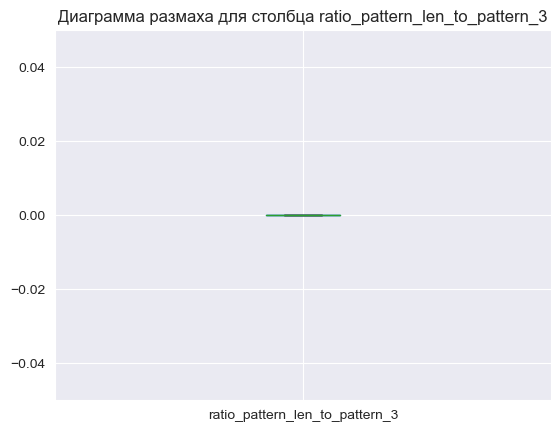


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


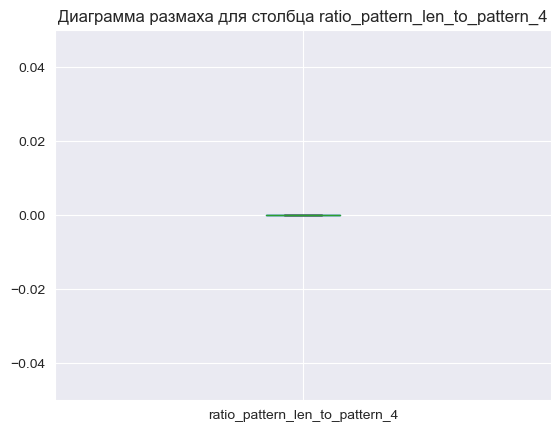


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_4 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


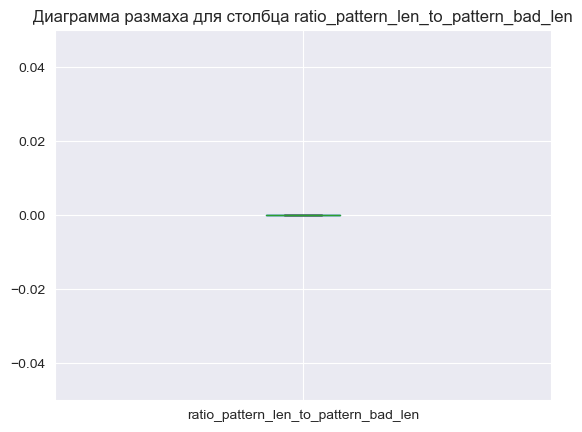


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_pattern_len_to_pattern_bad_len , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


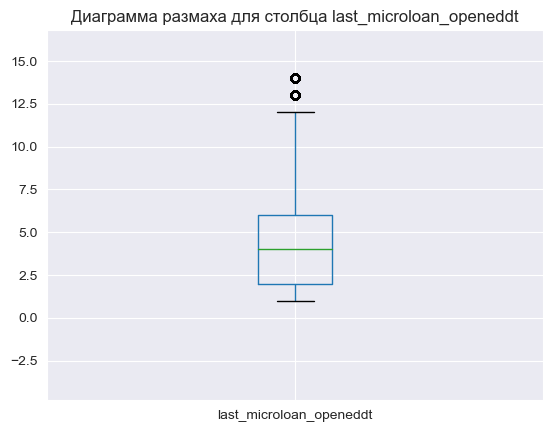


Количество выбросов: 716
Заменим строки, где есть выбросы на медиану 4.0 в столбце  last_microloan_openeddt , значения 
 которых больше Q3 + 1.5*IQR (12.000) и меньше Q1 - 1.5*IQR (-4.000).


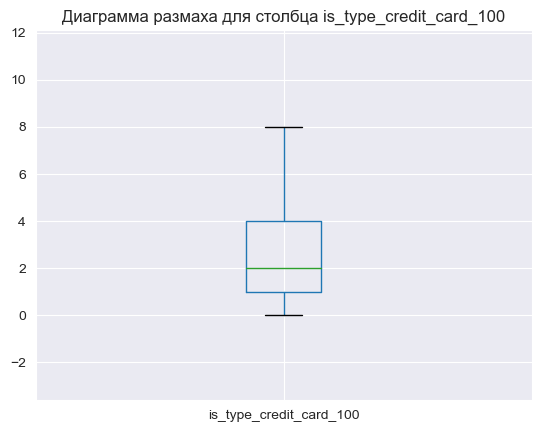


Количество выбросов: 372
Заменим строки, где есть выбросы на медиану 2.0 в столбце  is_type_credit_card_100 , значения 
 которых больше Q3 + 1.5*IQR (8.500) и меньше Q1 - 1.5*IQR (-3.500).


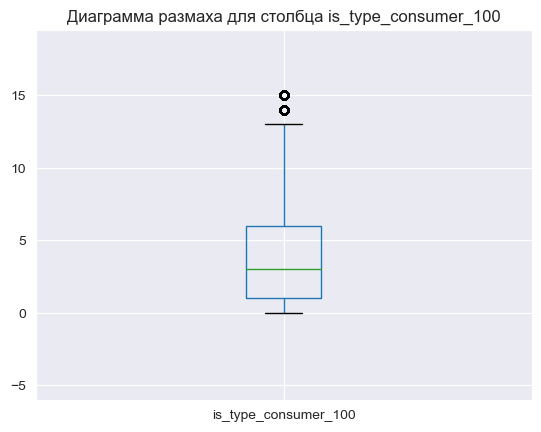


Количество выбросов: 540
Заменим строки, где есть выбросы на медиану 3.0 в столбце  is_type_consumer_100 , значения 
 которых больше Q3 + 1.5*IQR (13.500) и меньше Q1 - 1.5*IQR (-6.500).


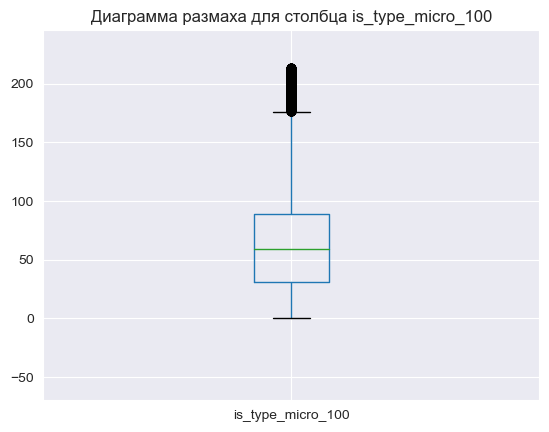


Количество выбросов: 582
Заменим строки, где есть выбросы на медиану 58.0 в столбце  is_type_micro_100 , значения 
 которых больше Q3 + 1.5*IQR (176.000) и меньше Q1 - 1.5*IQR (-56.000).


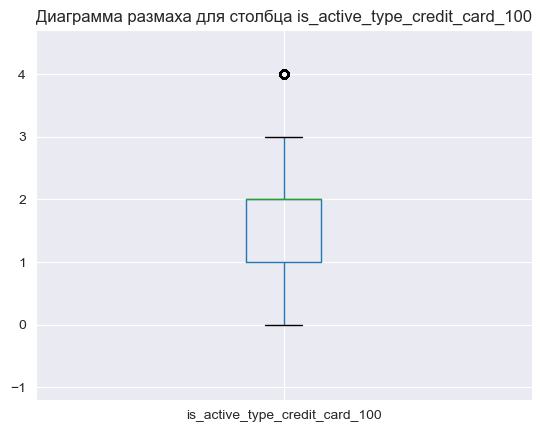


Количество выбросов: 1133
Заменим строки, где есть выбросы на медиану 1.0 в столбце  is_active_type_credit_card_100 , значения 
 которых больше Q3 + 1.5*IQR (3.500) и меньше Q1 - 1.5*IQR (-0.500).


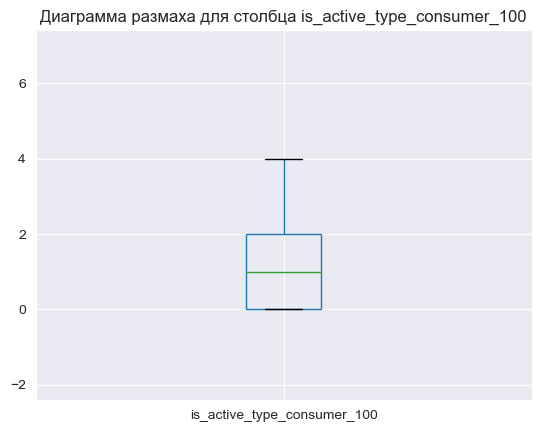


Количество выбросов: 243
Заменим строки, где есть выбросы на медиану 1.0 в столбце  is_active_type_consumer_100 , значения 
 которых больше Q3 + 1.5*IQR (5.000) и меньше Q1 - 1.5*IQR (-3.000).


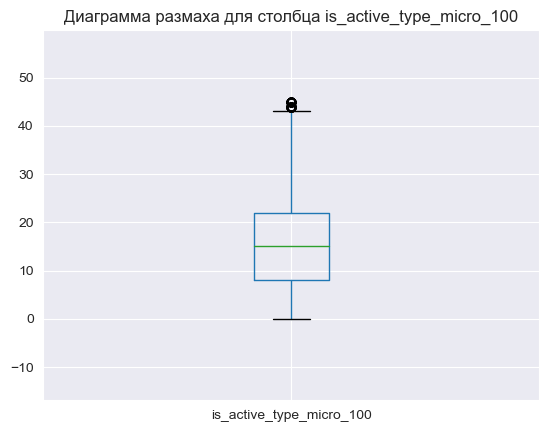


Количество выбросов: 232
Заменим строки, где есть выбросы на медиану 15.0 в столбце  is_active_type_micro_100 , значения 
 которых больше Q3 + 1.5*IQR (43.000) и меньше Q1 - 1.5*IQR (-13.000).


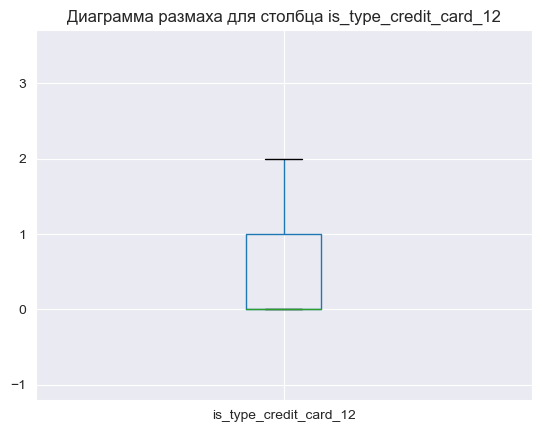


Количество выбросов: 527
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


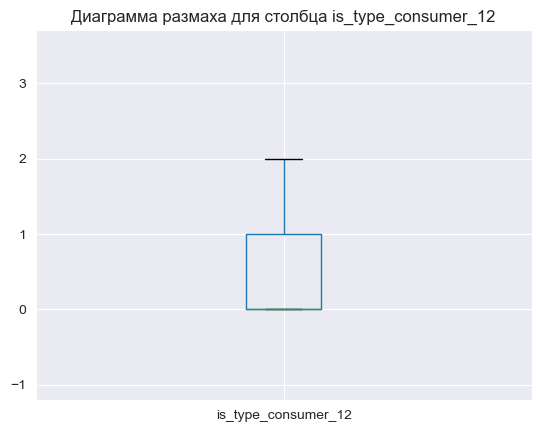


Количество выбросов: 861
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


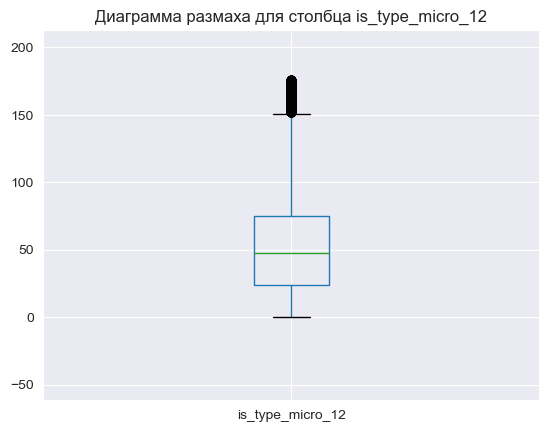


Количество выбросов: 539
Заменим строки, где есть выбросы на медиану 48.0 в столбце  is_type_micro_12 , значения 
 которых больше Q3 + 1.5*IQR (151.500) и меньше Q1 - 1.5*IQR (-52.500).


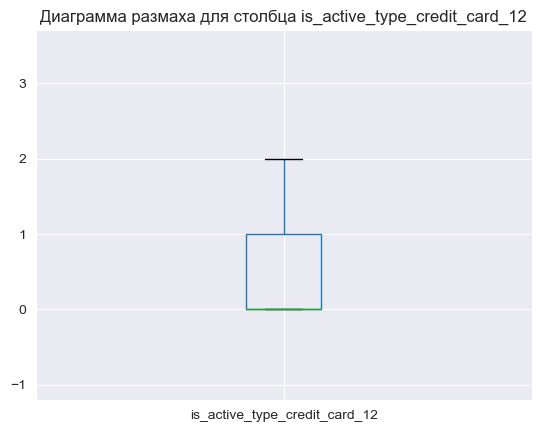


Количество выбросов: 448
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


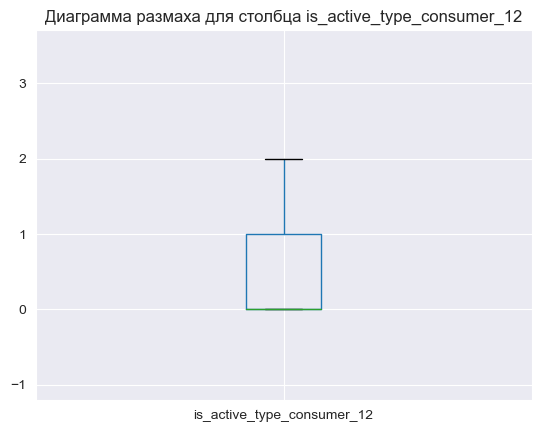


Количество выбросов: 300
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_12 , значения 
 которых больше Q3 + 1.5*IQR (2.500) и меньше Q1 - 1.5*IQR (-1.500).


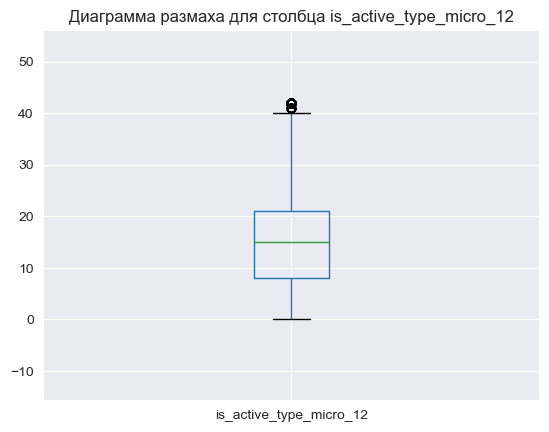


Количество выбросов: 269
Заменим строки, где есть выбросы на медиану 15.0 в столбце  is_active_type_micro_12 , значения 
 которых больше Q3 + 1.5*IQR (40.500) и меньше Q1 - 1.5*IQR (-11.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


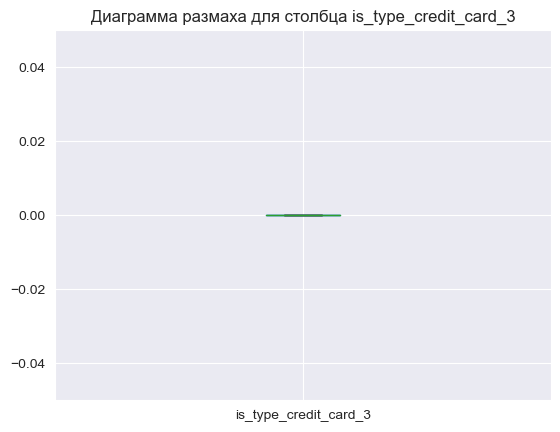


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


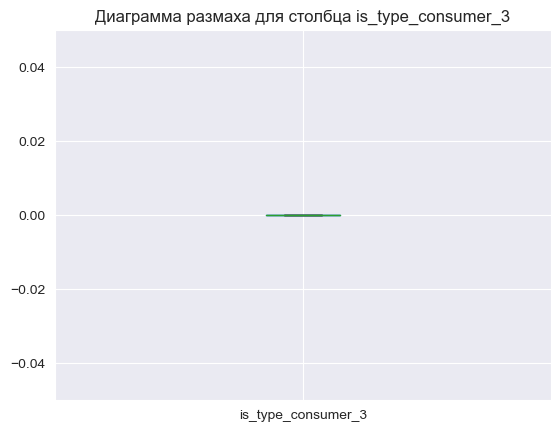


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


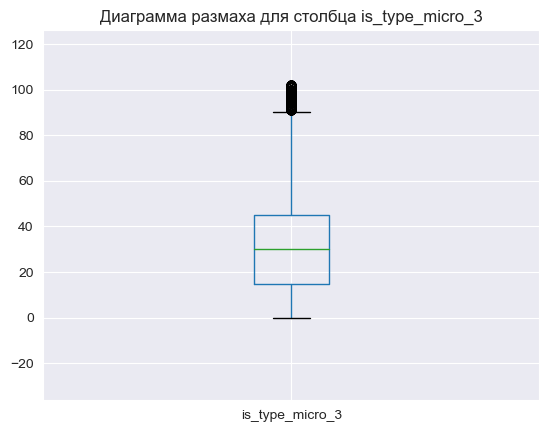


Количество выбросов: 425
Заменим строки, где есть выбросы на медиану 30.0 в столбце  is_type_micro_3 , значения 
 которых больше Q3 + 1.5*IQR (90.000) и меньше Q1 - 1.5*IQR (-30.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


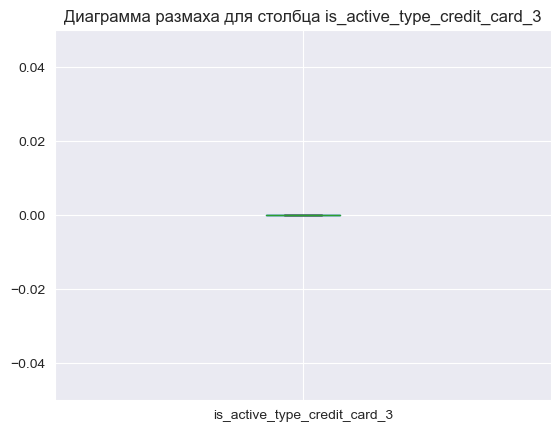


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


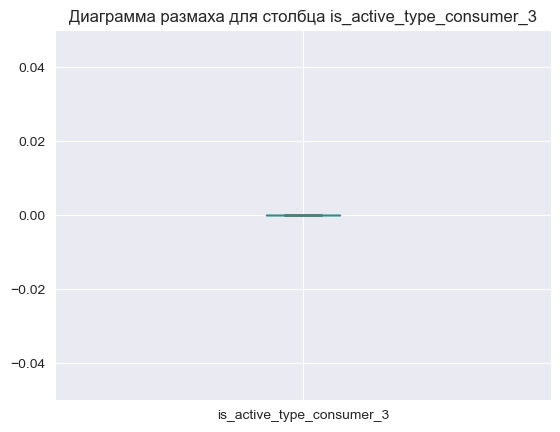


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_3 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


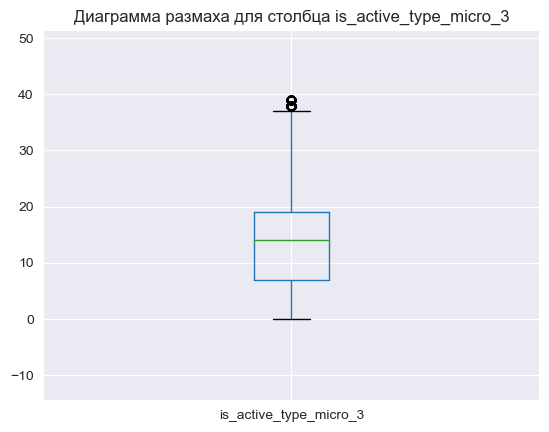


Количество выбросов: 266
Заменим строки, где есть выбросы на медиану 14.0 в столбце  is_active_type_micro_3 , значения 
 которых больше Q3 + 1.5*IQR (37.000) и меньше Q1 - 1.5*IQR (-11.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


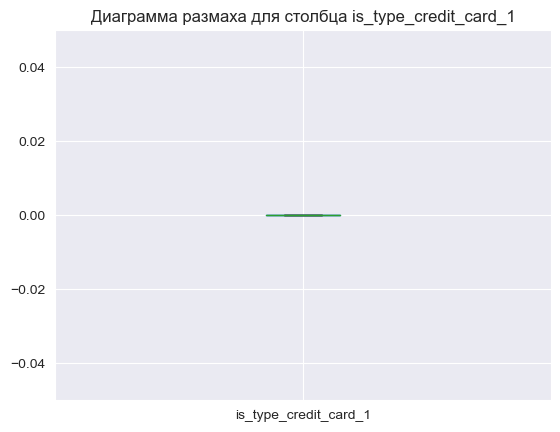


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_credit_card_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


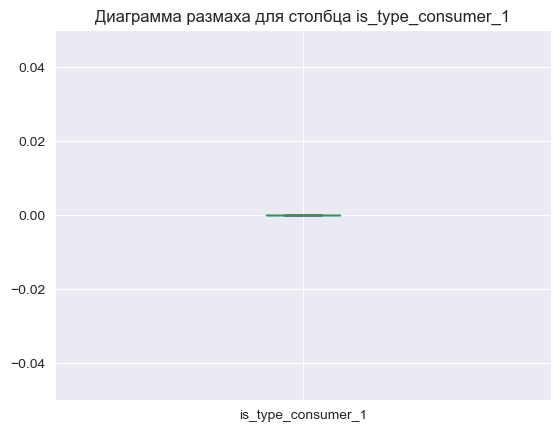


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_type_consumer_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


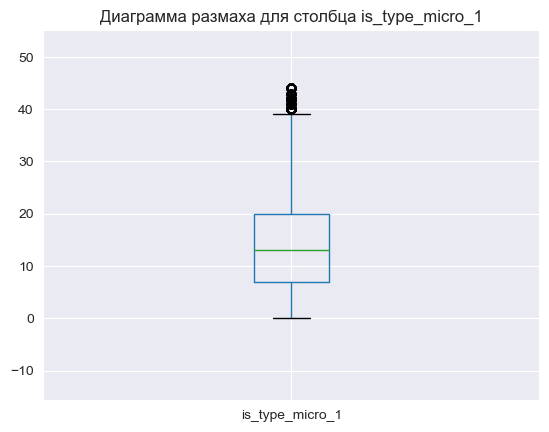


Количество выбросов: 454
Заменим строки, где есть выбросы на медиану 13.0 в столбце  is_type_micro_1 , значения 
 которых больше Q3 + 1.5*IQR (39.500) и меньше Q1 - 1.5*IQR (-12.500).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


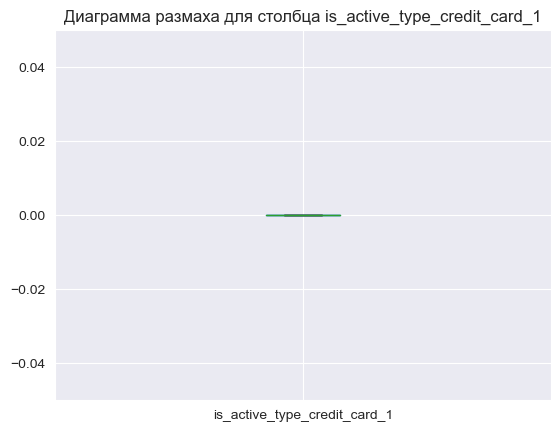


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_credit_card_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


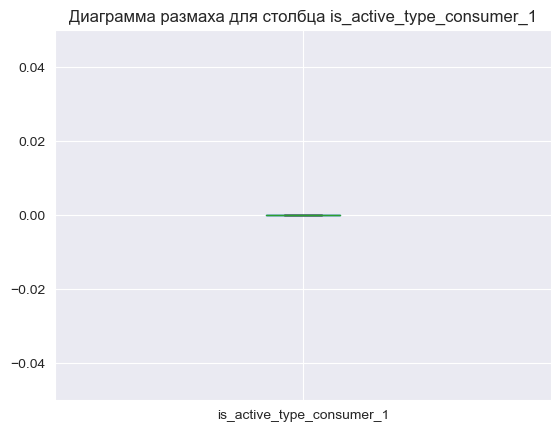


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  is_active_type_consumer_1 , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


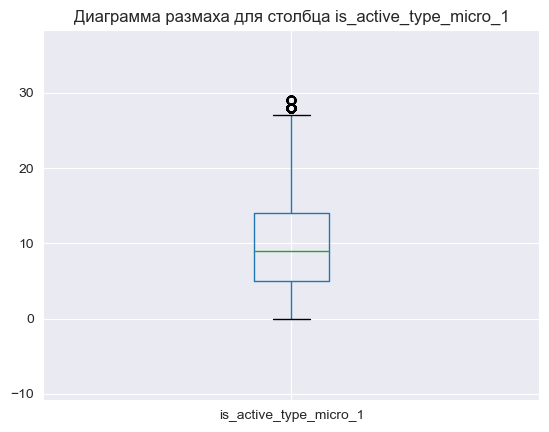


Количество выбросов: 266
Заменим строки, где есть выбросы на медиану 9.0 в столбце  is_active_type_micro_1 , значения 
 которых больше Q3 + 1.5*IQR (27.500) и меньше Q1 - 1.5*IQR (-8.500).


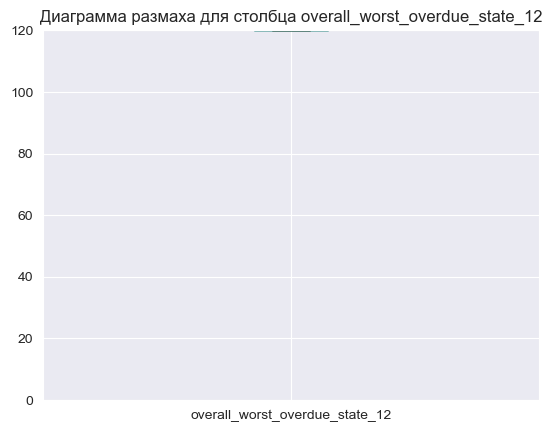


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 120.0 в столбце  overall_worst_overdue_state_12 , значения 
 которых больше Q3 + 1.5*IQR (120.000) и меньше Q1 - 1.5*IQR (120.000).


C:\Users\m2004481\AppData\Local\Temp\ipykernel_10252\3436656927.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(-0.8*border, q3 + border + 0.8*border)


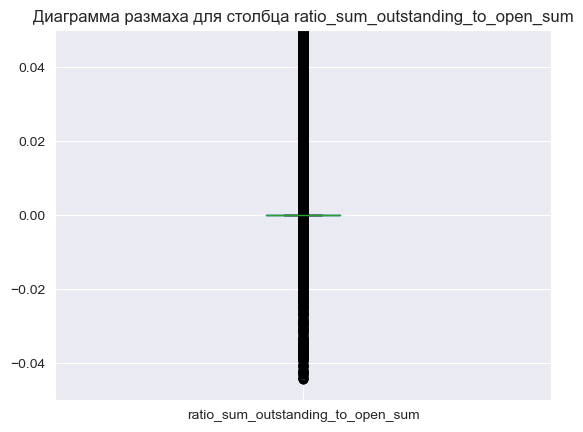


Количество выбросов: 6380
Заменим строки, где есть выбросы на медиану 0.0 в столбце  ratio_sum_outstanding_to_open_sum , значения 
 которых больше Q3 + 1.5*IQR (0.000) и меньше Q1 - 1.5*IQR (0.000).


In [47]:
#убираем выбросы
train = outliners_control(train, train, col_list)
valid = outliners_control(valid, train, col_list)
test = outliners_control(test, train, col_list)


### Пример работы с выбросами

In [48]:
"""
info = train['age'].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)
q1 = info[4]
q3 = info[6]
iqr = q3 - q1   # считаем межквартильный размах
border = iqr*1.5
median = train['age'].median()
plt.title("До обработки")
plt.ylim(-0.8*border, q3 + border + 0.8*border)
train.boxplot(column = 'age')  # строим диаграмму размаха
plt.show()

#замена выбросов на медиану
train.loc[(train['age'] <= (q1 - border))
                                        | (train['age'] >= (q3 + border)), 'age']= median

info = train['age'].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)
q1 = info[4]
q3 = info[6]
iqr = q3 - q1   # считаем межквартильный размах
border = iqr*1.5
median = train['age'].median()
plt.title("После обработки")
plt.ylim(-0.8*border, q3 + border + 0.8*border)
train.boxplot(column = 'age')  # строим диаграмму размаха
plt.show()
"""

'\ninfo = train[\'age\'].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)\nq1 = info[4]\nq3 = info[6]\niqr = q3 - q1   # считаем межквартильный размах\nborder = iqr*1.5\nmedian = train[\'age\'].median()\nplt.title("До обработки")\nplt.ylim(-0.8*border, q3 + border + 0.8*border)\ntrain.boxplot(column = \'age\')  # строим диаграмму размаха\nplt.show()\n\n#замена выбросов на медиану\ntrain.loc[(train[\'age\'] <= (q1 - border))\n                                        | (train[\'age\'] >= (q3 + border)), \'age\']= median\n\ninfo = train[\'age\'].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)\nq1 = info[4]\nq3 = info[6]\niqr = q3 - q1   # считаем межквартильный размах\nborder = iqr*1.5\nmedian = train[\'age\'].median()\nplt.title("После обработки")\nplt.ylim(-0.8*border, q3 + border + 0.8*border)\ntrain.boxplot(column = \'age\')  # строим диаграмму размаха\nplt.show()\n'

In [50]:
"""
#basic_data_frame - датафрейм, на который нужно опираться для расчета границ, отделяющих допустимые значения от выбростов
#basic_column - cтолбцы , по выбросы в которых будут анализироваться


def graph_creator(data_frame, basic_data_frame, basic_columns):
    for column in basic_columns:
        #print('Диаграмма размаха для столбца {}'.format(column))
        info = basic_data_frame[column].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)
        q1 = info[4]
        q3 = info[6]
        iqr = q3 - q1   # считаем межквартильный размах
        border = iqr*1.5   # cчитаем расстояние от Q1 и Q3 до границы, за которой расположены выбросы
        #plt.ylim(-0.8*border, q3 + border + 0.8*border)
        #basic_data_frame.boxplot(column = column)  # строим диаграмму размаха
        #plt.show()
        #print('')
        #print('Избавляемся от строк, где есть выбросы в столбце  {} , значения \n которых больше Q3 + 1.5*IQR ({:.3f}) и меньше Q1 - 1.5*IQR ({:.3f}).'.format(column, q3 + border,q1 - border))


        data_frame[column] = data_frame.loc[ (data_frame[column] >= (q1 - border))
                                           & (data_frame[column] <= (q3 + border)), column]

        #print('')
    #print('теперь в датафреме столько пропусков: {}'.format(data_frame.isna().sum()))
    improved_data_frame = data_frame.dropna(axis = 0)   # удалим все строки, где функция удалила выбросные суммы
    improved_data_frame.reset_index(drop=True, inplace = True)
    #print('')
    #print('пропуски удалены')
    #print('теперь пропусков: ')
    #print( improved_data_frame.isna().sum())

# ниже разкоменчивать не нужно
    #print('Диаграммы размаха для сумм исправленного датасета')
    #for i in basic_columns:
        #improved_data_frame[i].plot(kind = 'box', ylim = (0,100), figsize = (10,10))
    return improved_data_frame
"""

"\n#basic_data_frame - датафрейм, на который нужно опираться для расчета границ, отделяющих допустимые значения от выбростов\n#basic_column - cтолбцы , по выбросы в которых будут анализироваться\n\n\ndef graph_creator(data_frame, basic_data_frame, basic_columns):\n    for column in basic_columns:\n        #print('Диаграмма размаха для столбца {}'.format(column))\n        info = basic_data_frame[column].describe()# получаем информацию о первом (Q1) и третьем квартилях (Q3)\n        q1 = info[4]\n        q3 = info[6]\n        iqr = q3 - q1   # считаем межквартильный размах\n        border = iqr*1.5   # cчитаем расстояние от Q1 и Q3 до границы, за которой расположены выбросы\n        #plt.ylim(-0.8*border, q3 + border + 0.8*border)\n        #basic_data_frame.boxplot(column = column)  # строим диаграмму размаха\n        #plt.show()\n        #print('')\n        #print('Избавляемся от строк, где есть выбросы в столбце  {} , значения \n которых больше Q3 + 1.5*IQR ({:.3f}) и меньше Q1 - 1.5*I

### Upsampling тренировочной выборки

In [51]:
train.target.value_counts()

0.0    21510
1.0     8260
Name: target, dtype: int64

In [52]:
# отношение количества строк с 0 к 1 в target
rat = len(train.loc[train['target'] == 0]) / len(train.loc[train['target'] == 1])
rat

2.6041162227602905

In [53]:
# сделаем побольше
rat = 3

In [54]:
"""
#возьмём все данные с классом 1
df_1 = train.loc[train['target']==1]
#продублируем его rat раз
df_1 = df_1.loc[df_1.index.repeat(rat)]
#присоединим к данным класса 0 продублированный класс 1 и перемещаем
train = pd.concat([train.loc[train['target']==0], df_1]).sample(frac=1)
"""

"\n#возьмём все данные с классом 1\ndf_1 = train.loc[train['target']==1]\n#продублируем его rat раз\ndf_1 = df_1.loc[df_1.index.repeat(rat)]\n#присоединим к данным класса 0 продублированный класс 1 и перемещаем\ntrain = pd.concat([train.loc[train['target']==0], df_1]).sample(frac=1)\n"

In [55]:
train['target'].value_counts()

0.0    21510
1.0     8260
Name: target, dtype: int64

## Разделение на X y

#### для train valid test

In [49]:
X_train = train.drop(['target'], axis = 1)
y_train = train.target
X_valid = valid.drop(['target'], axis = 1)
y_valid = valid.target
X_test = test.drop(['target'], axis =1 )
y_test = test.target

In [50]:
X_train.shape

(29770, 70)

In [51]:
y_train.shape

(29770,)

In [52]:
X_valid.shape

(6379, 70)

In [53]:
y_valid.shape

(6379,)

In [54]:
X_test.shape

(6380, 70)

In [55]:
y_test.shape

(6380,)

#### для Train Test

### Масштабирование признаков
масштабирование выполнено для модели Логистической регрессии


In [62]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


In [63]:
X_test_scaled =scaler.transform(X_test)

In [65]:
type(X_train['is_type_consumer_3'].value_counts()[0])

numpy.int64

### Выводы по предобработке данных
1. Upsampling увеличл количество предсказанных 1, но Precision у всех моделей упал ~на 10%, поэтому было решено upsampling не использовать
2. Так как признаков много, я не удалял строки, где есть хотя бы один выброс. Выбросы в столбцах были заменены медианными значениями
3. Заменил пропуски средним значением, т.к. избавился от всех выбросов, заменив их медианным значением
 4. Были найден признанки, имеющее аномальные распреления, которые видны в 'Ящиках с усами'. Несмотря на странное распределение, они вносят вклад в обучение модели.  Вот эти признаки:                               'time_to_lastcredit_closeddt',
                            'close_loan_median',
                            'is_lost_100',
                            'is_lost_12',
                            'is_lost_3',
                            'is_lost_1',
                            'ratio_history_100',
                            'ratio_history_12',
                            'ratio_history_3',
                            'ratio_history_1',
                            'mean_delay_12_with_lag',
                            'mean_delay_3_with_lag',
                            'mean_delay_1_with_lag',
                            'ratio_pattern_len_to_pattern_1',
                            'ratio_pattern_len_to_pattern_2',
                            'ratio_pattern_len_to_pattern_3',
                            'ratio_pattern_len_to_pattern_4',
                            'ratio_pattern_len_to_pattern_bad_len',
                            'is_type_consumer_100',
                            'is_active_type_consumer_100',
                            'is_type_consumer_12',
                            'is_active_type_consumer_12',
                            'is_type_credit_card_3',
                            'is_type_consumer_3',
                            'is_active_type_credit_card_3',
                            'is_active_type_consumer_3',
                            'is_type_credit_card_1',
                            'is_type_consumer_1',
                            'is_active_type_credit_card_1',
                            'is_active_type_consumer_1',
                            'ratio_sum_outstanding_to_open_sum'

5. Пропуски в ratio-признаках могут быть результатом отсутствия данных для их подсчета или же их забыли посчитать. Это нужно проверить. В зависимости от результата проверки выяснить заполнять ли пропуски средним значением или заново их считать по имеющимся данным
6. Проверил, что если выбросы в признаках с аномальным распределением не трогать со всем, Precision снизится
7. Было применино масштабирование дла последующего обучения Логисчтической регресии. Для древовидных моделей масштабирование не использовал.
8. Данные были разделены на train, test и valid
9. Заменил значения бесконечности в некторых столбцах на среднее
10. Удаление бесполезные признаки: 'overdue_loans_12', 'overdue_loans_3', 'ratio_overdue_loans_3_to_12'.



Что возможно переделать:
1. попробовать заменить пропуски как-то нехаррактерным числом типа - 1 или -999

## Отбор признаков


In [66]:
data.target.value_counts()

0.0    30729
1.0    11800
Name: target, dtype: int64

### Forward Feature Selection
Попробую перебрать комбинации признаков, чтобы уменьшить признаковое пространство и попытаться избавиться от возможных фич, которые не вносят вклад в прогноз

In [139]:
X_train.shape

(29770, 70)

In [137]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [147]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                      k_features = (1,30),
                                                      forward=True,
                                                      floating = False,
                                                      verbose =3,
                                                      scoring = 'f1', cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.5min finished

[2023-04-09 23:31:19] Features: 1/30 -- score: 0.26839713203004384[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:  3.4min finished

[2023-04-09 23:34:43] Features: 2/30 -- score: 0.28861585667094564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
[Pa

In [148]:
#начал в 22:40
forward_feature_selection.k_feature_idx_

(2, 8, 30, 39, 41, 49, 55, 65)

In [149]:
forward_feature_selection.k_feature_names_

('time_to_lastcredit_closeddt',
 'micro_loans_active_100',
 'ratio_history_1',
 'ratio_pattern_len_to_pattern_2',
 'ratio_pattern_len_to_pattern_4',
 'is_active_type_micro_100',
 'is_active_type_micro_12',
 'is_active_type_credit_card_1')

In [150]:
#значение метрики на последней итерации (последнее значение не самсое лучшее)
forward_feature_selection.k_score_

0.30047294783499934

In [ ]:
sfs = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

In [154]:
sfs.to_csv('sfs_results.csv')

In [155]:
sfs

feature_idx  \
1                                                (8,)   
2                                             (8, 49)   
3                                          (2, 8, 49)   
4                                      (2, 8, 39, 49)   
5                                  (2, 8, 39, 49, 55)   
6                              (2, 8, 30, 39, 49, 55)   
7                          (2, 8, 30, 39, 49, 55, 65)   
8                      (2, 8, 30, 39, 41, 49, 55, 65)   
9                  (2, 8, 30, 39, 41, 49, 55, 62, 65)   
10             (2, 8, 30, 39, 40, 41, 49, 55, 62, 65)   
11          (2, 3, 8, 30, 39, 40, 41, 49, 55, 62, 65)   
12      (2, 3, 8, 30, 39, 40, 41, 42, 49, 55, 62, 65)   
13  (2, 3, 8, 22, 30, 39, 40, 41, 42, 49, 55, 62, 65)   
14  (2, 3, 8, 22, 30, 39, 40, 41, 42, 49, 55, 62, ...   
15  (2, 3, 8, 22, 30, 39, 40, 41, 42, 49, 55, 59, ...   
16  (2, 3, 8, 22, 30, 39, 40, 41, 42, 49, 55, 56, ...   
17  (2, 3, 8, 17, 22, 30, 39, 40, 41, 42, 49, 55, ...   
18  (2, 3, 7, 8, 17, 22, 30, 39, 40, 41, 42, 49, 5...   
19  (2, 3, 7, 8, 12, 17, 22, 30, 39, 40, 41, 42, 4...   
20  (2, 3, 7, 8, 12, 17, 22, 28, 30, 39, 40, 41, 4...   
21  (2, 3, 7, 8, 12, 17, 22, 26, 28, 30, 39, 40, 4...   
22  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 39, 4...   
23  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 39, 4...   
24  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 39, 4...   
25  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 35, 3...   
26  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 35, 3...   
27  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 35, 3...   
28  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 35, 3...   
29  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 35, 3...   
30  (2, 3, 7, 8, 12, 17, 22, 25, 26, 28, 30, 35, 3...   

                                            cv_scores avg_score  \
1   [0.25987593862226577, 0.27756160830090787, 0.2...  0.268397   
2   [0.29104713698196777, 0.2884310618066561, 0.29...  0.288616   
3   [0.2889030612244898, 0.30092445011157154, 0.28...  0.292434   
4   [0.2887189292543021, 0.2985933503836317, 0.292...  0.293339   
5   [0.2916396629941672, 0.3131991051454139, 0.305...  0.296703   
6   [0.30187459599224303, 0.3104554201411161, 0.30...  0.298252   
7   [0.3038548752834468, 0.30779137153895686, 0.30...  0.299305   
8   [0.30515063168124396, 0.3119383825417202, 0.30...  0.300473   
9   [0.2997719126751385, 0.3152835629605895, 0.300...  0.299539   
10  [0.3037974683544304, 0.3117382937780629, 0.303...  0.299947   
11  [0.30216758330637333, 0.3144048764837985, 0.30...  0.300427   
12  [0.2990353697749196, 0.31840154689010636, 0.29...  0.299625   
13  [0.3008678881388621, 0.3163298042990054, 0.296...  0.299317   
14  [0.29839228295819936, 0.3114119922630561, 0.29...  0.297382   
15  [0.29500805152979065, 0.30819035286500485, 0.2...  0.297618   
16  [0.29200388475234706, 0.30824372759856633, 0.2...  0.295327   
17  [0.286647078028077, 0.3053184504267892, 0.2912...   0.29388   
18  [0.28968253968253965, 0.3035890681593678, 0.28...  0.291117   
19  [0.2896917467683129, 0.3058589870903674, 0.285...  0.291179   
20  [0.2874291430476826, 0.300033411293017, 0.2780...  0.286275   
21  [0.2852326365475388, 0.2919212491513917, 0.275...   0.28296   
22  [0.2932151380838732, 0.28865979381443296, 0.27...   0.28212   
23  [0.2874913614374568, 0.2857142857142857, 0.277...  0.280987   
24  [0.28432732316227466, 0.2728234050052873, 0.26...  0.271323   
25  [0.2665229885057472, 0.2765957446808511, 0.267...  0.266301   
26  [0.2691751085383502, 0.2700702922678505, 0.262...  0.264838   
27  [0.255600440690415, 0.26025354213273677, 0.256...  0.255776   
28  [0.26527570789865873, 0.23904688700999233, 0.2...  0.250792   
29  [0.26716981132075474, 0.23828125000000003, 0.2...  0.246562   
30  [0.25961172440045677, 0.23449920508744038, 0.2...  0.243708   

                                        feature_names  ci_bound   std_dev  \
1                           (micro_loans_active_100,)   0.00743  0.005781   
2   (micro_loans_active_100, is_active_typ

In [ ]:
sfs.feature_idx[29]

In [156]:
['time_to_lastcredit_closeddt',
 'micro_loans_active_100',
 'ratio_history_1',
 'ratio_pattern_len_to_pattern_2',
 'ratio_pattern_len_to_pattern_4',
 'is_active_type_micro_100',
 'is_active_type_micro_12',
 'is_active_type_credit_card_1']

['time_to_lastcredit_closeddt',
 'micro_loans_active_100',
 'ratio_history_1',
 'ratio_pattern_len_to_pattern_2',
 'ratio_pattern_len_to_pattern_4',
 'is_active_type_micro_100',
 'is_active_type_micro_12',
 'is_active_type_credit_card_1']

### Выводы по SFS

Алгоритм перебрал комбинации признаковых пространств разных размеров и для каждого построил модель. Результатом стал набор признаков, которые дали наилучший результат на модели случайного лес. Однако в ходе обучения моделей ниже я пришел к выводу, что использование данной комбинации не дало ощутимо хороших результатов. В ходе перебора гиперпараметов XGBoost-а на данном признаковом пространстве модель обучилась хуже, чем с использованием практически всех признаков (за исключением тех, что я удалил на этапе предобработки). К сожалению пребрать комбинации числом более 30 признаков не представилось возможным из-за времени вычислений даже на CPU c 8 ядрами с частотой 5ггц.

### Выбор наиболее значимых признаков повлиявших на обучение лучшей модели (XGBoostClassifier)
Коэффициент > 0.5

In [123]:
sorted_idx

array([41, 26, 25, 30, 59, 22, 42, 40, 60, 17, 62, 63, 57, 65, 12, 68, 35,
       66,  7, 39,  3,  2, 56, 28, 32,  4, 67, 54,  1, 45, 34,  6, 50, 46,
       10, 38,  5, 11, 51, 47, 49, 13, 24, 18, 48, 31, 21, 20, 27,  0, 44,
       53, 23, 16, 37, 61, 29, 14, 15, 55, 43,  9, 69, 64, 33, 36, 19, 58,
        8, 52], dtype=int64)

Text(0.5, 0, 'Xgboost Feature Importance')

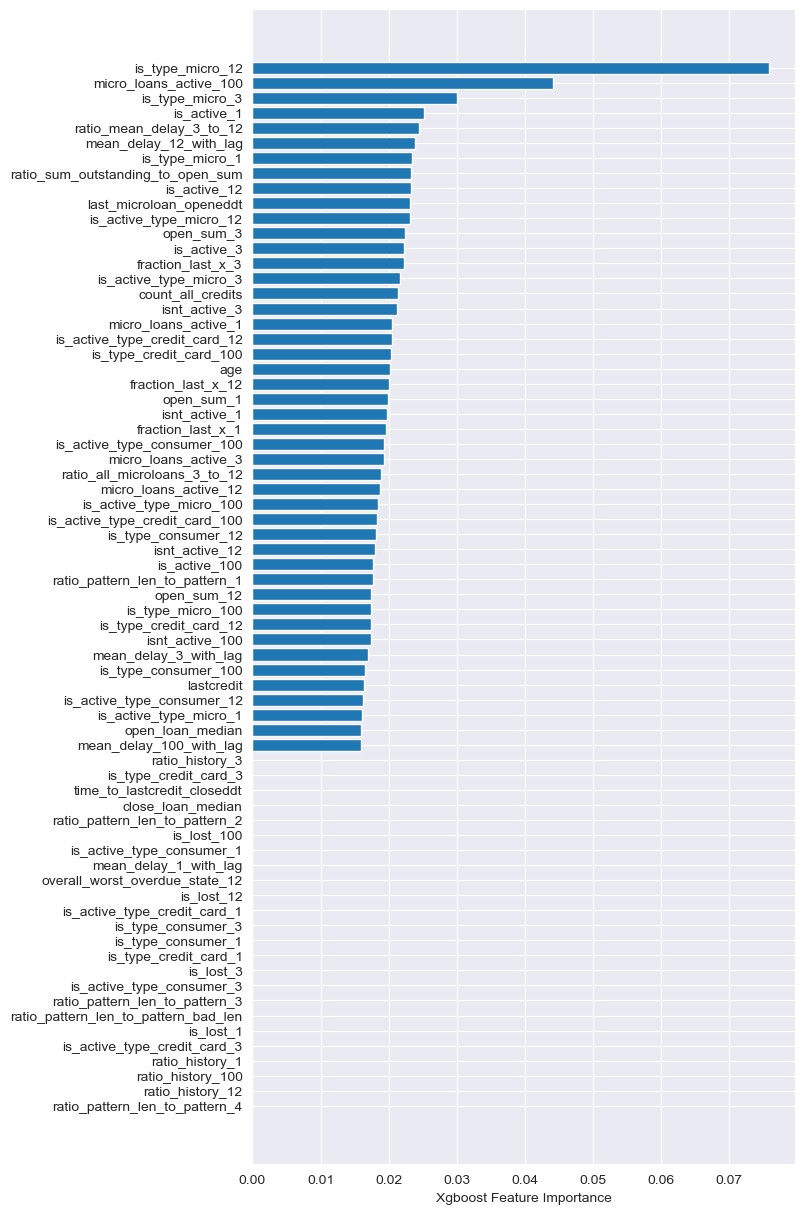

In [121]:
sorted_idx = best_xgb_model.feature_importances_.argsort()
plt.figure(figsize=(7,15))
plt.barh(X_train.columns[sorted_idx], best_xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [122]:
X_train.columns[sorted_idx]

Index(['ratio_pattern_len_to_pattern_4', 'ratio_history_12',
       'ratio_history_100', 'ratio_history_1', 'is_active_type_credit_card_3',
       'is_lost_1', 'ratio_pattern_len_to_pattern_bad_len',
       'ratio_pattern_len_to_pattern_3', 'is_active_type_consumer_3',
       'is_lost_3', 'is_type_credit_card_1', 'is_type_consumer_1',
       'is_type_consumer_3', 'is_active_type_credit_card_1', 'is_lost_12',
       'overall_worst_overdue_state_12', 'mean_delay_1_with_lag',
       'is_active_type_consumer_1', 'is_lost_100',
       'ratio_pattern_len_to_pattern_2', 'close_loan_median',
       'time_to_lastcredit_closeddt', 'is_type_credit_card_3',
       'ratio_history_3', 'mean_delay_100_with_lag', 'open_loan_median',
       'is_active_type_micro_1', 'is_active_type_consumer_12', 'lastcredit',
       'is_type_consumer_100', 'mean_delay_3_with_lag', 'isnt_active_100',
       'is_type_credit_card_12', 'is_type_micro_100', 'open_sum_12',
       'ratio_pattern_len_to_pattern_1', 'is_active_

### Вывод по отбору признаков
45 признаков имеют коэффициент вклада в модель более 0.5. В моем случае модель стермится минимизировать FP, чтобы по возможности наиболее точно определять людей, которым можно дать кредит.
Наибольший вклад внесли признаки is_type_micro_12, micro_loans_active_100, micro_loans_active_100. Далее идут is_active_1, ratio_mean_delay_3_to_12 и другие

## Анлаиз Клиентского портфеля

### Сравнение основных характристик клиентов, влияющих на одобрение кредита у клиентов, получивших кредит и тех, кому его не одобрили (по данным из файла new_training_data_31_08_2022)

In [157]:
impo_features = ['is_type_micro_12', 'micro_loans_active_100', 'micro_loans_active_100', 'is_active_1', 'ratio_mean_delay_3_to_12']

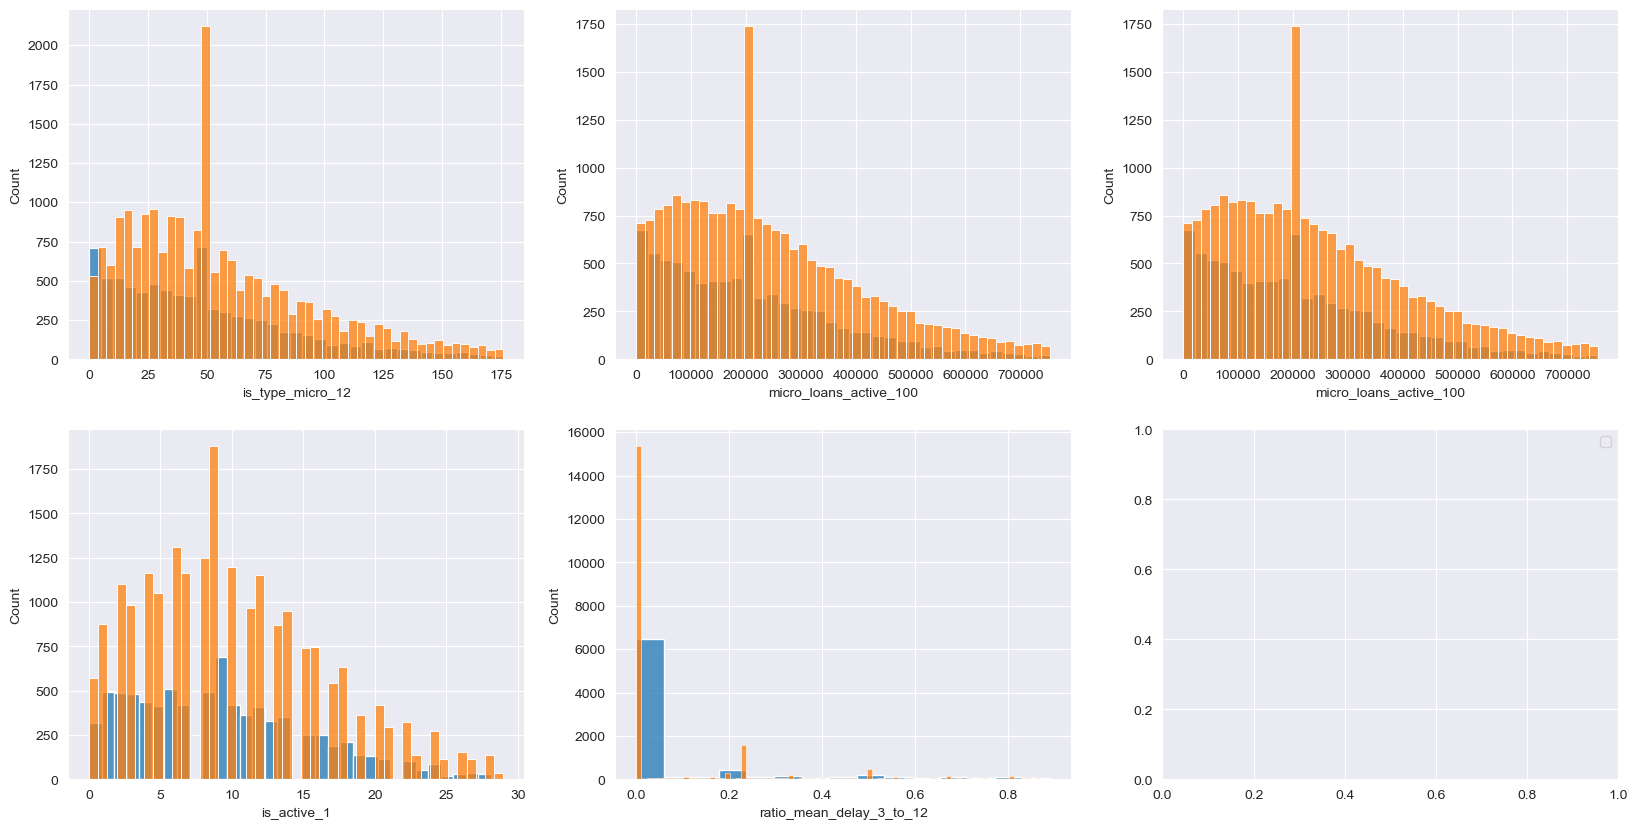

In [174]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
axs = np.array(axs)
for col, ax in zip(impo_features, axs.reshape(-1)):
    plt.legend(labels=["Legend_Day1","Legend_Day2"])
    sns.histplot(train.loc[train['target'] == 1, col],  ax = ax)
    sns.histplot(train.loc[train['target'] == 0, col], ax = ax)


# желтый - 0
# голубой -1
# выбивающиеся по кол-ву значения - заполненные срелним значением пропуски

## Модель


In [55]:
y_train.value_counts()

0.0    21510
1.0     8260
Name: target, dtype: int64

In [56]:
X_train.shape

(29770, 70)

In [57]:
X_test.shape

(6380, 70)

In [56]:
y_test.value_counts()

0.0    4610
1.0    1770
Name: target, dtype: int64

### Random Forest
Для начала попробую обучить практически дефолтный случайный лес как базовую модель

In [57]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
pred = model.predict(X_test)
precision_score(y_test, pred)

0.582010582010582

In [57]:
pd.Series(pred).value_counts()

0.0    6200
1.0     180
dtype: int64

### Обучение с feature importance
логистическая регрессия с параметром balanced
значния -inf и inf мешали обучению, поэтому такие выбросы были удалены

In [65]:
# отбор признаков Логистической регрессией
# не берет больше 18 признаков

def select_features(X_train, y_train, X_test):
     # configure to select a subset of features
     fs = SelectFromModel(LogisticRegression(class_weight='balanced', random_state=1234, solver='lbfgs', max_iter=1000, multi_class = 'ovr'), max_features=70)
     # learn relationship from training data
     fs.fit(X_train, y_train)
     # transform train input data
     X_train_fs = fs.transform(X_train)
     # transform test input data
     X_test_fs = fs.transform(X_test)
     return X_train_fs, X_test_fs, fs

X_train_fs, X_valid_fs, fs = select_features(X_train_scaled, y_train, X_valid_scaled)

from sklearn.ensemble import RandomForestClassifier
logreg_model = LogisticRegression(class_weight='balanced', random_state=1234, solver='lbfgs', max_iter=1000, multi_class = 'ovr')

logreg_model.fit(X_train_fs, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   random_state=1234)

In [66]:
pred = logreg_model.predict(X_valid_fs)

In [67]:
precision_score(y_valid, pred)

0.31730237700386954

Результат так себе

In [979]:
y_valid.shape

(6379,)

### XGBoost + GridSearchCV

In [74]:
import xgboost as xgb

In [75]:
X_train.shape

(29770, 70)

In [76]:
X_test.shape

(6380, 70)

Cначала обучу базовую модель

In [77]:
%%time

#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = xgb.XGBClassifier(
                          objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide')
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='precision', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
valid_predictions = clf0.predict(X_valid)
unseen_predictions = clf0.predict(X_test)

#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_valid = confusion_matrix(y_valid, valid_predictions)
cfm_unseen = confusion_matrix(y_test, unseen_predictions)

#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_valid = accuracy_score(y_valid, valid_predictions)
accs_unseen = accuracy_score(y_test, unseen_predictions)

#F1 scores for each train/valid/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_valid_p1 = f1_score(y_valid, valid_predictions, pos_label=1)
f1s_valid_p0 = f1_score(y_valid, valid_predictions, pos_label=0)
f1s_unseen_p1 = f1_score(y_test, unseen_predictions, pos_label=1)
f1s_unseen_p0 = f1_score(y_test, unseen_predictions, pos_label=0)


precision_train = precision_score(y_train, train_predictions)
precision_valid = precision_score(y_valid, valid_predictions)
precision_unseen = precision_score(y_test, unseen_predictions)

#Area Under the Receiver Operating Characteristic Curve
valid_ras = roc_auc_score(y_valid, clf0.predict_proba(X_valid)[:,1])
unseen_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])

#best parameters
bp = clf0.best_params_

#storing computed values in results dictionary
results_dict['xgbc0'] = {'iterable_parameter': np.nan,
                         'classifier': deepcopy(clf0),
                         'cv_results': df.copy(),
                         'cfm_train': cfm_train,
                         'cfm_valid': cfm_valid,
                         'cfm_unseen': cfm_unseen,
                         'train_accuracy': accs_train,
                         'valid_accuracy': accs_valid,
                         'unseen_accuracy': accs_unseen,
                         'train F1-score label 1': f1s_train_p1,
                         'train F1-score label 0': f1s_train_p0,
                         'valid F1-score label 1': f1s_valid_p1,
                         'valid F1-score label 0': f1s_valid_p0,
                         'unseen F1-score label 1': f1s_unseen_p1,
                         'unseen F1-score label 0': f1s_unseen_p0,
                         'precision_train' : precision_train,
                         'precision_valid' : precision_valid,
                         'precision_unseen' : precision_unseen,
                         'valid roc auc score': valid_ras,
                         'unseen roc auc score': unseen_ras,
                         'best_params': bp}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: total: 35.3 s
Wall time: 2.47 s


In [78]:
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.423667      0.020155         0.013666        0.001248   

  param_base_score param_booster param_callbacks param_colsample_bylevel  \
0             None        gbtree            None                    None   

  param_colsample_bynode param_colsample_bytree  ... split1_test_score  \
0                   None                   None  ...          0.402214   

  split2_test_score mean_test_score std_test_score rank_test_score  \
0          0.448799        0.416928       0.022558               1   

  split0_train_score split1_train_score split2_train_score mean_train_score  \
0           0.964191           0.972195           0.970688         0.969024   

  std_train_score  
0        0.003473  

[1 rows x 56 columns]

In [79]:
results_dict

{'xgbc0': {'iterable_parameter': nan,
  'classifier': GridSearchCV(cv=3,
               estimator=XGBClassifier(base_score=None, booster='gbtree',
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric='auc', feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy='lossguide',
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learnin...
                           'max_cat_threshold': [None],
                           'max_cat_to_onehot': [None], 'max_delta_step': [N

In [81]:
basic_xgb_model = xgb.XGBClassifier(params=results_dict['xgbc0']['best_params'])
basic_xgb_model.fit(X_train, y_train)
pred = basic_xgb_model.predict(X_test)
precision_score(y_test, pred)

[15:55:54] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "params" } are not used.



0.4528301886792453

Базовая модель при обработке выбросов во всех столбацах дает precision 0.45

In [82]:
pd.Series(pred).value_counts()

0    5956
1     424
dtype: int64

Теперь попробую выбрать параметры. Все 13*12*10*7*13*13 комбинаций перебирать не стал, т.к. есть ограничение по ресурсам

In [ ]:
#creating deepcopy of default parameters before manipulations
default_params.pop('use_label_encoder')
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [92]:
param_grid.keys()

dict_keys(['gamma', 'learning_rate', 'max_depth', 'n_estimators', 'reg_alpha', 'reg_lambda'])

In [93]:
#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):

    #variable for measuring iteration time
    loop_start = time.time()

    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value

    #classifier instance of current iteration
    xgbc = xgb.XGBClassifier(**default_params)

    #GridSearch instance of current iteration
    #заменил scoring на precision_score
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring='precision', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train.values.ravel())

    #results dataframe
    df = pd.DataFrame(clf.cv_results_)

    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(X_train)
    valid_predictions = clf.predict(X_valid)
    unseen_predictions = clf.predict(X_test)

    #confusion matrices
    cfm_train = confusion_matrix(y_train, train_predictions)
    cfm_valid = confusion_matrix(y_valid, valid_predictions)
    cfm_unseen = confusion_matrix(y_test, unseen_predictions)

    #accuracy scores
    accs_train = accuracy_score(y_train, train_predictions)
    accs_valid = accuracy_score(y_valid, valid_predictions)
    accs_unseen = accuracy_score(y_test, unseen_predictions)

    #F1 scores for each train/valid/test label
    f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
    f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
    f1s_valid_p1 = f1_score(y_valid, valid_predictions, pos_label=1)
    f1s_valid_p0 = f1_score(y_valid, valid_predictions, pos_label=0)
    f1s_unseen_p1 = f1_score(y_test, unseen_predictions, pos_label=1)
    f1s_unseen_p0 = f1_score(y_test, unseen_predictions, pos_label=0)

    precision_train = precision_score(y_train, train_predictions)
    precision_valid = precision_score(y_valid, valid_predictions)
    precision_unseen = precision_score(y_test, unseen_predictions)

    #Area Under the Receiver Operating Characteristic Curve
    valid_ras = roc_auc_score(y_valid, clf0.predict_proba(X_valid)[:,1])
    unseen_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])

    #best parameters
    bp = clf.best_params_

    #storing computed values in results dictionary
    results_dict[f'xgbc{i+1}'] = {'iterable_parameter': grid_key,
                                  'classifier': deepcopy(clf),
                                  'cv_results': df.copy(),
                                  'cfm_train': cfm_train,
                                  'cfm_valid': cfm_valid,
                                  'cfm_unseen': cfm_unseen,
                                  'train_accuracy': accs_train,
                                  'valid_accuracy': accs_valid,
                                  'unseen_accuracy': accs_unseen,
                                  'train F1-score label 1': f1s_train_p1,
                                  'train F1-score label 0': f1s_train_p0,
                                  'valid F1-score label 1': f1s_valid_p1,
                                  'valid F1-score label 0': f1s_valid_p0,
                                  'unseen F1-score label 1': f1s_unseen_p1,
                                  'unseen F1-score label 0': f1s_unseen_p0,
                                  'precision_train' : precision_train,
                                  'precision_valid' : precision_valid,
                                  'precision_unseen' : precision_unseen,
                                  'valid roc auc score': valid_ras,
                                  'unseen roc auc score': unseen_ras,
                                  'best_params': bp}


    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

Fitting 3 folds for each of 13 candidates, totalling 39 fits


E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classifica

iteration #1 finished in: 11.628504753112793 seconds
Fitting 3 folds for each of 12 candidates, totalling 36 fits
iteration #2 finished in: 8.636000394821167 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
iteration #3 finished in: 8.049999475479126 seconds
Fitting 3 folds for each of 7 candidates, totalling 21 fits
iteration #4 finished in: 4.976000547409058 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits


E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classifica

iteration #5 finished in: 7.0809996128082275 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits


E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\programming\anaconda\envs\xgb_gpu\lib\site-packages\sklearn\metrics\_classifica

iteration #6 finished in: 7.1940016746521 seconds


Третья модель показала Precision на тестовой выборке в 67 процентов

In [178]:
# best, упор на precision, выбросы во всех столбцах заменены на медианы 67 % 6292\88
# попробую воспроизвести результат третей итерации. Почему-то аналогичный вызов параметров через 'params = results_dict['xgbc3']['best_params']' дал другой результат (0.47)
# пришлось скопировать параметры в ручную из results_dict руками с помощью ctrlC ctrlV o_0
best_xgb_model = xgb.XGBClassifier(base_score = None,
 booster ='gbtree',
 callbacks = None,
 colsample_bylevel = None,
 colsample_bynode= None,
 colsample_bytree= None,
 early_stopping_rounds= None,
 enable_categorical= False,
 eval_metric= 'auc',
 feature_types= None,
 gamma= 6.4,
 gpu_i= None,
 grow_policy= 'lossguide',
 importance_type= None,
 interaction_constraints= None,
 learning_rate= 0.1,
 max_bin= None,
 max_cat_threshold= None,
 max_cat_to_onehot= None,
 max_delta_step= None,
 max_depth= 6,
 max_leaves=None,
 min_child_weight=None,
 monotone_constraints=None,
 n_estimators=100,   # было 100
 n_jobs=None,
 num_parallel_tree=None,
 objective='binary:logistic',
 predictor=None,
 random_state=None,
 reg_alpha=None,
 reg_lambda=None,
 sampling_method=None,
 scale_pos_weight=None,
 subsample=None,
 tree_method='hist',
 validate_parameters=None,
 verbosity=None)
best_xgb_model.fit(X_train, y_train)
pred = best_xgb_model.predict(X_test)
precision_score(y_test, pred)

0.6704545454545454

In [180]:
pd.Series(pred).value_counts()

0    6292
1      88
dtype: int64

In [185]:
recall_score(y_test, pred)

0.03333333333333333

Recall показывает долю найденных классификатором объектов, истинная метка которых - 1. В данном случае он получился очень маленький


In [186]:
pred_proba = best_xgb_model.predict_proba(X_test)
df_proba = pd.DataFrame(pred_proba)
pred_series = pd.DataFrame(pred)
df_proba['labels'] =pred_series

Text(0.5, 0, 'Xgboost Feature Importance')

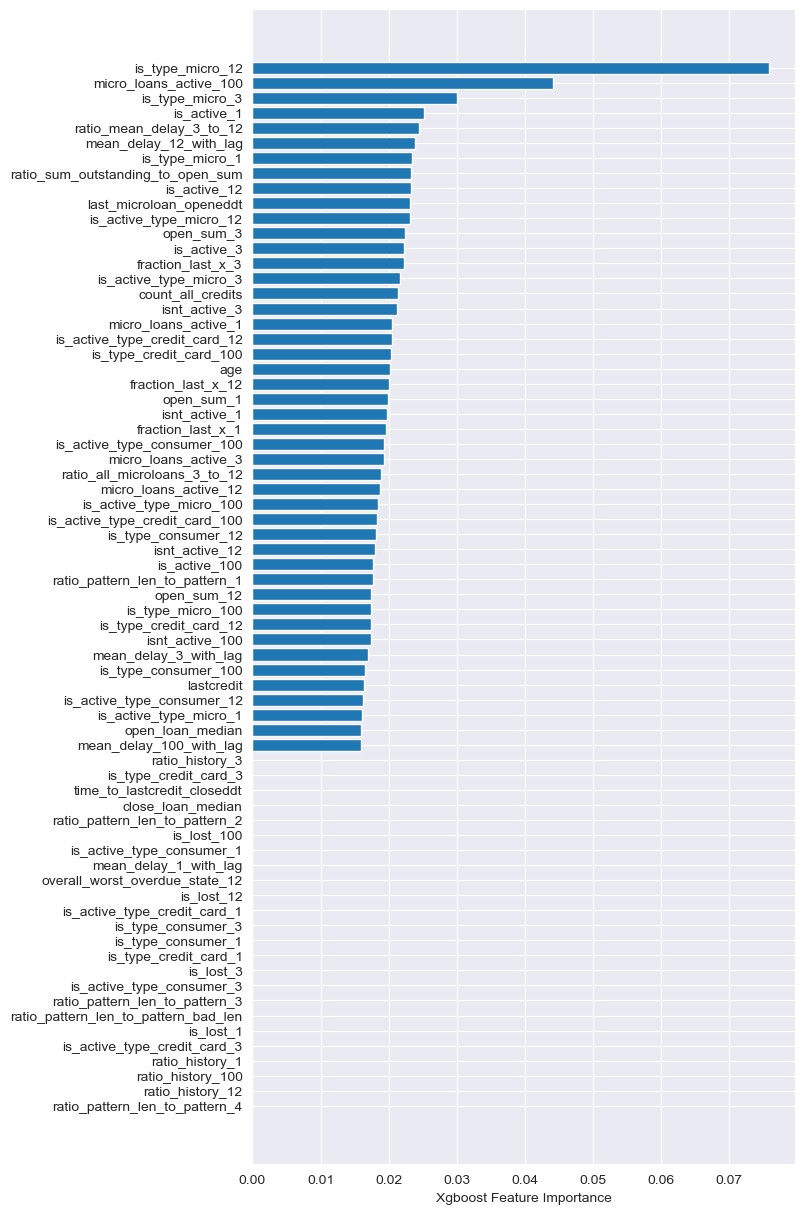

In [115]:
sorted_idx = best_xgb_model.feature_importances_.argsort()
plt.figure(figsize=(7,15))
plt.barh(X_train.columns[sorted_idx], best_xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


попробую сделать порог для класса 1 не в 50, а в 30 и посмотреть метрику

In [78]:
df_proba['30_threshold'] = 0
df_proba.loc[df_proba[1] > 0.40, '30_threshold'] = 1

In [80]:
df_proba

0         1  labels  30_threshold
0     0.735300  0.264700       0             0
1     0.679608  0.320392       0             0
2     0.695446  0.304554       0             0
3     0.719624  0.280376       0             0
4     0.743606  0.256394       0             0
...        ...       ...     ...           ...
6375  0.714115  0.285885       0             0
6376  0.762293  0.237707       0             0
6377  0.656496  0.343504       0             0
6378  0.717608  0.282392       0             0
6379  0.752002  0.247998       0             0

[6380 rows x 4 columns]

In [81]:
y_test.value_counts()

0.0    4610
1.0    1770
Name: target, dtype: int64

In [82]:
df_proba['30_threshold'].value_counts()

0    6054
1     326
Name: 30_threshold, dtype: int64

In [83]:
thres_pred = df_proba['30_threshold'].values

In [84]:
precision_score(y_test, thres_pred)

0.5214723926380368

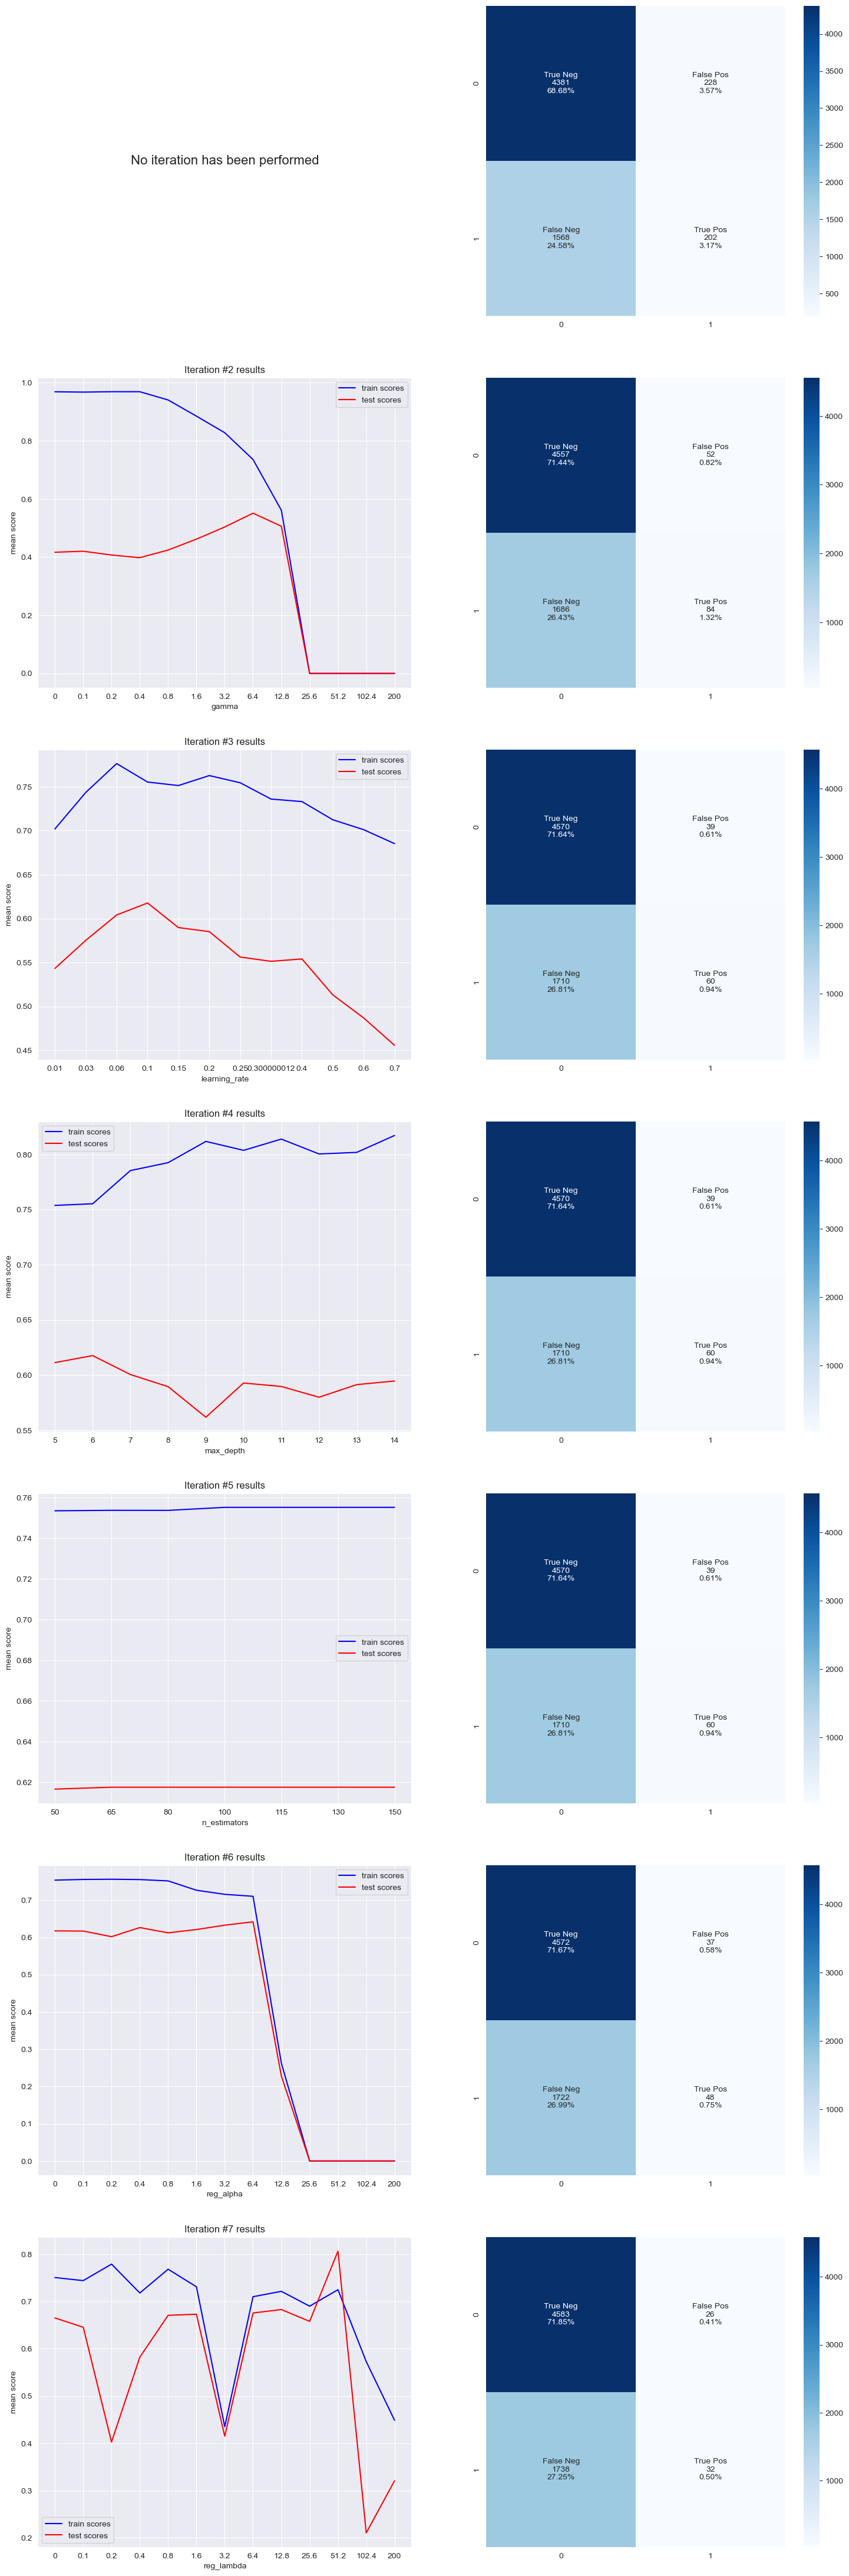

In [177]:

#number of rows depend on number of iterations
nrows = len(results_dict.keys())

#standard group names for confusion matrices
group_names = ['True Neg','False Pos','False Neg','True Pos']

#creating figure
f, axes = plt.subplots(nrows,2,figsize=(18,8*nrows));

#iteratively plotting train/test accuracy scores and test confusion matrix
for i,ax in enumerate(axes):

    #current key of results dictionary
    ckey = list(results_dict.keys())[i]

    #plotting scores for models other than the benchark model
    if ckey != 'xgbc0':
        x1 = results_dict[ckey]['cv_results'].loc[:,'mean_train_score']
        x2 = results_dict[ckey]['cv_results'].loc[:,'mean_test_score']

        ax[0].plot(x1, label='train scores', color='blue');
        ax[0].plot(x2, label='test scores', color='red');
        ax[0].set_title(f'Iteration #{i+1} results');

        ax[0].set_xticks(list(range(0,len([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]))));
        ax[0].set_xticklabels(sorted([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]));

        ax[0].grid('major');
        ax[0].legend();
        ax[0].set_xlabel(results_dict[ckey]['iterable_parameter'])
        ax[0].set_ylabel('mean score');

    #leaving scores plot blank for benchmark model
    else:
        ax[0].axis('off')
        ax[0].text(x=0.5, y=0.5, s='No iteration has been performed', fontsize=16, va='center', ha='center')

    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[ckey]['cfm_valid'].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[ckey]['cfm_valid'].flatten()/np.sum(results_dict[ckey]['cfm_valid'])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    #plotting confusion matrix
    sns.heatmap(results_dict[ckey]['cfm_valid'], annot=labels, fmt='', cmap='Blues', ax=ax[1])

plt.show();


In [188]:
#printing benchmark, iterative grid search and randomized search ROC AUC / accuracy scores (unseen data set)
print(f"Benchmark AUC/accuracy score: {np.round(results_dict['xgbc0']['unseen roc auc score'],4)} / {np.round(results_dict['xgbc0']['unseen_accuracy'],4)}")
print(f"Coordinate descent AUC/accuracy score: {np.round(results_dict['xgbc3']['unseen roc auc score'],4)} / {np.round(results_dict['xgbc3']['unseen_accuracy'],4)}")



Benchmark AUC/accuracy score: 0.6018 / 0.7177
Coordinate descent AUC/accuracy score: 0.6018 / 0.7273


In [190]:
"""
#set keys for extracting confusion matrices (unseen data set)
keys = ['xgbc0', 'xgbc3']
titles = ['Benchmark model', 'Coordinate Descent', 'Randomized Search', 'Bayesian Search']

f, axes = plt.subplots(2,2,figsize=(18,14));

for i,ax in enumerate(axes.flatten()):

    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[keys[i]]['cfm_unseen'].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[keys[i]]['cfm_unseen'].flatten()/np.sum(results_dict[keys[i]]['cfm_unseen'])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    #plotting confusion matrix
    sns.heatmap(results_dict[keys[i]]['cfm_unseen'], annot=labels, fmt='', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion matrix for {titles[i]}")
"""

SyntaxError: EOF while scanning triple-quoted string literal (2349400712.py, line 18)

In [82]:
X_test.shape

(6380, 71)

In [122]:
y_test.shape

(6380,)

In [83]:
y_test.value_counts()

0.0    4610
1.0    1770
Name: target, dtype: int64

In [84]:
pd.Series(pred).value_counts()

0    5464
1     916
dtype: int64

In [127]:
6380 * 0.35

2233.0

In [1069]:
7824 * 0.85

6650.4

In [126]:
pd.Series(pred).value_counts()

0    5496
1     884
dtype: int64

### Результаты обучения
1.RandomForest - n_estimators = 1000,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features ='auto',
 max_depth =50,
 bootstrap=False)
precision - 0.52. Из 6380 дает кредиты только 240 (из 1770 истинных меток 1)

---------------------------
2.RandomForest - n_estimators = 500
precision - 0.58. Из 6380 дает кредиты только 180 (из 1770 истинных меток 1)

----------------------------
3.RandomForest - n_estimators = 500 (не заменял выбросы в аномальных признаках на медианы, в остальных признаках заменял)
precision - 0.52. ИЗ 6380 дает кредиты только 252 (из 1770 истинных меток 1)

----------------------------
Смог добиться precision в 0.55 с помощью GridSearchCV и XGBoost, максимизируя precision и не трогая выбросы в признаках с аномальным распределением. Однако, такая точность была получена только за счет снижения колчичества предсказанных единиц (51 клиент)
Смог добиться precision в 0.41  с помощью GridSearchCV и XGBoost, максимизируя balanced_accuracy и не трогая выбросы в признаках с аномальным распределением. Однако, получил 885 предсказанных единиц

4.(Лучший результат)

XGBoost (лучшие параметры отображены в коде). максимизировал Precision
precision - 0.76 (88 истинных меток 1)

----------------------------


Чтобы получить количество банкротов не более 15 % из общего числа людей, которым нужно дать кредит, я максимизировал Precision. Лучший результат показал Precision = 67%. Т.е. в моем случае 33% будут являться банкротами из всех, кому дали кредит. Т.к. я максимизировал Preciscion и моей задумкой было сначала точно определить клиентов, которым кредит одобрят, а затем добрать потенциальных банкротов по вероятностям принадлежности к классу 1, которые чуть менее порога классификации.
    К сожалению, при изменении порога Precision начала уменьшаться до 50% и ниже, что эквивалентно константной модели. Поэтому порог я решил оставить как есть - 50%. Однако при
        текущем соотношении кол-ва 1 и 0 в данных НЕЛЬЗЯ получть требуемый в задании результат при разделении данных на train valid и test.
Доказательстово: в тестовой выборке 6380 наблюдений, их них 1770 имеют метку 1. По заданию нужно 'построить базовую модель прогнозирования банкротства, одобряющую не менее 35% клиентов при банкротстве среди одобренных не выше 15%.'. 35% от тестовой выборки это 2233.0 наблюдений, из которых минимум 1980 (минимум 85% по заданию должны иметь истинную метку 1) должны иметь истинную метку 1. Однако в тестовой выборке у нас всего 1770 наблюдений с 1.
    Таким образом, для построения качественных резултатов прогноза необходимо получить больше данных о клиентах, кому кредит был одобрен. Можно попытаться сделать upsampling тестовой выборки, чтобы получить требуемый результат, но это уже подгон под ответ

## Рекомендации
1. Нужно больше данных о выданных кредитах
2. Часть признаков практически не влияет на прогнозирование целевой переменной (смотреть выводы предобработки данных), данные о них можно не собирать
3. В данных много пропущенных значений и выбросов, которые можно обрабатывать сразу на этапе сбора данных